# EDA- Descriptive Analysis

In [11]:
# Import the required libraries: Pandas, Numpy, Matplotlib and   Seaborn

import pandas as pd          
import numpy as np 
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [14]:
# Let usload and read the data from the csv file 
df = pd.read_csv('france.csv')
df.columns

Index(['LOCATION', 'Country', 'MEASURE', 'Measure', 'AGE', 'Age group',
       'DEFINITION', 'Definition', 'METHODO', 'Methodology', 'TIME', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [15]:
df.sample(4)

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
19190,ESP,Spain,PVTAA5,Age group 51-65: Poverty rate after taxes and ...,TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2011,RATIO,Ratio,0,Units,NaN,NaN,0.113,NaN,NaN
48845,NOR,Norway,GINIG,"Gini (gross income, before taxes)",OLD,Retirement age population: above 65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2020,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.275,NaN,NaN
35389,POL,Poland,TRROTCTOTAL,Current transfers received from non-profit ins...,WA,Working age population: 18-65,CURRENT,Current definition,METH2012,New income definition since 2012,...,2017,PLN,Zloty,0,Units,NaN,NaN,184.000,NaN,NaN
70025,KOR,Korea,STDG,Standard error Gini (post taxes and transfers),WA,Working age population: 18-65,PREVIOUS,Previous definition - with overlap year,METH2012,New income definition since 2012,...,2012,SE,Standard-error,0,Units,NaN,NaN,0.005,NaN,NaN


In [16]:
# Check several rows from the beginning
df.head()

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.326,NaN,NaN
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.337,NaN,NaN
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2016,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.330,NaN,NaN
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2018,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.325,NaN,NaN
4,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2020,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.318,NaN,NaN


In [17]:
# Check the instances(rows) and attributes(columns) in the dataset
df.shape

(77182, 21)

In [18]:
# Checking the Column types

ctype = df.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate('count').reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77182 entries, 0 to 77181
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               77182 non-null  object 
 1   Country                77182 non-null  object 
 2   MEASURE                77182 non-null  object 
 3   Measure                77182 non-null  object 
 4   AGE                    77182 non-null  object 
 5   Age group              77182 non-null  object 
 6   DEFINITION             77182 non-null  object 
 7   Definition             77182 non-null  object 
 8   METHODO                77182 non-null  object 
 9   Methodology            77182 non-null  object 
 10  TIME                   77182 non-null  int64  
 11  Year                   77182 non-null  int64  
 12  Unit Code              77102 non-null  object 
 13  Unit                   77102 non-null  object 
 14  PowerCode Code         77182 non-null  int64  
 15  Po

In [19]:
# Check the  Statistical Numerical Data Distribution Summary

df.describe()

,TIME,Year,PowerCode Code,Reference Period Code,Reference Period,Value
count,77182.000000,77182.000000,77182.0,0.0,0.0,7.718200e+04
mean,2012.224586,2012.224586,0.0,NaN,NaN,8.152814e+05
std,3.923279,3.923279,0.0,NaN,NaN,1.042134e+07
min,2006.000000,2006.000000,0.0,NaN,NaN,-6.850000e+06
25%,2009.000000,2009.000000,0.0,NaN,NaN,1.950000e-01
50%,2012.000000,2012.000000,0.0,NaN,NaN,1.400000e+00
75%,2015.000000,2015.000000,0.0,NaN,NaN,3.225000e+03
max,2021.000000,2021.000000,0.0,NaN,NaN,1.207000e+09


In [20]:
# Check the Categorical Data Distribution

df.describe(include=['O'])

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,Unit Code,Unit,PowerCode,Flag Codes,Flags
count,77182,77182,77182,77182,77182,77182,77182,77182,77182,77182,77102,77102,77182,878,878
unique,44,44,64,64,3,3,3,3,2,2,38,38,1,2,2
top,LVA,Latvia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,RATIO,Ratio,Units,P,Provisional value
freq,2557,2557,2104,2104,36108,36108,70700,70700,56914,56914,28413,28413,77182,701,701


# Data Cleaning

In [21]:
# Checking the Missing Values in the dataset

missing_df =df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(df.shape[0]-missing_df['Missing Values Count'])/df.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,Reference Period,77182,0.000000
1,Reference Period Code,77182,0.000000
2,Flags,76304,1.137571
3,Flag Codes,76304,1.137571
4,Unit,80,99.896349
5,Unit Code,80,99.896349
6,Value,0,100.000000
7,PowerCode,0,100.000000
8,PowerCode Code,0,100.000000
9,Year,0,100.000000


In [22]:
# Remove All the rows that contain a Missing Value

a=df.dropna()
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               0 non-null      object 
 1   Country                0 non-null      object 
 2   MEASURE                0 non-null      object 
 3   Measure                0 non-null      object 
 4   AGE                    0 non-null      object 
 5   Age group              0 non-null      object 
 6   DEFINITION             0 non-null      object 
 7   Definition             0 non-null      object 
 8   METHODO                0 non-null      object 
 9   Methodology            0 non-null      object 
 10  TIME                   0 non-null      int64  
 11  Year                   0 non-null      int64  
 12  Unit Code              0 non-null      object 
 13  Unit                   0 non-null      object 
 14  PowerCode Code         0 non-null      int64  
 15  PowerCode         

In [23]:
# Pick Subset of the first 10  rows in the data set


subset_a=df.iloc[:10:]
subset_a

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.3260,NaN,NaN
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.3370,NaN,NaN
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2016,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.3300,NaN,NaN
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2018,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.3250,NaN,NaN
4,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2020,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.3180,NaN,NaN
5,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,...,2008,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.3360,NaN,NaN
6,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,...,2010,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.3340,NaN,NaN
7,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.3240,NaN,NaN
8,AUS,Australia,CPI2010,Consumer Price Index (base 2010=100),TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,IDX,Index,0,Units,NaN,NaN,105.1249,NaN,NaN
9,AUS,Australia,CPI2010,Consumer Price Index (base 2010=100),TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,IDX,Index,0,Units,NaN,NaN,110.3798,NaN,NaN


In [24]:
# Check any missing value after removing the missing values

missing_a =a.isnull().sum(axis=0).reset_index()
missing_a.columns = ['Column Name', 'Missing Values Count']
missing_a['Filling Factor (%)']=(a.shape[0]-missing_a['Missing Values Count'])/a.shape[0]*100
missing_a.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,LOCATION,0.0,NaN
1,Country,0.0,NaN
2,MEASURE,0.0,NaN
3,Measure,0.0,NaN
4,AGE,0.0,NaN
5,Age group,0.0,NaN
6,DEFINITION,0.0,NaN
7,Definition,0.0,NaN
8,METHODO,0.0,NaN
9,Methodology,0.0,NaN


In [25]:
# Remove All Columns with at least one missing value

columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

# Remove date_first_booking column
# df_all.drop('date_first_booking', axis=1, inplace=True)

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,TIME,Year,PowerCode Code,PowerCode,Value
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2012,2012,0,Units,0.326
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2014,2014,0,Units,0.337
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2016,2016,0,Units,0.330
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2018,2018,0,Units,0.325
4,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,2020,2020,0,Units,0.318


In [26]:
# just how much data did we lose?

print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 21 

Columns with na's dropped: 15


In [27]:
#We've lost 6 (21-15) columns of data, but at this point we have successfully removed all the NaN's from our data.

In [29]:
a.head()

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags


In [7]:
data['Measure'].unique()

array(['Gini (disposable income, post taxes and transfers)',
       'Consumer Price Index (base 2010=100)',
       'Age group 0-17: Poverty rate after taxes and transfers',
       'Total earnings (current prices)',
       'Current transfers received from public social security (Current prices)',
       'Income from self-employment (current prices)',
       'Taxes and social security contributions paid directly by households (Current prices)',
       'Age group 0-17: mean disposable income (current prices)',
       'Age group 18-25: mean disposable income (current prices)',
       'Current transfers received from employment-related social insurance schemes (Current prices)',
       'Capital income (current prices)',
       'Age group 18-25: Poverty rate after taxes and transfers',
       'Purchasing Power Parities for private consumption',
       'Standard error Gini (post taxes and transfers)',
       'Mean disposable income (current prices)',
       'Gini (market income, before taxes 

In [ ]:
# All rows are eliminated. Required for another method.

# Exporting by Country, Pivoting

In [6]:
#EURO_COUNTRIES = ['Austria', 'Estonia', 'Finland', 'France', 'Germany', 'Ireland','Italy', 'Latvia','Lithuania','Luxembourg', 'Netherlands', 'Portugal','Slovenia','Spain']

In [36]:
#data_pivoted

In [26]:
#data_pivoted.to_csv('data_pivoted.csv')

In [37]:
data_filtered= data[(data['MEASURE']=='GINI') & (data['Country'].isin(EURO_COUNTRIES))]
data_pivoted = pd.pivot_table(data_filtered, values='Value', index='Year', columns='Country', aggfunc='mean')

In [52]:
data_pivoted.mean()

Country
Austria        0.276524
Estonia        0.300952
Finland        0.258200
France         0.293345
Germany        0.285964
Ireland        0.296654
Italy          0.318628
Latvia         0.345244
Lithuania      0.337643
Luxembourg     0.280690
Netherlands    0.278248
Portugal       0.338143
Slovenia       0.248571
Spain          0.321262
dtype: float64

In [38]:
data_transfer= data[(data['Measure']=='Current transfers received from public social security (Current prices)') & (data['Country'].isin(EURO_COUNTRIES))]
data_pivotedtransfer = pd.pivot_table(data_transfer, values='Value', index='Year', columns='Country', aggfunc='mean')
data_pivotedtransfer.to_csv('data_pivotedtransfer.csv')

In [45]:
data_pivotedtransfer.head()

Country,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
Year,,,,,,,,,,,,,,
2006,11820.333333,1548.000000,2638.666667,NaN,NaN,9851.333333,8538.000000,1119.000000,1205.333333,17306.666667,NaN,4342.333333,4762.000000,4896.000000
2007,11240.333333,1828.000000,2603.000000,NaN,NaN,10867.333333,9060.000000,1301.000000,1562.666667,17707.666667,NaN,4417.666667,5028.333333,5196.666667
2008,12050.000000,2254.000000,2653.333333,NaN,8163.0,11977.000000,9304.333333,1686.333333,2055.666667,19664.666667,NaN,4460.000000,5372.666667,6188.666667
2009,12730.666667,2516.666667,2736.666667,NaN,NaN,12564.666667,9681.666667,2119.333333,2100.000000,20379.666667,NaN,4735.666667,5719.000000,6683.000000
2010,13253.333333,2478.333333,2794.666667,NaN,NaN,12053.000000,9834.333333,2218.333333,2017.666667,20947.000000,7200.0,4850.333333,5934.666667,6830.000000


In [53]:
data_pivotedtransfer.mean()

Country
Austria        13951.642857
Estonia         2854.333333
Finland         2805.111111
France         12606.851852
Germany         9426.433333
Ireland        11866.358974
Italy          10107.435897
Latvia          2276.911111
Lithuania       2186.000000
Luxembourg     22788.928571
Netherlands     7819.696970
Portugal        5363.714286
Slovenia        5916.928571
Spain           7073.547619
dtype: float64

In [39]:
data_MDI= data[(data['Measure']=='Mean disposable income (current prices)') & (data['Country'].isin(EURO_COUNTRIES))]
data_pivotedMDI = pd.pivot_table(data_MDI, values='Value', index='Year', columns='Country', aggfunc='mean')
data_pivotedMDI.to_csv('data_pivotedMDI.csv')

In [46]:
data_pivotedMDI.head()

Country,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
Year,,,,,,,,,,,,,,
2006,22550.000000,5440.333333,21340.333333,NaN,NaN,27500.833333,19037.000000,4288.500000,4168.500000,37256.333333,23331.0,10812.333333,12011.166667,14769.333333
2007,23782.666667,6430.666667,22741.333333,NaN,NaN,28582.333333,19623.000000,6027.333333,5319.833333,38430.166667,25040.5,11263.500000,13023.166667,15668.000000
2008,24774.333333,7345.166667,23952.666667,24228.0,22098.8,27545.166667,19285.444444,6894.500000,6231.333333,40022.000000,25419.5,11427.333333,14266.500000,18899.666667
2009,25957.000000,6982.500000,24445.666667,24650.5,23516.5,26054.333333,20167.833333,5956.833333,5430.500000,40797.833333,25672.5,11586.333333,13940.500000,18857.333333
2010,26321.333333,6743.333333,25053.166667,25187.0,24031.5,24936.500000,20172.500000,5654.166667,4938.500000,41105.333333,24960.0,11572.833333,14176.500000,18085.000000


In [54]:
data_pivotedMDI.mean()

Country
Austria        27697.642857
Estonia         9106.130952
Finland        26550.277778
France         25867.097222
Germany        24673.900000
Ireland        27432.474359
Italy          20371.675214
Latvia          7557.311111
Lithuania       6808.440476
Luxembourg     44448.583333
Netherlands    27001.011111
Portugal       11847.000000
Slovenia       14532.035714
Spain          17942.000000
dtype: float64

In [40]:
data_TE= data[(data['Measure']=='Total earnings (current prices)') & (data['Country'].isin(EURO_COUNTRIES))]
data_pivotedTE = pd.pivot_table(data_TE, values='Value', index='Year', columns='Country', aggfunc='mean')
data_pivotedTE.to_csv('data_pivotedTE.csv')

In [47]:
data_pivotedTE.head()

Country,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
Year,,,,,,,,,,,,,,
2006,14605.333333,4571.000000,14938.000000,NaN,NaN,16534.833333,10414.666667,3720.500000,3387.666667,24891.666667,24502.5,7291.000000,9236.833333,10376.333333
2007,16533.666667,5513.666667,15759.333333,NaN,NaN,17085.833333,10612.666667,5527.666667,4032.000000,25715.333333,25422.0,7619.000000,10068.666667,10969.000000
2008,17155.000000,6056.000000,16646.666667,12163.0,18538.2,15732.166667,10258.333333,6257.666667,4461.666667,26599.166667,26395.0,7556.833333,10923.000000,12531.333333
2009,17410.666667,5320.166667,16320.000000,17612.0,23039.0,14719.833333,10631.833333,4726.333333,3640.500000,26398.333333,26759.0,7651.000000,10345.000000,12149.666667
2010,17003.000000,5173.333333,16738.666667,18015.0,23672.5,14852.833333,10663.666667,4232.666667,3109.000000,26375.333333,21860.0,7775.166667,10398.000000,11533.666667


In [55]:
data_pivotedTE.mean()

Country
Austria        18467.357143
Estonia         7277.297619
Finland        18075.488889
France         14291.461111
Germany        20009.030556
Ireland        16945.846154
Italy          10839.628205
Latvia          6305.788889
Lithuania       4830.857143
Luxembourg     27817.226190
Netherlands    22142.844444
Portugal        7874.435897
Slovenia       10763.238095
Spain          11315.142857
dtype: float64

In [41]:
data_CI= data[(data['Measure']=='Capital income (current prices)') & (data['Country'].isin(EURO_COUNTRIES))]
data_pivotedCI = pd.pivot_table(data_CI, values='Value', index='Year', columns='Country', aggfunc='mean')
data_pivotedCI.to_csv('data_pivotedCI.csv')

In [48]:
data_pivotedCI.head()

Country,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
Year,,,,,,,,,,,,,,
2006,665.333333,38.333333,1566.000000,NaN,NaN,1894.333333,841.333333,22.000000,42.666667,2358.666667,NaN,249.666667,164.666667,560.333333
2007,1075.333333,59.666667,1934.000000,NaN,NaN,1624.666667,1044.333333,52.000000,116.666667,2515.666667,NaN,338.333333,235.333333,585.000000
2008,915.333333,90.333333,1999.666667,NaN,1765.666667,1005.666667,1017.333333,74.333333,224.000000,1696.666667,NaN,355.333333,340.666667,1699.333333
2009,1016.333333,73.666667,1881.000000,NaN,NaN,907.666667,981.666667,39.666667,104.333333,2112.666667,NaN,402.000000,289.000000,1705.333333
2010,1114.666667,50.333333,1920.000000,NaN,NaN,752.333333,1099.333333,16.666667,98.333333,2101.333333,1500.0,381.000000,297.333333,1498.666667


In [56]:
data_pivotedCI.mean()

Country
Austria        1231.523810
Estonia         176.238095
Finland        2249.444444
France         3416.111111
Germany        1849.633333
Ireland        1082.358974
Italy          1102.410256
Latvia           96.266667
Lithuania       160.285714
Luxembourg     2567.523810
Netherlands    1909.090909
Portugal        461.880952
Slovenia        399.904762
Spain          1241.690476
dtype: float64

In [42]:
data_CPI= data[(data['Measure']=='Consumer Price Index (base 2015=100)') & (data['Country'].isin(EURO_COUNTRIES))]
data_pivotedCPI = pd.pivot_table(data_CPI, values='Value', index='Year', columns='Country', aggfunc='mean')
data_pivotedCPI.to_csv('data_pivotedCPI.csv')

In [49]:
data_pivotedCPI.head()

Country,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
Year,,,,,,,,,,,,,,
2006,83.72098,74.10746,85.15321,89.32584,87.60902,92.44123,86.36923,71.46426,74.85378,84.32584,85.81917,88.39153,83.96000,86.46117
2007,85.53651,78.99954,87.29113,90.65500,89.62257,96.96819,87.94956,78.67714,79.14828,86.27583,87.20417,90.56063,87.03083,88.87067
2008,88.28732,87.18575,90.84034,93.20500,91.97820,100.90540,90.89397,90.79524,87.79592,89.21083,89.37250,92.90480,91.94583,92.49245
2009,88.73433,87.11739,90.84034,93.28667,92.26585,96.38674,91.59818,94.00404,91.70551,89.53917,90.43584,92.12856,92.71750,92.22625
2010,90.34355,89.70656,91.91602,94.71500,93.28429,95.49796,92.99553,92.98444,92.91531,91.57500,91.58916,93.42072,94.38750,93.88620


In [57]:
data_pivotedCPI.mean()

Country
Austria        95.558179
Estonia        95.049151
Finland        96.577250
France         97.474766
Germany        96.910491
Ireland        98.564281
Italy          95.899261
Latvia         96.647254
Lithuania      96.260162
Luxembourg     95.898095
Netherlands    96.743894
Portugal       97.285756
Slovenia       96.775004
Spain          97.172614
dtype: float64

In [43]:
data_P90= data[(data['Measure']=='P90/P10 disposable income decile ratio') & (data['Country'].isin(EURO_COUNTRIES))]
data_pivotedP90 = pd.pivot_table(data_P90, values='Value', index='Year', columns='Country', aggfunc='mean')
data_pivotedP90.to_csv('data_pivotedP90.csv')

In [50]:
data_pivotedP90.head()

Country,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
Year,,,,,,,,,,,,,,
2006,3.200000,4.016667,2.966667,NaN,NaN,3.650000,4.133333,4.966667,4.266667,3.166667,3.30,5.166667,3.133333,4.166667
2007,3.566667,3.916667,3.033333,NaN,NaN,3.516667,4.000000,5.633333,4.350000,3.050000,3.35,4.733333,3.150000,4.133333
2008,3.366667,3.783333,3.050000,3.4,3.48,3.483333,4.088889,5.466667,4.516667,3.250000,3.40,4.583333,3.116667,4.300000
2009,3.566667,3.750000,3.000000,3.5,3.65,3.583333,4.000000,4.833333,4.900000,3.266667,3.40,4.516667,3.233333,4.466667
2010,3.500000,3.916667,3.083333,3.6,3.60,3.533333,4.166667,4.666667,4.350000,3.233333,3.20,4.450000,3.250000,4.500000


In [58]:
data_pivotedP90.mean()

Country
Austria        3.426190
Estonia        4.115476
Finland        3.026667
France         3.417222
Germany        3.558611
Ireland        3.567949
Italy          4.279915
Latvia         4.901111
Lithuania      4.671429
Luxembourg     3.490476
Netherlands    3.176389
Portugal       4.519048
Slovenia       3.196429
Spain          4.566667
dtype: float64

In [44]:
data_Taxsecu= data[(data['Measure']=='Taxes and social security contributions paid directly by households (Current prices)') & (data['Country'].isin(EURO_COUNTRIES))]
data_pivotedTaxsecu = pd.pivot_table(data_Taxsecu, values='Value', index='Year', columns='Country', aggfunc='mean')
data_pivotedTaxsecu.to_csv('data_pivotedTaxsecu.csv')

In [51]:
data_pivotedTaxsecu.head()

Country,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
Year,,,,,,,,,,,,,,
2006,-6965.333333,-903.166667,-6408.000000,NaN,NaN,-4368.000000,-5357.666667,-867.500000,-832.500000,-9110.333333,-11197.0,-2590.500000,-3069.500000,-2321.666667
2007,-7652.000000,-1097.500000,-6692.000000,NaN,NaN,-4406.166667,-5917.333333,-1195.833333,-844.833333,-9330.000000,-11473.0,-2578.166667,-3295.500000,-2363.333333
2008,-8151.666667,-1187.166667,-6893.833333,-3449.333333,-6863.0,-4232.666667,-5728.555556,-1431.666667,-964.000000,-10159.666667,-12051.0,-2452.000000,-3535.666667,-2956.666667
2009,-8242.666667,-1054.166667,-6599.500000,-3747.500000,-9060.5,-4560.666667,-6090.666667,-1178.166667,-839.666667,-10045.166667,-11997.0,-2460.333333,-3397.166667,-2941.333333
2010,-8079.333333,-1103.166667,-6809.500000,-3911.000000,-9318.5,-4740.166667,-6238.666667,-1096.500000,-693.666667,-10127.333333,-10760.0,-2621.333333,-3417.333333,-3038.666667


In [59]:
data_pivotedTaxsecu.mean()

Country
Austria        -8852.404762
Estonia        -1397.011905
Finland        -7299.700000
France         -4306.541667
Germany        -7391.461111
Ireland        -5514.128205
Italy          -6321.670940
Latvia         -1537.466667
Lithuania      -1134.916667
Luxembourg    -10616.345238
Netherlands   -10817.700000
Portugal       -3067.047619
Slovenia       -3542.119048
Spain          -3032.095238
dtype: float64

In [71]:
data_pivotedTaxsecu.count()
data_pivotedP90.count()
data_pivotedCPI.count()
data_pivotedCI.count()
data_pivotedTE.count()
data_pivotedMDI.count()
data_pivotedtransfer.count()

Country
Austria        14
Estonia        14
Finland        15
France          9
Germany        10
Ireland        13
Italy          13
Latvia         15
Lithuania      14
Luxembourg     14
Netherlands    11
Portugal       14
Slovenia       14
Spain          14
dtype: int64

In [70]:
data_pivotedTaxsecu.count()

Country
Austria        14
Estonia        14
Finland        15
France         12
Germany        12
Ireland        13
Italy          13
Latvia         15
Lithuania      14
Luxembourg     14
Netherlands    15
Portugal       14
Slovenia       14
Spain          14
dtype: int64

In [72]:
data_pivotedP90.count()

Country
Austria        14
Estonia        14
Finland        15
France         12
Germany        12
Ireland        13
Italy          13
Latvia         15
Lithuania      14
Luxembourg     14
Netherlands    15
Portugal       14
Slovenia       14
Spain          14
dtype: int64

In [73]:
data_pivotedCPI.count()

Country
Austria        14
Estonia        14
Finland        15
France         14
Germany        14
Ireland        13
Italy          13
Latvia         15
Lithuania      14
Luxembourg     14
Netherlands    15
Portugal       14
Slovenia       14
Spain          14
dtype: int64

In [74]:
data_pivotedCI.count()

Country
Austria        14
Estonia        14
Finland        15
France          9
Germany        10
Ireland        13
Italy          13
Latvia         15
Lithuania      14
Luxembourg     14
Netherlands    11
Portugal       14
Slovenia       14
Spain          14
dtype: int64

In [75]:
data_pivotedTE.count()

Country
Austria        14
Estonia        14
Finland        15
France         12
Germany        12
Ireland        13
Italy          13
Latvia         15
Lithuania      14
Luxembourg     14
Netherlands    15
Portugal       13
Slovenia       14
Spain          14
dtype: int64

In [76]:
data_pivotedMDI.count()

Country
Austria        14
Estonia        14
Finland        15
France         12
Germany        12
Ireland        13
Italy          13
Latvia         15
Lithuania      14
Luxembourg     14
Netherlands    15
Portugal       14
Slovenia       14
Spain          14
dtype: int64

In [77]:
data_pivotedtransfer.count()

Country
Austria        14
Estonia        14
Finland        15
France          9
Germany        10
Ireland        13
Italy          13
Latvia         15
Lithuania      14
Luxembourg     14
Netherlands    11
Portugal       14
Slovenia       14
Spain          14
dtype: int64

# Detecting missing values

In [62]:
data_pivotedTaxsecu.isnull().sum()
data_pivotedP90.isnull().sum()
data_pivotedCPI.isnull().sum()
data_pivotedCI.isnull().sum()
data_pivotedTE.isnull().sum()
data_pivotedMDI.isnull().sum()
data_pivotedtransfer.isnull().sum()

Country
Austria        1
Estonia        1
Finland        0
France         6
Germany        5
Ireland        2
Italy          2
Latvia         0
Lithuania      1
Luxembourg     1
Netherlands    4
Portugal       1
Slovenia       1
Spain          1
dtype: int64

In [63]:
data_pivotedTaxsecu.isnull().sum()

Country
Austria        1
Estonia        1
Finland        0
France         3
Germany        3
Ireland        2
Italy          2
Latvia         0
Lithuania      1
Luxembourg     1
Netherlands    0
Portugal       1
Slovenia       1
Spain          1
dtype: int64

In [64]:
data_pivotedP90.isnull().sum()

Country
Austria        1
Estonia        1
Finland        0
France         3
Germany        3
Ireland        2
Italy          2
Latvia         0
Lithuania      1
Luxembourg     1
Netherlands    0
Portugal       1
Slovenia       1
Spain          1
dtype: int64

In [65]:
data_pivotedCPI.isnull().sum()

Country
Austria        1
Estonia        1
Finland        0
France         1
Germany        1
Ireland        2
Italy          2
Latvia         0
Lithuania      1
Luxembourg     1
Netherlands    0
Portugal       1
Slovenia       1
Spain          1
dtype: int64

In [66]:
data_pivotedCI.isnull().sum()

Country
Austria        1
Estonia        1
Finland        0
France         6
Germany        5
Ireland        2
Italy          2
Latvia         0
Lithuania      1
Luxembourg     1
Netherlands    4
Portugal       1
Slovenia       1
Spain          1
dtype: int64

In [67]:
data_pivotedTE.isnull().sum()

Country
Austria        1
Estonia        1
Finland        0
France         3
Germany        3
Ireland        2
Italy          2
Latvia         0
Lithuania      1
Luxembourg     1
Netherlands    0
Portugal       2
Slovenia       1
Spain          1
dtype: int64

In [68]:
data_pivotedMDI.isnull().sum()

Country
Austria        1
Estonia        1
Finland        0
France         3
Germany        3
Ireland        2
Italy          2
Latvia         0
Lithuania      1
Luxembourg     1
Netherlands    0
Portugal       1
Slovenia       1
Spain          1
dtype: int64

In [80]:
data_pivotedtransfer.isnull().sum()

Country
Austria        1
Estonia        1
Finland        0
France         6
Germany        5
Ireland        2
Italy          2
Latvia         0
Lithuania      1
Luxembourg     1
Netherlands    4
Portugal       1
Slovenia       1
Spain          1
dtype: int64

# Missing Values by Values

In [81]:
data_pivotedTaxsecu.isnull().mean()*100
data_pivotedP90.isnull().mean()*100
data_pivotedCPI.isnull().mean()*100
data_pivotedCI.isnull().mean()*100
data_pivotedTE.isnull().mean()*100
data_pivotedMDI.isnull().mean()*100
data_pivotedtransfer.isnull().mean()*100

Country
Austria         6.666667
Estonia         6.666667
Finland         0.000000
France         40.000000
Germany        33.333333
Ireland        13.333333
Italy          13.333333
Latvia          0.000000
Lithuania       6.666667
Luxembourg      6.666667
Netherlands    26.666667
Portugal        6.666667
Slovenia        6.666667
Spain           6.666667
dtype: float64

In [82]:
data_pivotedTaxsecu.isnull().mean()*100

Country
Austria         6.666667
Estonia         6.666667
Finland         0.000000
France         20.000000
Germany        20.000000
Ireland        13.333333
Italy          13.333333
Latvia          0.000000
Lithuania       6.666667
Luxembourg      6.666667
Netherlands     0.000000
Portugal        6.666667
Slovenia        6.666667
Spain           6.666667
dtype: float64

In [83]:
data_pivotedP90.isnull().mean()*100

Country
Austria         6.666667
Estonia         6.666667
Finland         0.000000
France         20.000000
Germany        20.000000
Ireland        13.333333
Italy          13.333333
Latvia          0.000000
Lithuania       6.666667
Luxembourg      6.666667
Netherlands     0.000000
Portugal        6.666667
Slovenia        6.666667
Spain           6.666667
dtype: float64

In [84]:
data_pivotedCPI.isnull().mean()*100

Country
Austria         6.666667
Estonia         6.666667
Finland         0.000000
France          6.666667
Germany         6.666667
Ireland        13.333333
Italy          13.333333
Latvia          0.000000
Lithuania       6.666667
Luxembourg      6.666667
Netherlands     0.000000
Portugal        6.666667
Slovenia        6.666667
Spain           6.666667
dtype: float64

In [85]:
data_pivotedCI.isnull().mean()*100

Country
Austria         6.666667
Estonia         6.666667
Finland         0.000000
France         40.000000
Germany        33.333333
Ireland        13.333333
Italy          13.333333
Latvia          0.000000
Lithuania       6.666667
Luxembourg      6.666667
Netherlands    26.666667
Portugal        6.666667
Slovenia        6.666667
Spain           6.666667
dtype: float64

In [86]:
data_pivotedTE.isnull().mean()*100

Country
Austria         6.666667
Estonia         6.666667
Finland         0.000000
France         20.000000
Germany        20.000000
Ireland        13.333333
Italy          13.333333
Latvia          0.000000
Lithuania       6.666667
Luxembourg      6.666667
Netherlands     0.000000
Portugal       13.333333
Slovenia        6.666667
Spain           6.666667
dtype: float64

In [87]:
data_pivotedMDI.isnull().mean()*100

Country
Austria         6.666667
Estonia         6.666667
Finland         0.000000
France         20.000000
Germany        20.000000
Ireland        13.333333
Italy          13.333333
Latvia          0.000000
Lithuania       6.666667
Luxembourg      6.666667
Netherlands     0.000000
Portugal        6.666667
Slovenia        6.666667
Spain           6.666667
dtype: float64

In [88]:
data_pivotedtransfer.isnull().mean()*100

Country
Austria         6.666667
Estonia         6.666667
Finland         0.000000
France         40.000000
Germany        33.333333
Ireland        13.333333
Italy          13.333333
Latvia          0.000000
Lithuania       6.666667
Luxembourg      6.666667
Netherlands    26.666667
Portugal        6.666667
Slovenia        6.666667
Spain           6.666667
dtype: float64

# Data Visualisation
Visualizing Missing Values: Less than 3 columns have initial missing values

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

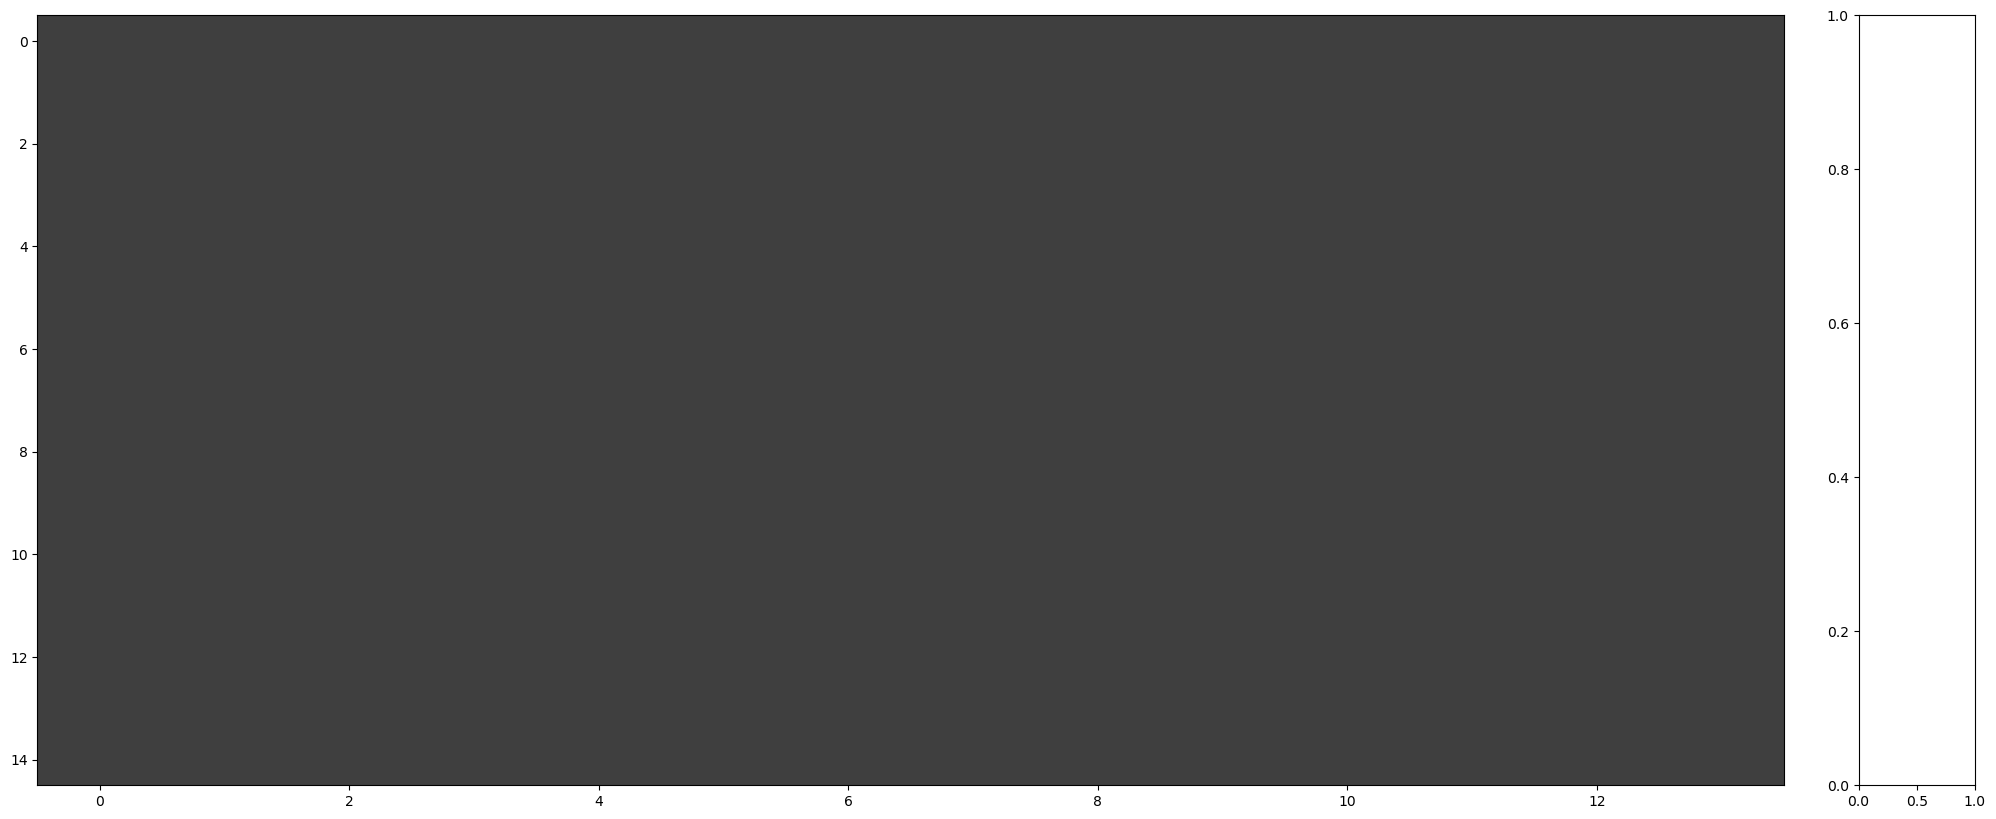

In [283]:
import missingno as msno
msno.matrix(data_pivotedtransfer)
msno.matrix(data_pivotedTaxsecu)
msno.matrix(data_pivotedP90)
msno.matrix(data_pivotedCPI)
msno.matrix(data_pivotedCI)
msno.matrix(data_pivotedTE)
msno.matrix(data_pivotedMDI)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

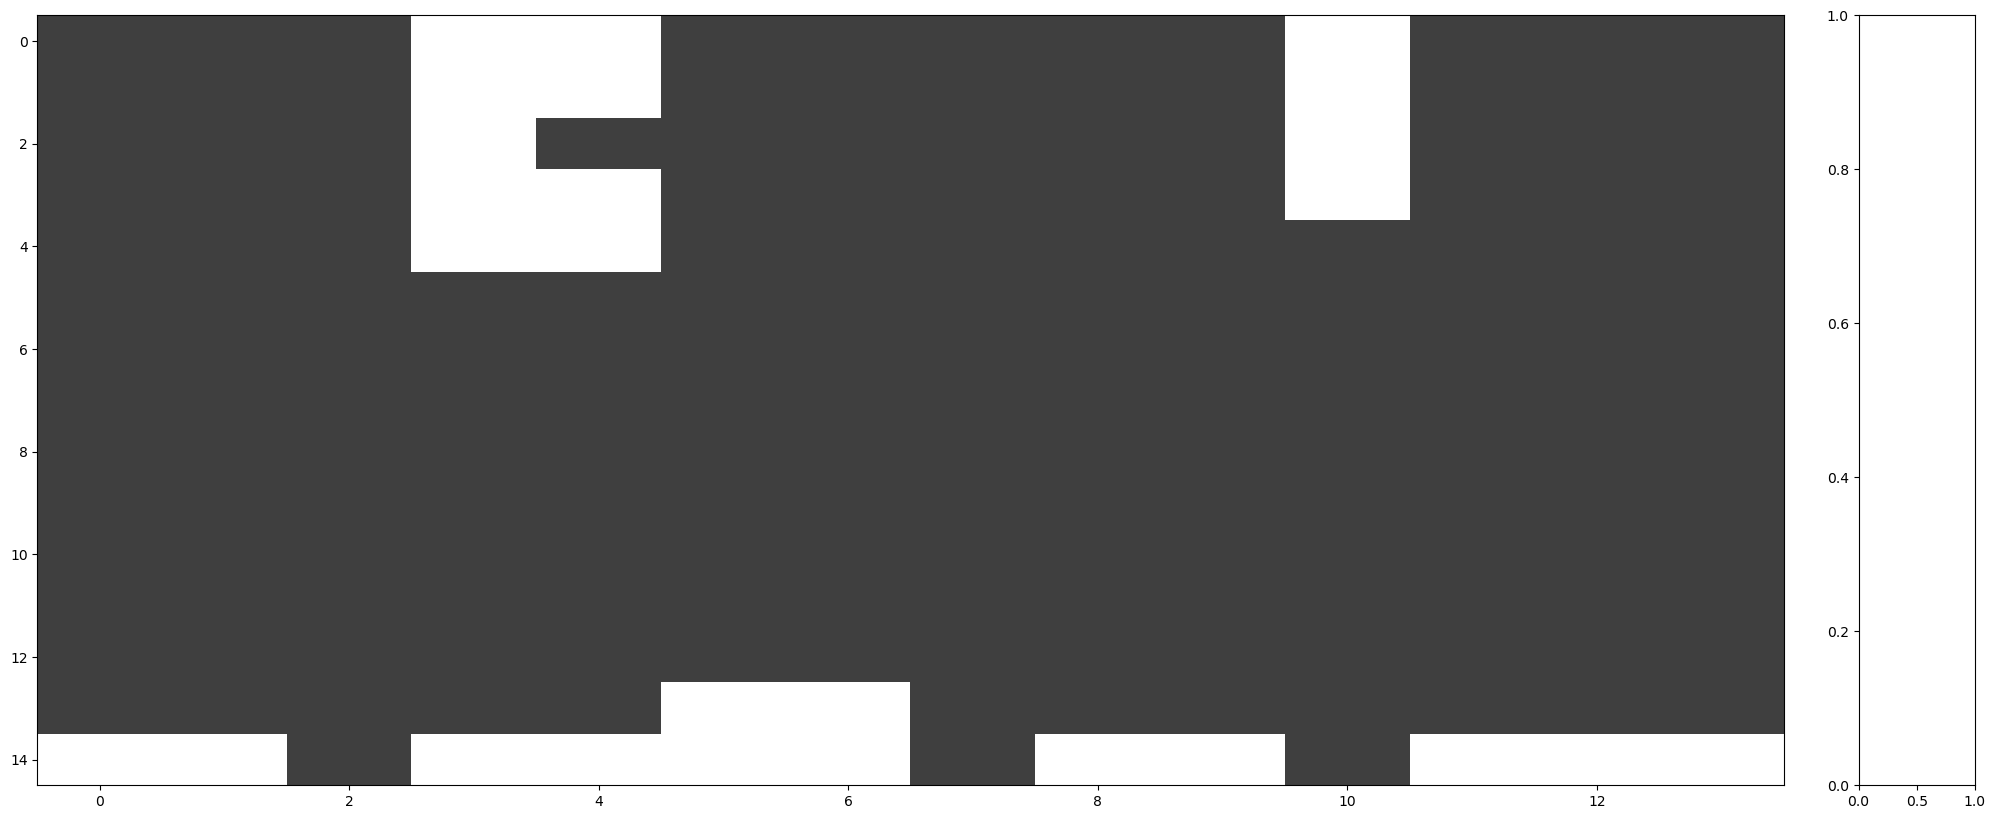

In [93]:
msno.matrix(data_pivotedtransfer)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

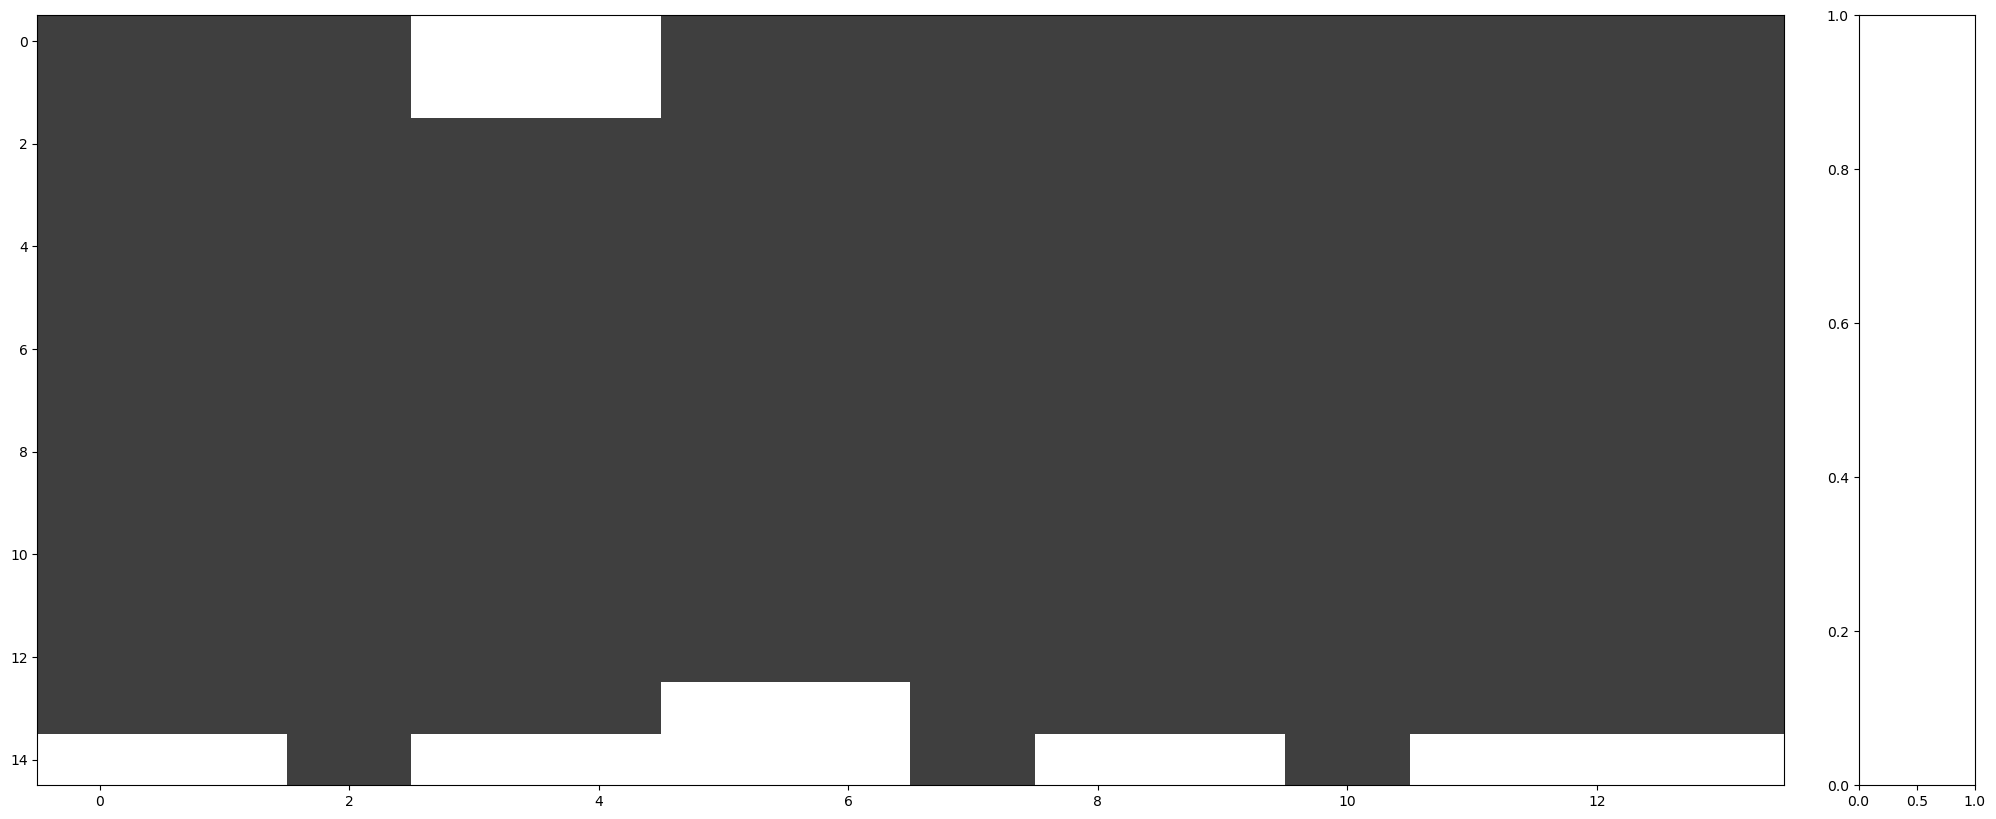

In [94]:
msno.matrix(data_pivotedTaxsecu)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

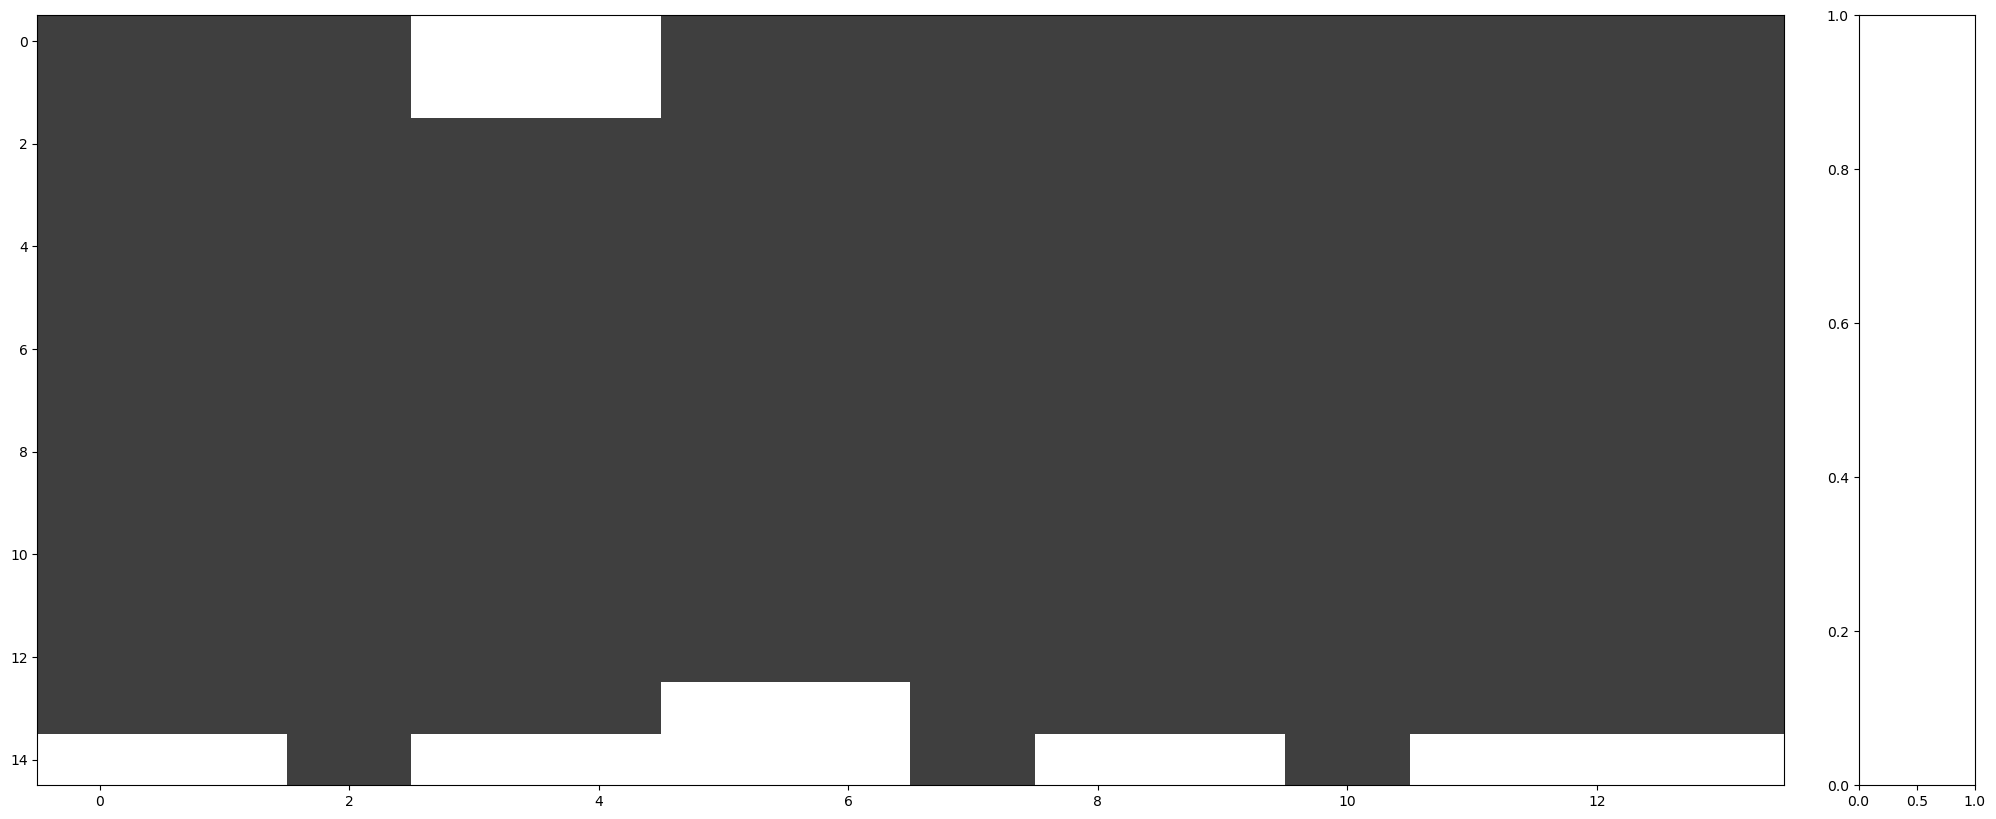

In [95]:
msno.matrix(data_pivotedP90)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

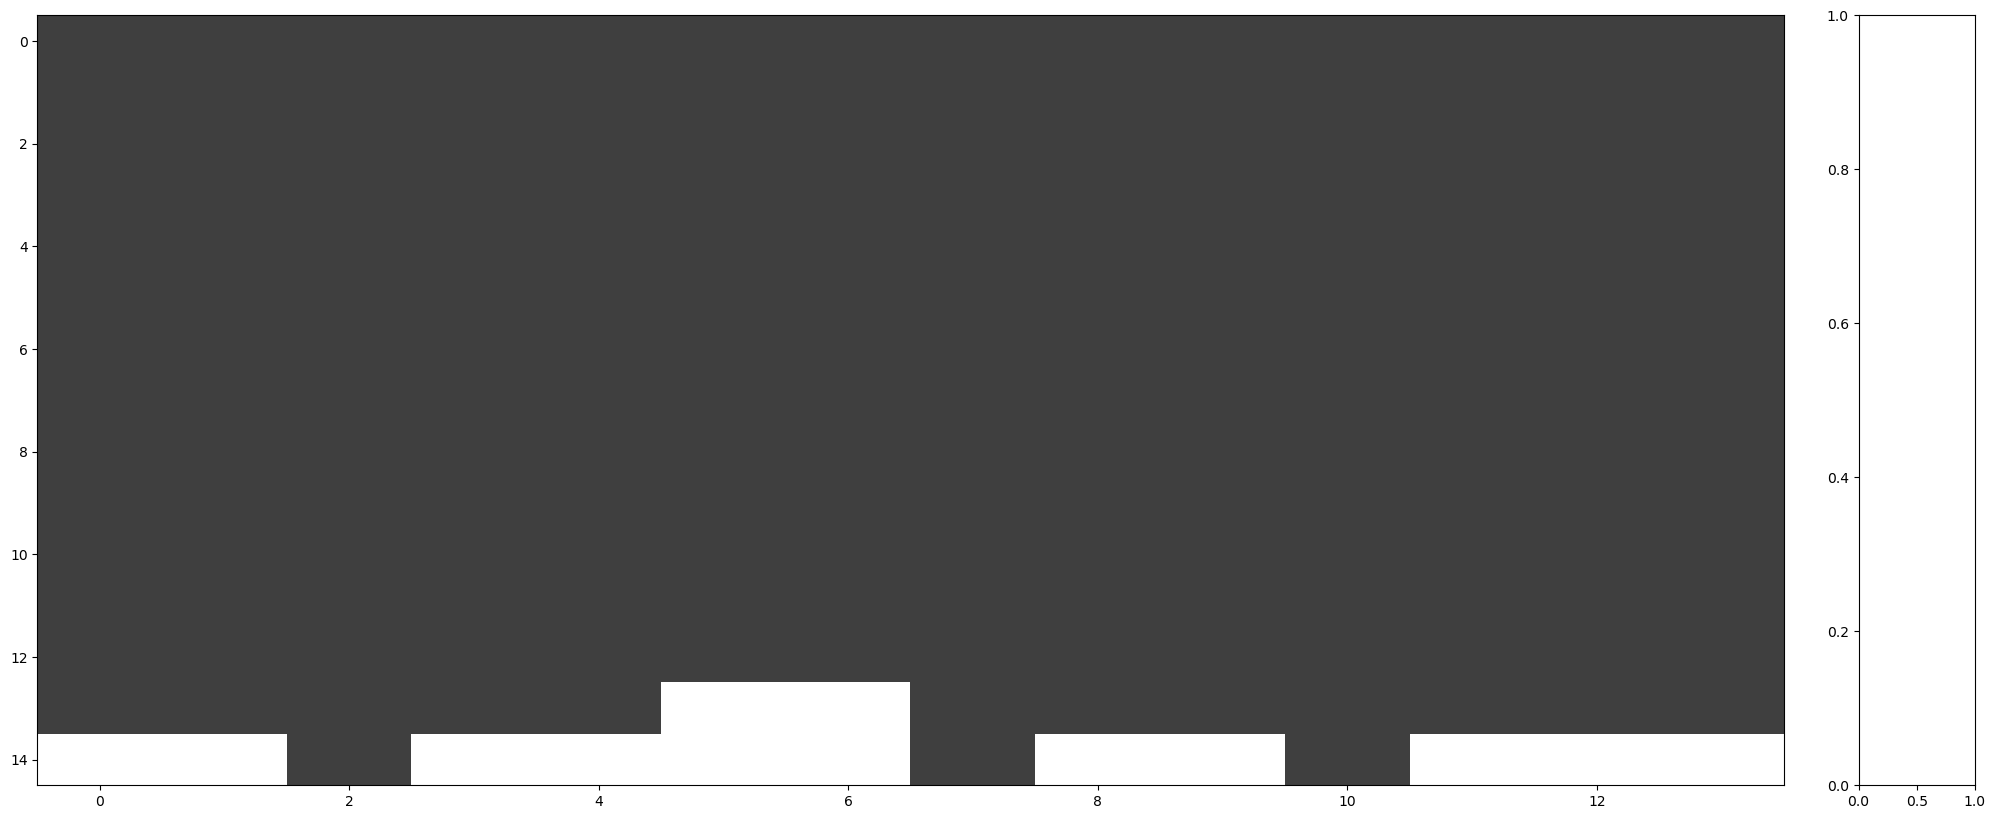

In [96]:
msno.matrix(data_pivotedCPI)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

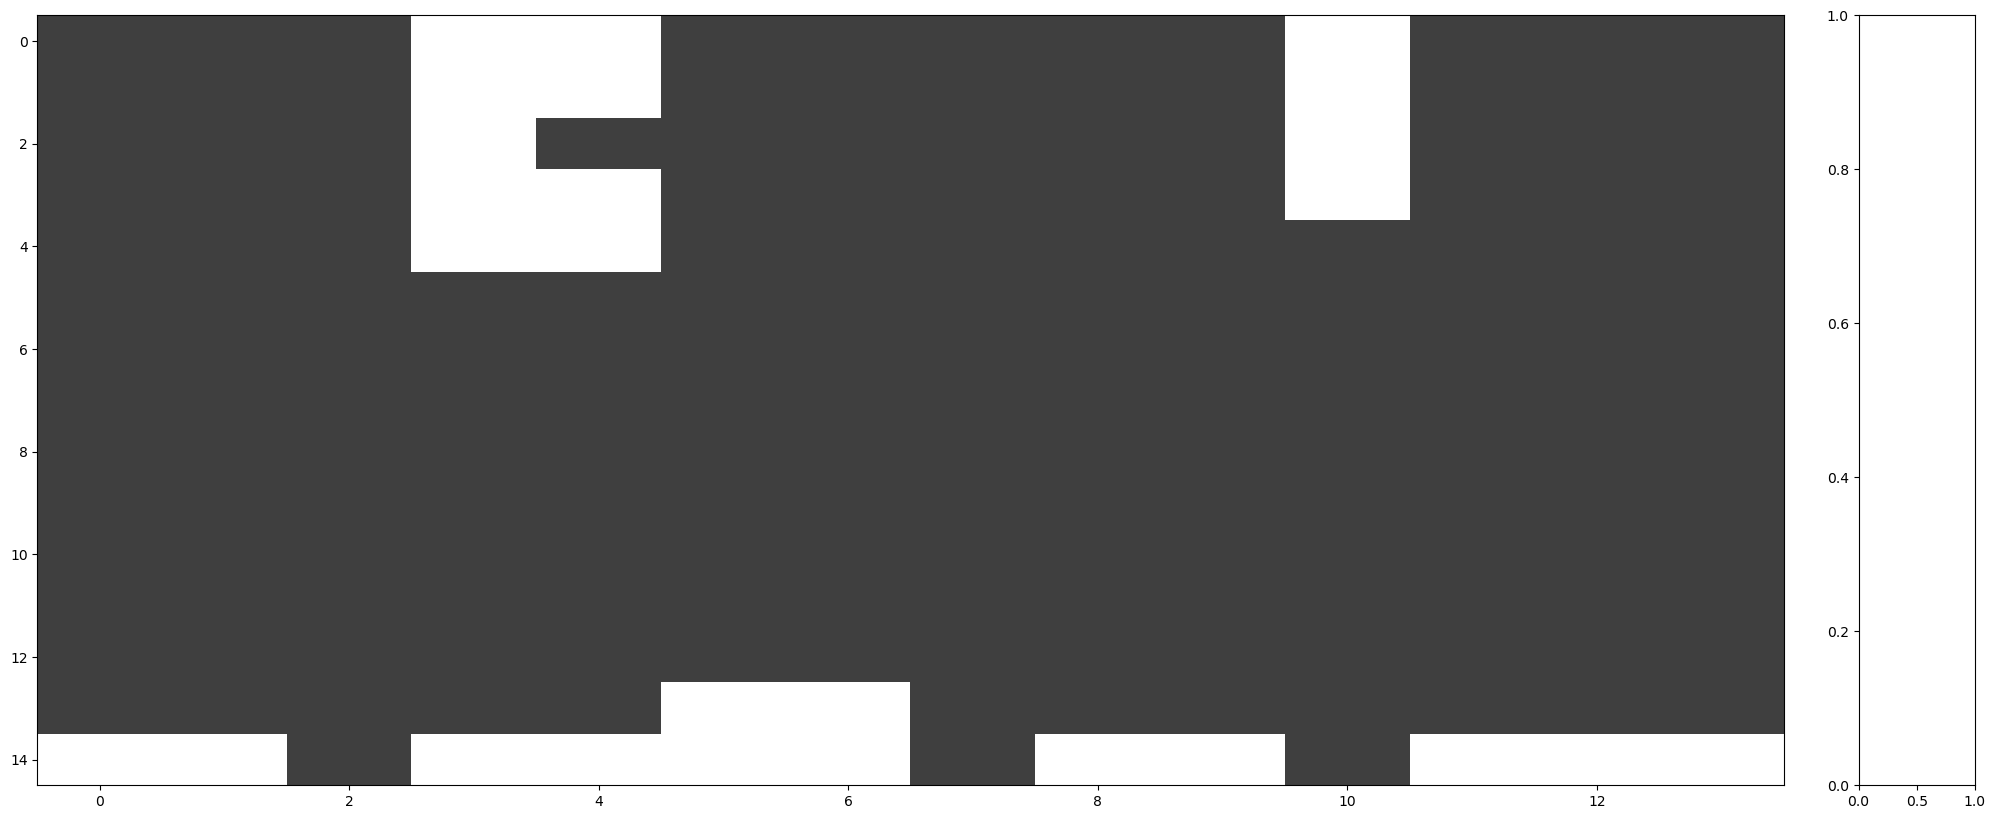

In [97]:
msno.matrix(data_pivotedCI)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

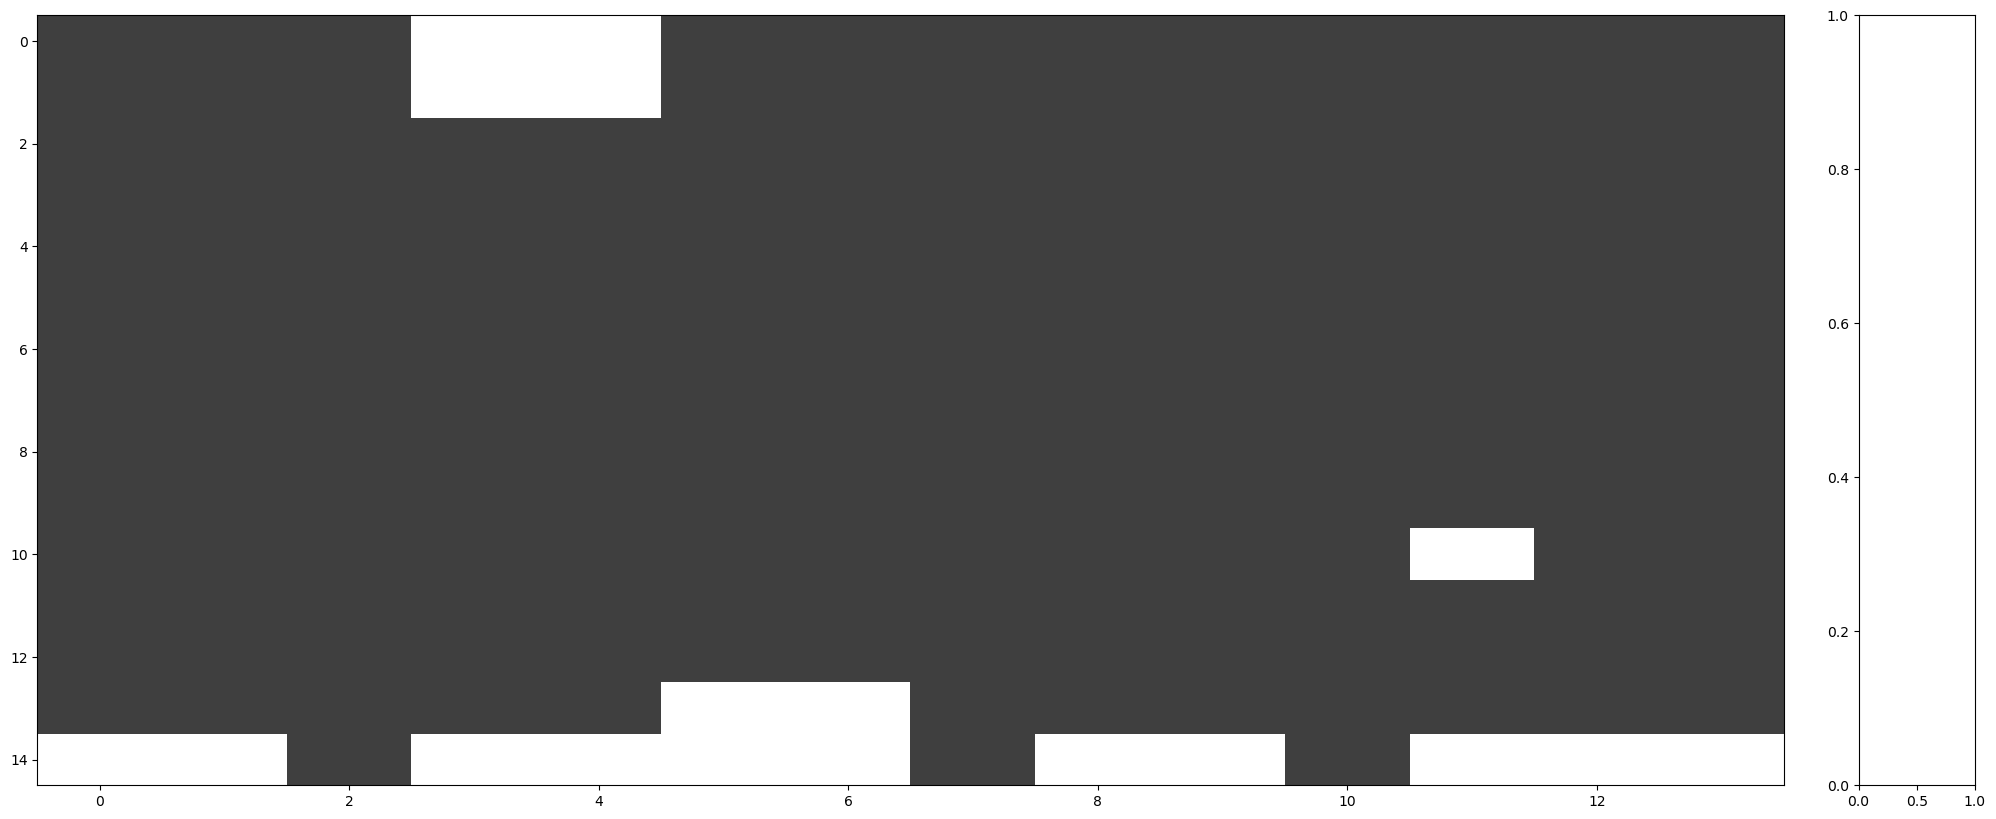

In [98]:
msno.matrix(data_pivotedTE)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

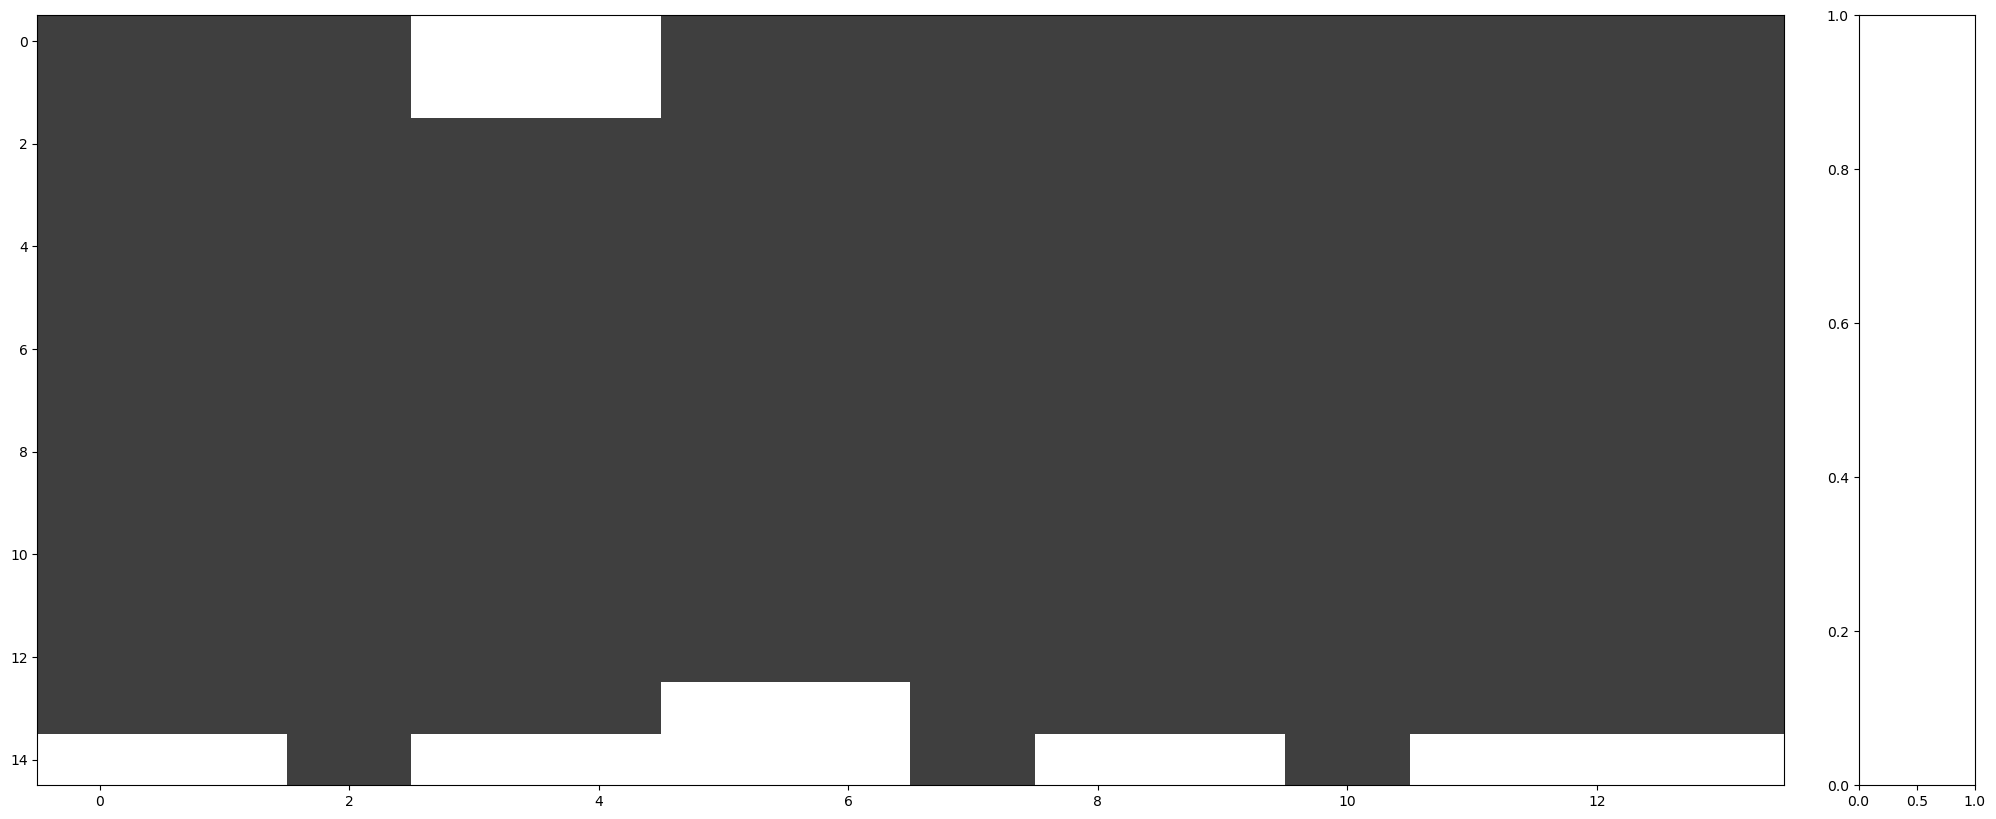

In [284]:
msno.matrix(data_pivotedMDI)

# Data Clearning (1) Imputation

In [109]:
data_pivotedTE_Transpose=data_pivotedTE.T

In [110]:
data_pivotedCI_Transpose=data_pivotedCI.T

In [111]:
data_pivotedCPI_Transpose=data_pivotedCPI.T

In [112]:
data_pivotedP90_Transpose=data_pivotedP90.T

In [113]:
data_pivotedTaxsecu_Transpose=data_pivotedTaxsecu.T

In [285]:
data_pivotedMDI_Transpose=data_pivotedMDI.T

In [122]:
data_pivotedtransfer_Transpose=data_pivotedtransfer.T
print(data_pivotedtransfer.T.head(5))

Year             2006          2007          2008          2009          2010  \
Country                                                                         
Austria  11820.333333  11240.333333  12050.000000  12730.666667  13253.333333   
Estonia   1548.000000   1828.000000   2254.000000   2516.666667   2478.333333   
Finland   2638.666667   2603.000000   2653.333333   2736.666667   2794.666667   
France            NaN           NaN           NaN           NaN           NaN   
Germany           NaN           NaN   8163.000000           NaN           NaN   

Year             2011          2012          2013          2014          2015  \
Country                                                                         
Austria  13408.333333  13742.333333  14615.000000  14785.666667  15004.000000   
Estonia   2546.000000   2707.000000   2869.666667   2834.000000   3170.000000   
Finland   2798.000000   2788.666667   2914.666667   2926.666667   3002.000000   
France   11556.666667  1204

In [148]:
data_pivotedTaxsecu.columns

Index(['Austria', 'Estonia', 'Finland', 'France', 'Germany', 'Ireland',
       'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'Portugal',
       'Slovenia', 'Spain'],
      dtype='object', name='Country')

In [124]:
data_pivotedtransfer

Country,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
Year,,,,,,,,,,,,,,
2006,11820.333333,1548.000000,2638.666667,NaN,NaN,9851.333333,8538.000000,1119.000000,1205.333333,17306.666667,NaN,4342.333333,4762.000000,4896.000000
2007,11240.333333,1828.000000,2603.000000,NaN,NaN,10867.333333,9060.000000,1301.000000,1562.666667,17707.666667,NaN,4417.666667,5028.333333,5196.666667
2008,12050.000000,2254.000000,2653.333333,NaN,8163.000000,11977.000000,9304.333333,1686.333333,2055.666667,19664.666667,NaN,4460.000000,5372.666667,6188.666667
2009,12730.666667,2516.666667,2736.666667,NaN,NaN,12564.666667,9681.666667,2119.333333,2100.000000,20379.666667,NaN,4735.666667,5719.000000,6683.000000
2010,13253.333333,2478.333333,2794.666667,NaN,NaN,12053.000000,9834.333333,2218.333333,2017.666667,20947.000000,7200.000000,4850.333333,5934.666667,6830.000000
2011,13408.333333,2546.000000,2798.000000,11556.666667,8785.666667,11730.333333,10005.000000,2105.333333,2020.000000,21579.000000,7350.000000,5276.666667,6166.666667,7062.333333
2012,13742.333333,2707.000000,2788.666667,12045.000000,8849.000000,12275.000000,10177.666667,2114.000000,2206.333333,22931.666667,7450.000000,5252.666667,6017.666667,7481.333333
2013,14615.000000,2869.666667,2914.666667,12403.333333,9057.000000,11843.000000,10300.333333,2202.666667,2130.333333,23721.666667,7650.000000,5539.333333,6095.000000,7668.333333
2014,14785.666667,2834.000000,2926.666667,12616.666667,9224.000000,12140.666667,10466.000000,2301.333333,2169.333333,23916.000000,7833.333333,5520.333333,6137.333333,7545.333333


In [256]:
# Fill NaN Values in One Column with Mean
# Among mean, median, most frequent, mean looks proper for those time series data. 
# Expecting to see dynamics of variables as time goes by

data_pivotedtransfer['Austria'] = data_pivotedtransfer['Austria'].fillna(data_pivotedtransfer['Austria'].mean())
data_pivotedTaxsecu['Austria'] = data_pivotedTaxsecu['Austria'].fillna(data_pivotedTaxsecu['Austria'].mean())
data_pivotedP90['Austria'] = data_pivotedP90['Austria'].fillna(data_pivotedP90['Austria'].mean())
data_pivotedCPI['Austria'] = data_pivotedCPI['Austria'].fillna(data_pivotedCPI['Austria'].mean())
data_pivotedCI['Austria'] = data_pivotedCI['Austria'].fillna(data_pivotedCI['Austria'].mean())
data_pivotedTE['Austria'] = data_pivotedTE['Austria'].fillna(data_pivotedTE['Austria'].mean())

In [268]:
data_pivotedtransfer['Austria'] = data_pivotedtransfer['Austria'].fillna(data_pivotedtransfer['Austria'].mean())
data_pivotedtransfer['Austria']

Year
2006    11820.333333
2007    11240.333333
2008    12050.000000
2009    12730.666667
2010    13253.333333
2011    13408.333333
2012    13742.333333
2013    14615.000000
2014    14785.666667
2015    15004.000000
2016    15298.333333
2017    15239.666667
2018    15815.000000
2019    16320.000000
2020    13951.642857
Name: Austria, dtype: float64

In [159]:
data_pivotedtransfer['Estonia'] = data_pivotedtransfer['Estonia'].fillna(data_pivotedtransfer['Estonia'].mean())
data_pivotedtransfer['Finland'] = data_pivotedtransfer['Finland'].fillna(data_pivotedtransfer['Finland'].mean())
data_pivotedtransfer['France'] = data_pivotedtransfer['France'].fillna(data_pivotedtransfer['France'].mean())
data_pivotedtransfer['Germany'] = data_pivotedtransfer['Germany'].fillna(data_pivotedtransfer['Germany'].mean())
data_pivotedtransfer['Ireland'] = data_pivotedtransfer['Ireland'].fillna(data_pivotedtransfer['Ireland'].mean())
data_pivotedtransfer['Italy'] = data_pivotedtransfer['Italy'].fillna(data_pivotedtransfer['Italy'].mean())
data_pivotedtransfer['Latvia'] = data_pivotedtransfer['Latvia'].fillna(data_pivotedtransfer['Latvia'].mean())
data_pivotedtransfer['Lithuania'] = data_pivotedtransfer['Lithuania'].fillna(data_pivotedtransfer['Lithuania'].mean())
data_pivotedtransfer['Luxembourg'] = data_pivotedtransfer['Luxembourg'].fillna(data_pivotedtransfer['Luxembourg'].mean())
data_pivotedtransfer['Netherlands'] = data_pivotedtransfer['Netherlands'].fillna(data_pivotedtransfer['Netherlands'].mean())
data_pivotedtransfer['Portugal'] = data_pivotedtransfer['Portugal'].fillna(data_pivotedtransfer['Portugal'].mean())
data_pivotedtransfer['Slovenia'] = data_pivotedtransfer['Slovenia'].fillna(data_pivotedtransfer['Slovenia'].mean())
data_pivotedtransfer['Spain'] = data_pivotedtransfer['Spain'].fillna(data_pivotedtransfer['Spain'].mean())
'Estonia', 'Finland', 'France', 'Germany', 'Ireland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'Portugal','Slovenia', 'Spain'

('Estonia',
 'Finland',
 'France',
 'Germany',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Netherlands',
 'Portugal',
 'Slovenia',
 'Spain')

In [160]:
data_pivotedtransfer['Estonia'] = data_pivotedtransfer['Estonia'].fillna(data_pivotedtransfer['Estonia'].mean())

In [161]:
data_pivotedtransfer['Finland'] = data_pivotedtransfer['Finland'].fillna(data_pivotedtransfer['Finland'].mean())

In [162]:
data_pivotedtransfer['France'] = data_pivotedtransfer['France'].fillna(data_pivotedtransfer['France'].mean())

In [163]:
data_pivotedtransfer['Germany'] = data_pivotedtransfer['Germany'].fillna(data_pivotedtransfer['Germany'].mean())

In [164]:
data_pivotedtransfer['Ireland'] = data_pivotedtransfer['Ireland'].fillna(data_pivotedtransfer['Ireland'].mean())

In [165]:
data_pivotedtransfer['Italy'] = data_pivotedtransfer['Italy'].fillna(data_pivotedtransfer['Italy'].mean())

In [166]:
data_pivotedtransfer['Latvia'] = data_pivotedtransfer['Latvia'].fillna(data_pivotedtransfer['Latvia'].mean())

In [167]:
data_pivotedtransfer['Lithuania'] = data_pivotedtransfer['Lithuania'].fillna(data_pivotedtransfer['Lithuania'].mean())

In [168]:
data_pivotedtransfer['Luxembourg'] = data_pivotedtransfer['Luxembourg'].fillna(data_pivotedtransfer['Luxembourg'].mean())

In [169]:
data_pivotedtransfer['Netherlands'] = data_pivotedtransfer['Netherlands'].fillna(data_pivotedtransfer['Netherlands'].mean())

In [170]:
data_pivotedtransfer['Portugal'] = data_pivotedtransfer['Portugal'].fillna(data_pivotedtransfer['Portugal'].mean())

In [171]:
data_pivotedtransfer['Slovenia'] = data_pivotedtransfer['Slovenia'].fillna(data_pivotedtransfer['Slovenia'].mean())

In [172]:
data_pivotedtransfer['Spain'] = data_pivotedtransfer['Spain'].fillna(data_pivotedtransfer['Spain'].mean())

In [156]:
data_pivotedTaxsecu['Austria'] = data_pivotedTaxsecu['Austria'].fillna(data_pivotedTaxsecu['Austria'].mean())
data_pivotedTaxsecu['Austria']

Year
2006    -6965.333333
2007    -7652.000000
2008    -8151.666667
2009    -8242.666667
2010    -8079.333333
2011    -8415.000000
2012    -8666.333333
2013    -9248.000000
2014    -9230.333333
2015    -9800.666667
2016    -9547.666667
2017    -9510.333333
2018    -9819.333333
2019   -10605.000000
2020    -8852.404762
Name: Austria, dtype: float64

In [173]:
data_pivotedTaxsecu['Estonia'] = data_pivotedTaxsecu['Estonia'].fillna(data_pivotedTaxsecu['Estonia'].mean())
data_pivotedTaxsecu['Finland'] = data_pivotedTaxsecu['Finland'].fillna(data_pivotedTaxsecu['Finland'].mean())
data_pivotedTaxsecu['France'] = data_pivotedTaxsecu['France'].fillna(data_pivotedTaxsecu['France'].mean())
data_pivotedTaxsecu['Germany'] = data_pivotedTaxsecu['Germany'].fillna(data_pivotedTaxsecu['Germany'].mean())
data_pivotedTaxsecu['Ireland'] = data_pivotedTaxsecu['Ireland'].fillna(data_pivotedTaxsecu['Ireland'].mean())
data_pivotedTaxsecu['Italy'] = data_pivotedTaxsecu['Italy'].fillna(data_pivotedTaxsecu['Italy'].mean())
data_pivotedTaxsecu['Latvia'] = data_pivotedTaxsecu['Latvia'].fillna(data_pivotedTaxsecu['Latvia'].mean())
data_pivotedTaxsecu['Lithuania'] = data_pivotedTaxsecu['Lithuania'].fillna(data_pivotedTaxsecu['Lithuania'].mean())
data_pivotedTaxsecu['Luxembourg'] = data_pivotedTaxsecu['Luxembourg'].fillna(data_pivotedTaxsecu['Luxembourg'].mean())
data_pivotedTaxsecu['Netherlands'] = data_pivotedTaxsecu['Netherlands'].fillna(data_pivotedTaxsecu['Netherlands'].mean())
data_pivotedTaxsecu['Portugal'] = data_pivotedTaxsecu['Portugal'].fillna(data_pivotedTaxsecu['Portugal'].mean())
data_pivotedTaxsecu['Slovenia'] = data_pivotedTaxsecu['Slovenia'].fillna(data_pivotedTaxsecu['Slovenia'].mean())
data_pivotedTaxsecu['Spain'] = data_pivotedTaxsecu['Spain'].fillna(data_pivotedTaxsecu['Spain'].mean())

In [174]:
data_pivotedTaxsecu['Estonia'] = data_pivotedTaxsecu['Estonia'].fillna(data_pivotedTaxsecu['Estonia'].mean())

In [175]:
data_pivotedTaxsecu['Finland'] = data_pivotedTaxsecu['Finland'].fillna(data_pivotedTaxsecu['Finland'].mean())

In [176]:
data_pivotedTaxsecu['France'] = data_pivotedTaxsecu['France'].fillna(data_pivotedTaxsecu['France'].mean())

In [177]:
data_pivotedTaxsecu['Germany'] = data_pivotedTaxsecu['Germany'].fillna(data_pivotedTaxsecu['Germany'].mean())

In [178]:
data_pivotedTaxsecu['Ireland'] = data_pivotedTaxsecu['Ireland'].fillna(data_pivotedTaxsecu['Ireland'].mean())

In [179]:
data_pivotedTaxsecu['Italy'] = data_pivotedTaxsecu['Italy'].fillna(data_pivotedTaxsecu['Italy'].mean())

In [180]:
data_pivotedTaxsecu['Latvia'] = data_pivotedTaxsecu['Latvia'].fillna(data_pivotedTaxsecu['Latvia'].mean())

In [181]:
data_pivotedTaxsecu['Lithuania'] = data_pivotedTaxsecu['Lithuania'].fillna(data_pivotedTaxsecu['Lithuania'].mean())

In [182]:
data_pivotedTaxsecu['Luxembourg'] = data_pivotedTaxsecu['Luxembourg'].fillna(data_pivotedTaxsecu['Luxembourg'].mean())

In [183]:
data_pivotedTaxsecu['Netherlands'] = data_pivotedTaxsecu['Netherlands'].fillna(data_pivotedTaxsecu['Netherlands'].mean())

In [184]:
data_pivotedTaxsecu['Portugal'] = data_pivotedTaxsecu['Portugal'].fillna(data_pivotedTaxsecu['Portugal'].mean())

In [185]:
data_pivotedTaxsecu['Slovenia'] = data_pivotedTaxsecu['Slovenia'].fillna(data_pivotedTaxsecu['Slovenia'].mean())

In [186]:
data_pivotedTaxsecu['Spain'] = data_pivotedTaxsecu['Spain'].fillna(data_pivotedTaxsecu['Spain'].mean())

In [136]:
data_pivotedP90['Austria'] = data_pivotedP90['Austria'].fillna(data_pivotedP90['Austria'].mean())
data_pivotedP90['Austria'] 

Year
2006    3.200000
2007    3.566667
2008    3.366667
2009    3.566667
2010    3.500000
2011    3.533333
2012    3.400000
2013    3.366667
2014    3.300000
2015    3.266667
2016    3.466667
2017    3.433333
2018    3.500000
2019    3.500000
2020    3.426190
Name: Austria, dtype: float64

In [189]:
data_pivotedP90['Estonia'] = data_pivotedP90['Estonia'].fillna(data_pivotedP90['Estonia'].mean())

In [190]:
data_pivotedP90['Finland'] = data_pivotedP90['Finland'].fillna(data_pivotedP90['Finland'].mean())

In [191]:
data_pivotedP90['France'] = data_pivotedP90['France'].fillna(data_pivotedP90['France'].mean())

In [192]:
data_pivotedP90['Germany'] = data_pivotedP90['Germany'].fillna(data_pivotedP90['Germany'].mean())

In [193]:
data_pivotedP90['Ireland'] = data_pivotedP90['Ireland'].fillna(data_pivotedP90['Ireland'].mean())

In [194]:
data_pivotedP90['Italy'] = data_pivotedP90['Italy'].fillna(data_pivotedP90['Italy'].mean())

In [195]:
data_pivotedP90['Latvia'] = data_pivotedP90['Latvia'].fillna(data_pivotedP90['Latvia'].mean())

In [196]:
data_pivotedP90['Lithuania'] = data_pivotedP90['Lithuania'].fillna(data_pivotedP90['Lithuania'].mean())

In [197]:
data_pivotedP90['Luxembourg'] = data_pivotedP90['Luxembourg'].fillna(data_pivotedP90['Luxembourg'].mean())

In [198]:
data_pivotedP90['Netherlands'] = data_pivotedP90['Netherlands'].fillna(data_pivotedP90['Netherlands'].mean())

In [199]:
data_pivotedP90['Portugal'] = data_pivotedP90['Portugal'].fillna(data_pivotedP90['Portugal'].mean())

In [200]:
data_pivotedP90['Slovenia'] = data_pivotedP90['Slovenia'].fillna(data_pivotedP90['Slovenia'].mean())

In [201]:
data_pivotedP90['Spain'] = data_pivotedP90['Spain'].fillna(data_pivotedP90['Spain'].mean())

In [188]:
data_pivotedP90['Estonia'] = data_pivotedP90['Estonia'].fillna(data_pivotedP90['Estonia'].mean())
data_pivotedP90['Finland'] = data_pivotedP90['Finland'].fillna(data_pivotedP90['Finland'].mean())
data_pivotedP90['France'] = data_pivotedP90['France'].fillna(data_pivotedP90['France'].mean())
data_pivotedP90['Germany'] = data_pivotedP90['Germany'].fillna(data_pivotedP90['Germany'].mean())
data_pivotedP90['Ireland'] = data_pivotedP90['Ireland'].fillna(data_pivotedP90['Ireland'].mean())
data_pivotedP90['Italy'] = data_pivotedP90['Italy'].fillna(data_pivotedP90['Italy'].mean())
data_pivotedP90['Latvia'] = data_pivotedP90['Latvia'].fillna(data_pivotedP90['Latvia'].mean())
data_pivotedP90['Lithuania'] = data_pivotedP90['Lithuania'].fillna(data_pivotedP90['Lithuania'].mean())
data_pivotedP90['Luxembourg'] = data_pivotedP90['Luxembourg'].fillna(data_pivotedP90['Luxembourg'].mean())
data_pivotedP90['Netherlands'] = data_pivotedP90['Netherlands'].fillna(data_pivotedP90['Netherlands'].mean())
data_pivotedP90['Portugal'] = data_pivotedP90['Portugal'].fillna(data_pivotedP90['Portugal'].mean())
data_pivotedP90['Slovenia'] = data_pivotedP90['Slovenia'].fillna(data_pivotedP90['Slovenia'].mean())
data_pivotedP90['Spain'] = data_pivotedP90['Spain'].fillna(data_pivotedP90['Spain'].mean())

In [137]:
data_pivotedCPI['Austria'] = data_pivotedCPI['Austria'].fillna(data_pivotedCPI['Austria'].mean())
data_pivotedCPI['Austria'] 

Year
2006     83.720980
2007     85.536510
2008     88.287320
2009     88.734330
2010     90.343550
2011     93.312770
2012     95.632230
2013     97.545020
2014     99.111400
2015    100.000000
2016    100.891600
2017    102.991400
2018    105.049600
2019    106.657800
2020     95.558179
Name: Austria, dtype: float64

In [212]:
data_pivotedCPI['Estonia'] = data_pivotedCPI['Estonia'].fillna(data_pivotedCPI['Estonia'].mean())

In [213]:
data_pivotedCPI['Finland'] = data_pivotedCPI['Finland'].fillna(data_pivotedCPI['Finland'].mean())

In [214]:
data_pivotedCPI['France'] = data_pivotedCPI['France'].fillna(data_pivotedCPI['France'].mean())

In [215]:
data_pivotedCPI['Germany'] = data_pivotedCPI['Germany'].fillna(data_pivotedCPI['Germany'].mean())

In [216]:
data_pivotedCPI['Ireland'] = data_pivotedCPI['Ireland'].fillna(data_pivotedCPI['Ireland'].mean())

In [217]:
data_pivotedCPI['Italy'] = data_pivotedCPI['Italy'].fillna(data_pivotedCPI['Italy'].mean())

In [218]:
data_pivotedCPI['Latvia'] = data_pivotedCPI['Latvia'].fillna(data_pivotedCPI['Latvia'].mean())

In [219]:
data_pivotedCPI['Lithuania'] = data_pivotedCPI['Lithuania'].fillna(data_pivotedCPI['Lithuania'].mean())

In [220]:
data_pivotedCPI['Luxembourg'] = data_pivotedCPI['Luxembourg'].fillna(data_pivotedCPI['Luxembourg'].mean())

In [221]:
data_pivotedCPI['Netherlands'] = data_pivotedCPI['Netherlands'].fillna(data_pivotedCPI['Netherlands'].mean())

In [222]:
data_pivotedCPI['Portugal'] = data_pivotedCPI['Portugal'].fillna(data_pivotedCPI['Portugal'].mean())

In [223]:
data_pivotedCPI['Slovenia'] = data_pivotedCPI['Slovenia'].fillna(data_pivotedCPI['Slovenia'].mean())

In [224]:
data_pivotedCPI['Spain'] = data_pivotedCPI['Spain'].fillna(data_pivotedCPI['Spain'].mean())

In [138]:
data_pivotedCI['Austria'] = data_pivotedCI['Austria'].fillna(data_pivotedCI['Austria'].mean())
data_pivotedCI['Austria']

Year
2006     665.333333
2007    1075.333333
2008     915.333333
2009    1016.333333
2010    1114.666667
2011    1417.000000
2012    1083.000000
2013    1353.666667
2014    1353.000000
2015    1459.000000
2016    1413.000000
2017    1364.333333
2018    1401.666667
2019    1609.666667
2020    1231.523810
Name: Austria, dtype: float64

In [226]:
data_pivotedCI['Estonia'] = data_pivotedCI['Estonia'].fillna(data_pivotedCI['Estonia'].mean())

In [227]:
data_pivotedCI['Finland'] = data_pivotedCI['Finland'].fillna(data_pivotedCI['Finland'].mean())

In [228]:
data_pivotedCI['France'] = data_pivotedCI['France'].fillna(data_pivotedCI['France'].mean())

In [229]:
data_pivotedCI['Germany'] = data_pivotedCI['Germany'].fillna(data_pivotedCI['Germany'].mean())

In [230]:
data_pivotedCI['Ireland'] = data_pivotedCI['Ireland'].fillna(data_pivotedCI['Ireland'].mean())

In [231]:
data_pivotedCI['Italy'] = data_pivotedCI['Italy'].fillna(data_pivotedCI['Italy'].mean())

In [232]:
data_pivotedCI['Latvia'] = data_pivotedCI['Latvia'].fillna(data_pivotedCI['Latvia'].mean())

In [233]:
data_pivotedCI['Lithuania'] = data_pivotedCI['Lithuania'].fillna(data_pivotedCI['Lithuania'].mean())

In [234]:
data_pivotedCI['Luxembourg'] = data_pivotedCI['Luxembourg'].fillna(data_pivotedCI['Luxembourg'].mean())

In [235]:
data_pivotedCI['Netherlands'] = data_pivotedCI['Netherlands'].fillna(data_pivotedCI['Netherlands'].mean())

In [236]:
data_pivotedCI['Portugal'] = data_pivotedCI['Portugal'].fillna(data_pivotedCI['Portugal'].mean())

In [237]:
data_pivotedCI['Slovenia'] = data_pivotedCI['Slovenia'].fillna(data_pivotedCI['Slovenia'].mean())

In [238]:
data_pivotedCI['Spain'] = data_pivotedCI['Spain'].fillna(data_pivotedCI['Spain'].mean())

In [239]:
data_pivotedCI['Estonia'] = data_pivotedCI['Estonia'].fillna(data_pivotedCI['Estonia'].mean())
data_pivotedCI['Finland'] = data_pivotedCI['Finland'].fillna(data_pivotedCI['Finland'].mean())
data_pivotedCI['France'] = data_pivotedCI['France'].fillna(data_pivotedCI['France'].mean())
data_pivotedCI['Germany'] = data_pivotedCI['Germany'].fillna(data_pivotedCI['Germany'].mean())
data_pivotedCI['Ireland'] = data_pivotedCI['Ireland'].fillna(data_pivotedCI['Ireland'].mean())
data_pivotedCI['Italy'] = data_pivotedCI['Italy'].fillna(data_pivotedCI['Italy'].mean())
data_pivotedCI['Latvia'] = data_pivotedCI['Latvia'].fillna(data_pivotedCI['Latvia'].mean())
data_pivotedCI['Lithuania'] = data_pivotedCI['Lithuania'].fillna(data_pivotedCI['Lithuania'].mean())
data_pivotedCI['Luxembourg'] = data_pivotedCI['Luxembourg'].fillna(data_pivotedCI['Luxembourg'].mean())
data_pivotedCI['Netherlands'] = data_pivotedCI['Netherlands'].fillna(data_pivotedCI['Netherlands'].mean())
data_pivotedCI['Portugal'] = data_pivotedCI['Portugal'].fillna(data_pivotedCI['Portugal'].mean())
data_pivotedCI['Slovenia'] = data_pivotedCI['Slovenia'].fillna(data_pivotedCI['Slovenia'].mean())
data_pivotedCI['Spain'] = data_pivotedCI['Spain'].fillna(data_pivotedCI['Spain'].mean())

In [139]:
data_pivotedTE['Austria'] = data_pivotedTE['Austria'].fillna(data_pivotedTE['Austria'].mean())
data_pivotedTE['Austria'] 

Year
2006    14605.333333
2007    16533.666667
2008    17155.000000
2009    17410.666667
2010    17003.000000
2011    17492.666667
2012    18017.333333
2013    18943.000000
2014    18879.333333
2015    19133.000000
2016    20239.666667
2017    20481.000000
2018    20876.000000
2019    21773.333333
2020    18467.357143
Name: Austria, dtype: float64

In [241]:
data_pivotedTE['Estonia'] = data_pivotedTE['Estonia'].fillna(data_pivotedTE['Estonia'].mean())

In [242]:
data_pivotedTE['Finland'] = data_pivotedTE['Finland'].fillna(data_pivotedTE['Finland'].mean())

In [243]:
data_pivotedTE['France'] = data_pivotedTE['France'].fillna(data_pivotedTE['France'].mean())

In [244]:
data_pivotedTE['Germany'] = data_pivotedTE['Germany'].fillna(data_pivotedTE['Germany'].mean())

In [245]:
data_pivotedTE['Ireland'] = data_pivotedTE['Ireland'].fillna(data_pivotedTE['Ireland'].mean())

In [246]:
data_pivotedTE['Italy'] = data_pivotedTE['Italy'].fillna(data_pivotedTE['Italy'].mean())

In [247]:
data_pivotedTE['Latvia'] = data_pivotedTE['Latvia'].fillna(data_pivotedTE['Latvia'].mean())

In [248]:
data_pivotedTE['Lithuania'] = data_pivotedTE['Lithuania'].fillna(data_pivotedTE['Lithuania'].mean())

In [249]:
data_pivotedTE['Luxembourg'] = data_pivotedTE['Luxembourg'].fillna(data_pivotedTE['Luxembourg'].mean())

In [250]:
data_pivotedTE['Netherlands'] = data_pivotedTE['Netherlands'].fillna(data_pivotedTE['Netherlands'].mean())

In [251]:
data_pivotedTE['Portugal'] = data_pivotedTE['Portugal'].fillna(data_pivotedTE['Portugal'].mean())

In [252]:
data_pivotedTE['Slovenia'] = data_pivotedTE['Slovenia'].fillna(data_pivotedTE['Slovenia'].mean())

In [253]:
data_pivotedTE['Spain'] = data_pivotedTE['Spain'].fillna(data_pivotedTE['Spain'].mean())

In [254]:
data_pivotedTE['Estonia'] = data_pivotedTE['Estonia'].fillna(data_pivotedTE['Estonia'].mean())
data_pivotedTE['Finland'] = data_pivotedTE['Finland'].fillna(data_pivotedTE['Finland'].mean())
data_pivotedTE['France'] = data_pivotedTE['France'].fillna(data_pivotedTE['France'].mean())
data_pivotedTE['Germany'] = data_pivotedTE['Germany'].fillna(data_pivotedTE['Germany'].mean())
data_pivotedTE['Ireland'] = data_pivotedTE['Ireland'].fillna(data_pivotedTE['Ireland'].mean())
data_pivotedTE['Italy'] = data_pivotedTE['Italy'].fillna(data_pivotedTE['Italy'].mean())
data_pivotedTE['Latvia'] = data_pivotedTE['Latvia'].fillna(data_pivotedTE['Latvia'].mean())
data_pivotedTE['Lithuania'] = data_pivotedTE['Lithuania'].fillna(data_pivotedTE['Lithuania'].mean())
data_pivotedTE['Luxembourg'] = data_pivotedTE['Luxembourg'].fillna(data_pivotedTE['Luxembourg'].mean())
data_pivotedTE['Netherlands'] = data_pivotedTE['Netherlands'].fillna(data_pivotedTE['Netherlands'].mean())
data_pivotedTE['Portugal'] = data_pivotedTE['Portugal'].fillna(data_pivotedTE['Portugal'].mean())
data_pivotedTE['Slovenia'] = data_pivotedTE['Slovenia'].fillna(data_pivotedTE['Slovenia'].mean())
data_pivotedTE['Spain'] = data_pivotedTE['Spain'].fillna(data_pivotedTE['Spain'].mean())

In [287]:
data_pivotedMDI['Austria'] = data_pivotedMDI['Austria'].fillna(data_pivotedMDI['Austria'].mean())
data_pivotedMDI['Austria'] 

Year
2006    22550.000000
2007    23782.666667
2008    24774.333333
2009    25957.000000
2010    26321.333333
2011    26973.666667
2012    26850.000000
2013    28667.333333
2014    28513.666667
2015    28722.666667
2016    30381.000000
2017    30539.000000
2018    31413.000000
2019    32321.333333
2020    27697.642857
Name: Austria, dtype: float64

In [288]:
data_pivotedMDI['Estonia'] = data_pivotedMDI['Estonia'].fillna(data_pivotedMDI['Estonia'].mean())

In [289]:
data_pivotedMDI['Finland'] = data_pivotedMDI['Finland'].fillna(data_pivotedMDI['Finland'].mean())

In [290]:
data_pivotedMDI['France'] = data_pivotedMDI['France'].fillna(data_pivotedMDI['France'].mean())

In [291]:
data_pivotedMDI['Germany'] = data_pivotedMDI['Germany'].fillna(data_pivotedMDI['Germany'].mean())

In [292]:
data_pivotedMDI['Ireland'] = data_pivotedMDI['Ireland'].fillna(data_pivotedMDI['Ireland'].mean())

In [293]:
data_pivotedMDI['Italy'] = data_pivotedMDI['Italy'].fillna(data_pivotedMDI['Italy'].mean())

In [294]:
data_pivotedMDI['Latvia'] = data_pivotedMDI['Latvia'].fillna(data_pivotedMDI['Latvia'].mean())

In [295]:
data_pivotedMDI['Lithuania'] = data_pivotedMDI['Lithuania'].fillna(data_pivotedMDI['Lithuania'].mean())

In [296]:
data_pivotedMDI['Luxembourg'] = data_pivotedMDI['Luxembourg'].fillna(data_pivotedMDI['Luxembourg'].mean())

In [297]:
data_pivotedMDI['Netherlands'] = data_pivotedMDI['Netherlands'].fillna(data_pivotedMDI['Netherlands'].mean())

In [298]:
data_pivotedMDI['Portugal'] = data_pivotedMDI['Portugal'].fillna(data_pivotedMDI['Portugal'].mean())

In [299]:
data_pivotedMDI['Slovenia'] = data_pivotedMDI['Slovenia'].fillna(data_pivotedMDI['Slovenia'].mean())

In [300]:
data_pivotedMDI['Spain'] = data_pivotedMDI['Spain'].fillna(data_pivotedMDI['Spain'].mean())

In [286]:
data_pivotedMDI['Austria'] = data_pivotedMDI['Austria'].fillna(data_pivotedMDI['Austria'].mean())
data_pivotedMDI['Austria'] 

data_pivotedMDI['Estonia'] = data_pivotedMDI['Estonia'].fillna(data_pivotedMDI['Estonia'].mean())
data_pivotedMDI['Finland'] = data_pivotedMDI['Finland'].fillna(data_pivotedMDI['Finland'].mean())
data_pivotedMDI['France'] = data_pivotedMDI['France'].fillna(data_pivotedMDI['France'].mean())
data_pivotedMDI['Germany'] = data_pivotedMDI['Germany'].fillna(data_pivotedMDI['Germany'].mean())
data_pivotedMDI['Ireland'] = data_pivotedMDI['Ireland'].fillna(data_pivotedMDI['Ireland'].mean())
data_pivotedMDI['Italy'] = data_pivotedMDI['Italy'].fillna(data_pivotedMDI['Italy'].mean())
data_pivotedMDI['Latvia'] = data_pivotedMDI['Latvia'].fillna(data_pivotedMDI['Latvia'].mean())
data_pivotedMDI['Lithuania'] = data_pivotedMDI['Lithuania'].fillna(data_pivotedMDI['Lithuania'].mean())
data_pivotedMDI['Luxembourg'] = data_pivotedMDI['Luxembourg'].fillna(data_pivotedMDI['Luxembourg'].mean())
data_pivotedMDI['Netherlands'] = data_pivotedMDI['Netherlands'].fillna(data_pivotedMDI['Netherlands'].mean())
data_pivotedMDI['Portugal'] = data_pivotedMDI['Portugal'].fillna(data_pivotedMDI['Portugal'].mean())
data_pivotedMDI['Slovenia'] = data_pivotedMDI['Slovenia'].fillna(data_pivotedMDI['Slovenia'].mean())
data_pivotedMDI['Spain'] = data_pivotedMDI['Spain'].fillna(data_pivotedMDI['Spain'].mean())

# Data Cleaning: Confirming to count missing variables

In [302]:
data_pivotedtransfer.isnull().sum()

Country
Austria        0
Estonia        0
Finland        0
France         0
Germany        0
Ireland        0
Italy          0
Latvia         0
Lithuania      0
Luxembourg     0
Netherlands    0
Portugal       0
Slovenia       0
Spain          0
dtype: int64

In [303]:
data_pivotedTaxsecu.isnull().sum()

Country
Austria        0
Estonia        0
Finland        0
France         0
Germany        0
Ireland        0
Italy          0
Latvia         0
Lithuania      0
Luxembourg     0
Netherlands    0
Portugal       0
Slovenia       0
Spain          0
dtype: int64

In [304]:
data_pivotedP90.isnull().sum()

Country
Austria        0
Estonia        0
Finland        0
France         0
Germany        0
Ireland        0
Italy          0
Latvia         0
Lithuania      0
Luxembourg     0
Netherlands    0
Portugal       0
Slovenia       0
Spain          0
dtype: int64

In [305]:
data_pivotedCPI.isnull().sum()

Country
Austria        0
Estonia        0
Finland        0
France         0
Germany        0
Ireland        0
Italy          0
Latvia         0
Lithuania      0
Luxembourg     0
Netherlands    0
Portugal       0
Slovenia       0
Spain          0
dtype: int64

In [306]:
data_pivotedCI.isnull().sum()

Country
Austria        0
Estonia        0
Finland        0
France         0
Germany        0
Ireland        0
Italy          0
Latvia         0
Lithuania      0
Luxembourg     0
Netherlands    0
Portugal       0
Slovenia       0
Spain          0
dtype: int64

In [307]:
data_pivotedTE.isnull().sum()

Country
Austria        0
Estonia        0
Finland        0
France         0
Germany        0
Ireland        0
Italy          0
Latvia         0
Lithuania      0
Luxembourg     0
Netherlands    0
Portugal       0
Slovenia       0
Spain          0
dtype: int64

In [308]:
data_pivotedMDI.isnull().sum()

Country
Austria        0
Estonia        0
Finland        0
France         0
Germany        0
Ireland        0
Italy          0
Latvia         0
Lithuania      0
Luxembourg     0
Netherlands    0
Portugal       0
Slovenia       0
Spain          0
dtype: int64

In [301]:
data_pivotedtransfer.isnull().sum()
data_pivotedTaxsecu.isnull().sum()
data_pivotedP90.isnull().sum()
data_pivotedCPI.isnull().sum()
data_pivotedCI.isnull().sum()
data_pivotedTE.isnull().sum()
data_pivotedMDI.isnull().sum()

Country
Austria        0
Estonia        0
Finland        0
France         0
Germany        0
Ireland        0
Italy          0
Latvia         0
Lithuania      0
Luxembourg     0
Netherlands    0
Portugal       0
Slovenia       0
Spain          0
dtype: int64

# Data Visualisation with Histogram

# Key Histogram parameters
Most of the time, when visualizing data, you want to highlight specific variables. To do this using pandas histograms, you would need to utilize it’s parameters. Below are some of the most common pandas hist() parameters:

column: the specific column(s) you want to create a histogram of

by: the parameter on which to split your data; this produces multiple histograms displaying each group

bins the number of buckets your data will be grouped by (the number of bars in your histogram); pandas automatically creates bins if not specified

# Key Differences Between Histogram and Bar graph
The differences between histogram and bar graph can be drawn clearly on the following grounds:

Histogram refers to a graphical representation; that displays data by way of bars to show the frequency of numerical data. A bar graph is a pictorial representation of data that uses bars to compare different categories of data.
A histogram represents the frequency distribution of continuous variables. Conversely, a bar graph is a diagrammatic comparison of discrete variables.
Histogram presents numerical data whereas bar graph shows categorical data.
The histogram is drawn in such a way that there is no gap between the bars. On the other hand, there is proper spacing between bars in a bar graph that indicates discontinuity.
Items of the histogram are numbers, which are categorised together, to represent ranges of data. As opposed to the bar graph, items are considered as individual entities.
In the case of a bar graph, it is quite common to rearrange the blocks, from highest to lowest. But with histogram, this cannot be done, as they are shown in the sequences of classes.
The width of rectangular blocks in a histogram may or may not be same while the width of the bars in a  bar graph is always same.

array([[<Axes: title={'center': 'Spain'}>]], dtype=object)

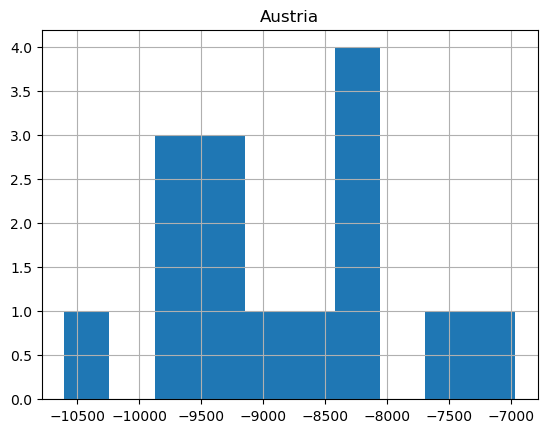

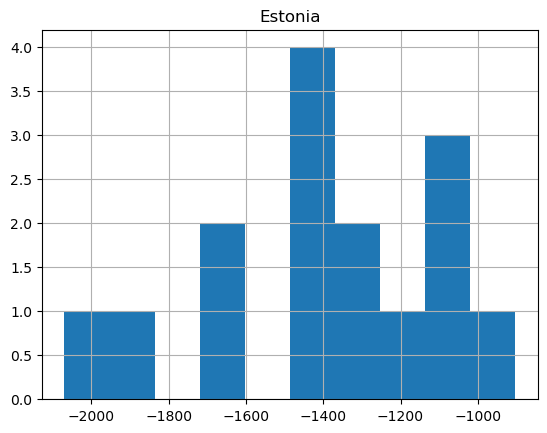

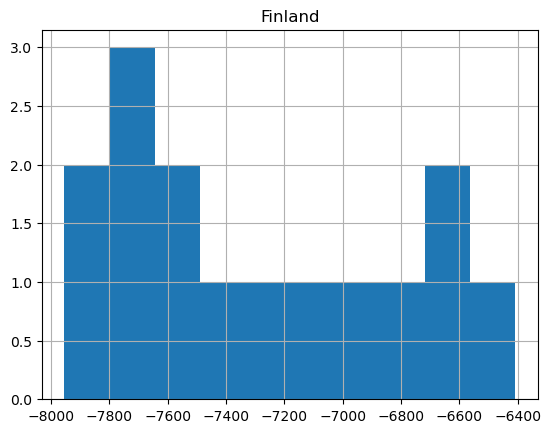

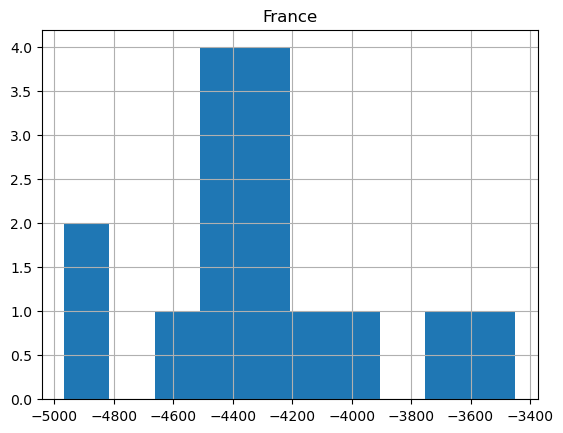

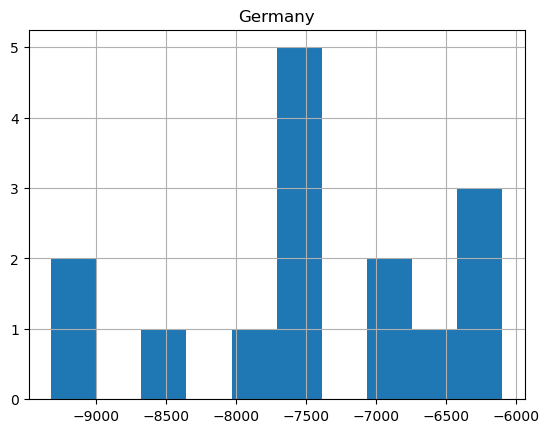

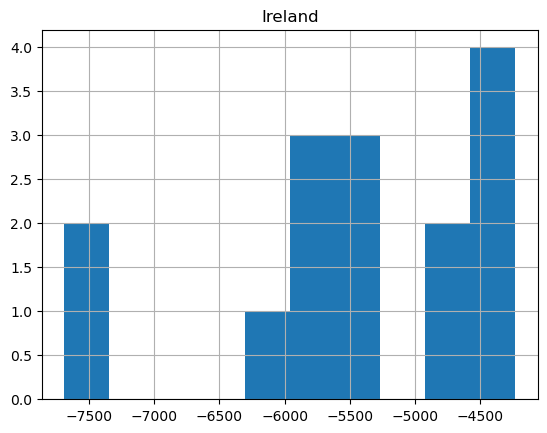

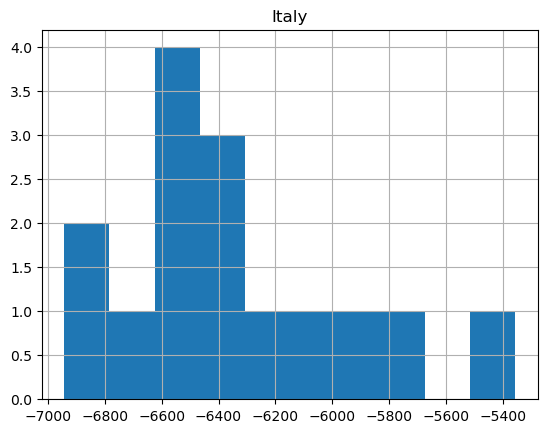

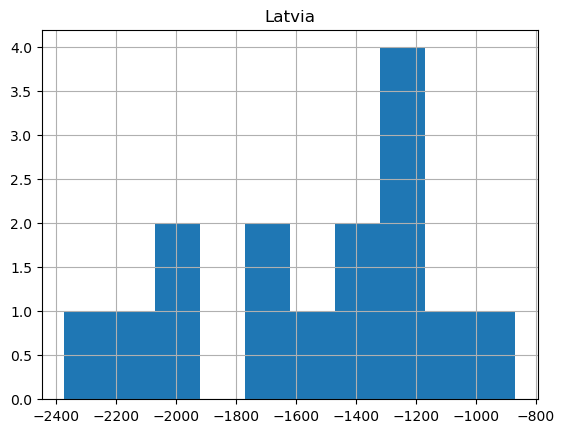

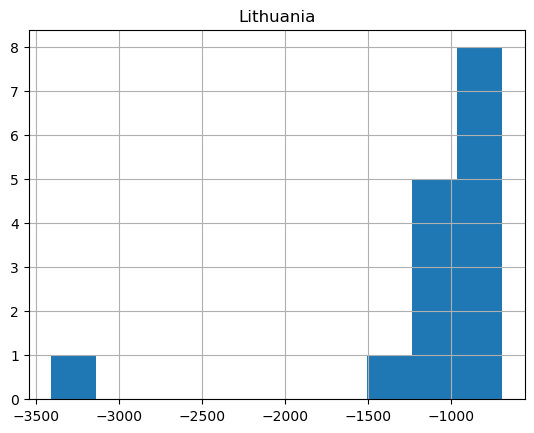

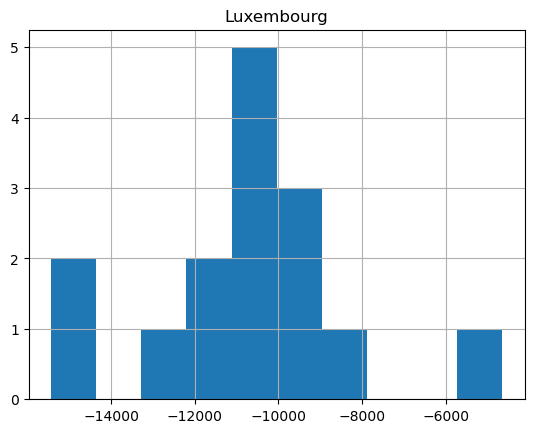

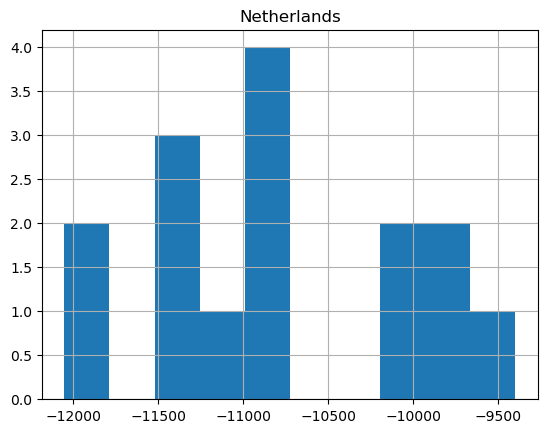

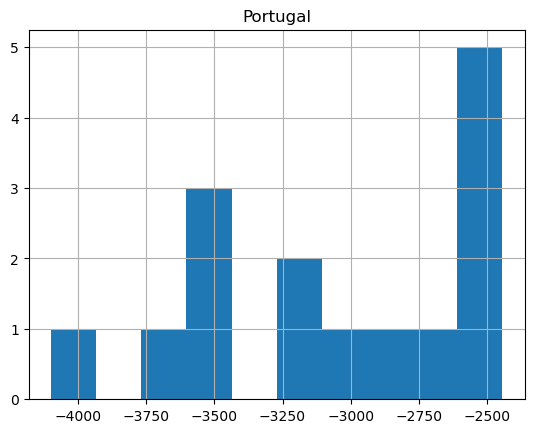

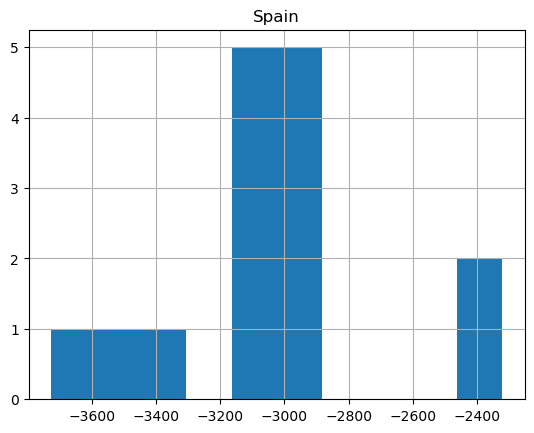

In [316]:
data_pivotedTaxsecu.hist(column='Austria')
data_pivotedTaxsecu.hist(column='Estonia')
data_pivotedTaxsecu.hist(column='Finland')
data_pivotedTaxsecu.hist(column='France')
data_pivotedTaxsecu.hist(column='Germany')
data_pivotedTaxsecu.hist(column='Ireland')
data_pivotedTaxsecu.hist(column='Italy')
data_pivotedTaxsecu.hist(column='Latvia')
data_pivotedTaxsecu.hist(column='Lithuania')
data_pivotedTaxsecu.hist(column='Luxembourg')
data_pivotedTaxsecu.hist(column='Netherlands')
data_pivotedTaxsecu.hist(column='Portugal')
data_pivotedTaxsecu.hist(column='Spain')

array([[<Axes: title={'center': 'Spain'}>]], dtype=object)

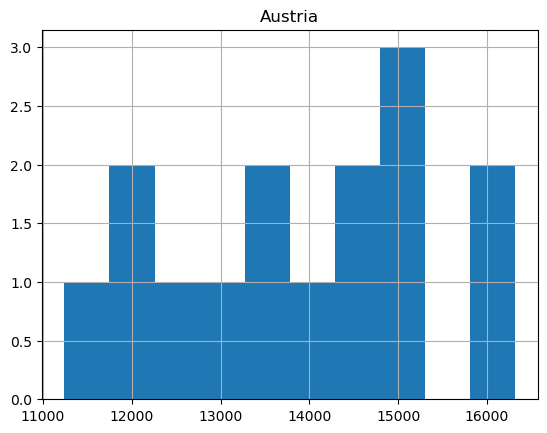

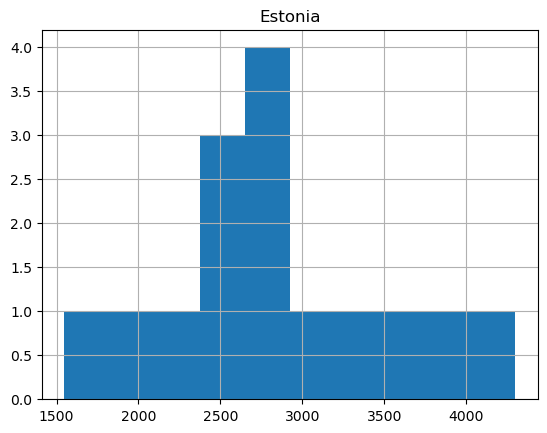

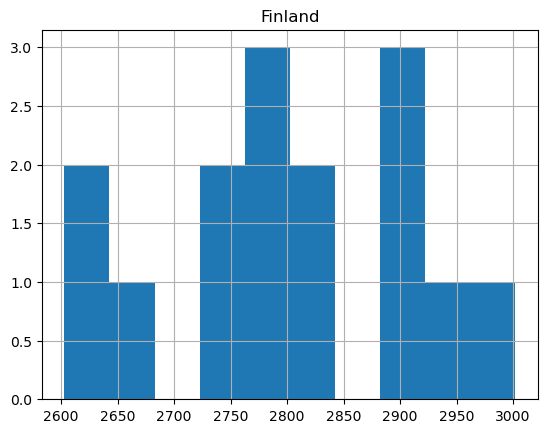

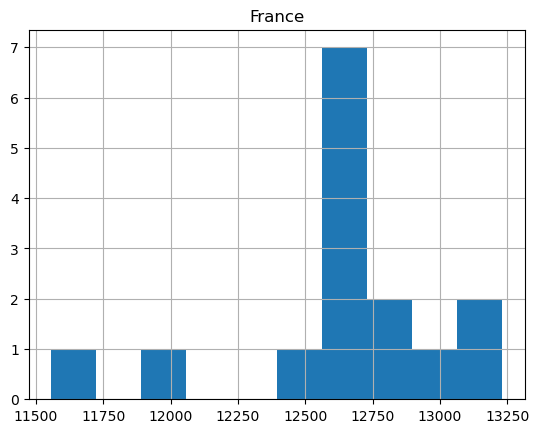

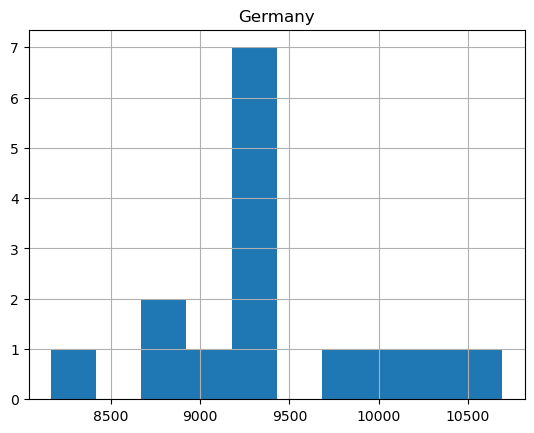

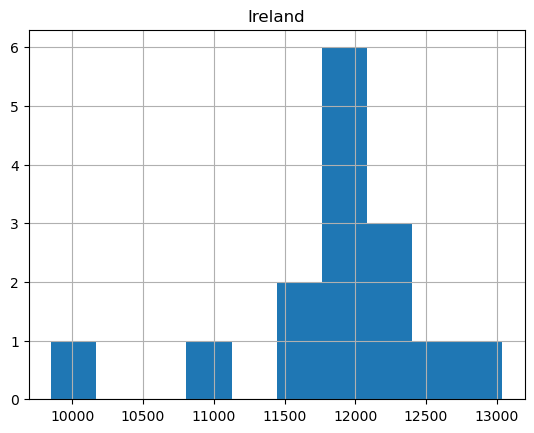

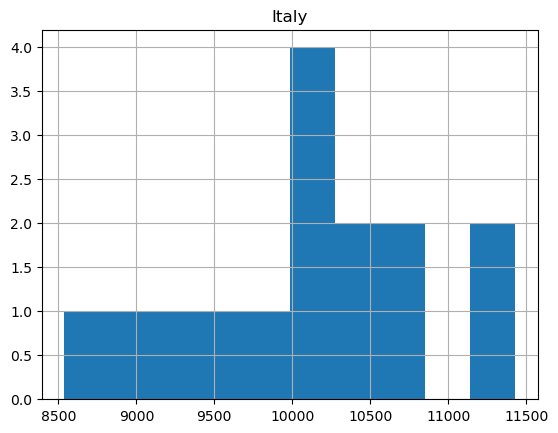

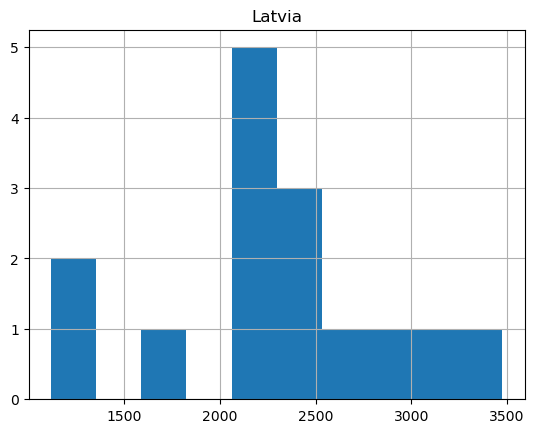

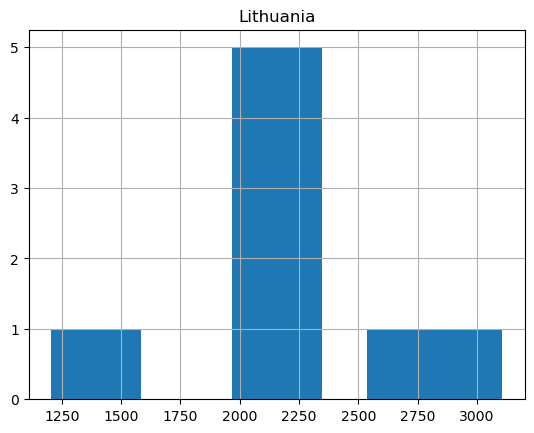

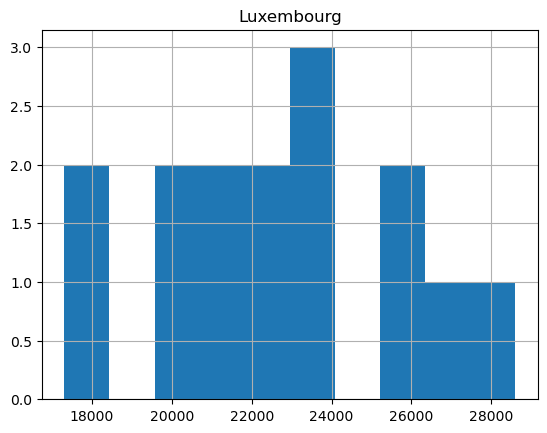

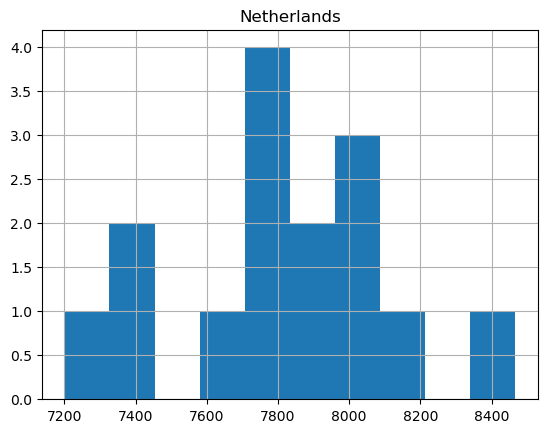

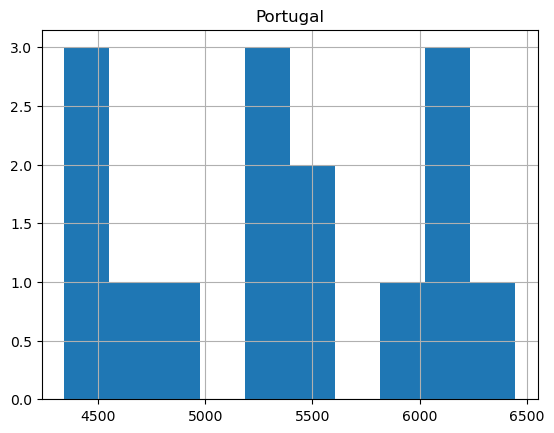

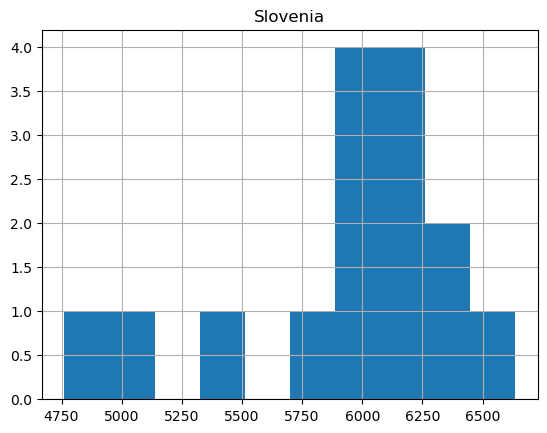

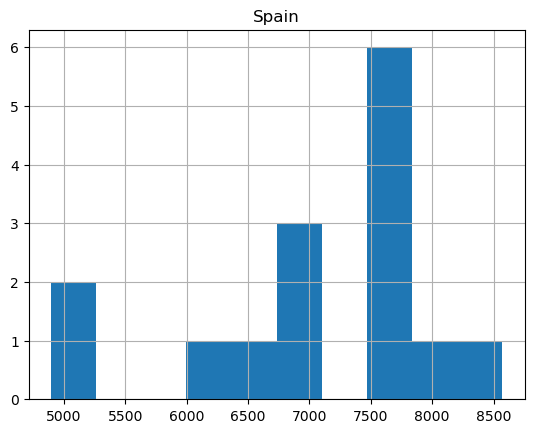

In [310]:
data_pivotedtransfer.hist(column='Austria')
data_pivotedtransfer.hist(column='Estonia')
data_pivotedtransfer.hist(column='Finland')
data_pivotedtransfer.hist(column='France')
data_pivotedtransfer.hist(column='Germany')
data_pivotedtransfer.hist(column='Ireland')
data_pivotedtransfer.hist(column='Italy')
data_pivotedtransfer.hist(column='Latvia')
data_pivotedtransfer.hist(column='Lithuania')
data_pivotedtransfer.hist(column='Luxembourg')
data_pivotedtransfer.hist(column='Netherlands')
data_pivotedtransfer.hist(column='Portugal')
data_pivotedtransfer.hist(column='Slovenia')
data_pivotedtransfer.hist(column='Spain')

array([[<Axes: title={'center': 'Spain'}>]], dtype=object)

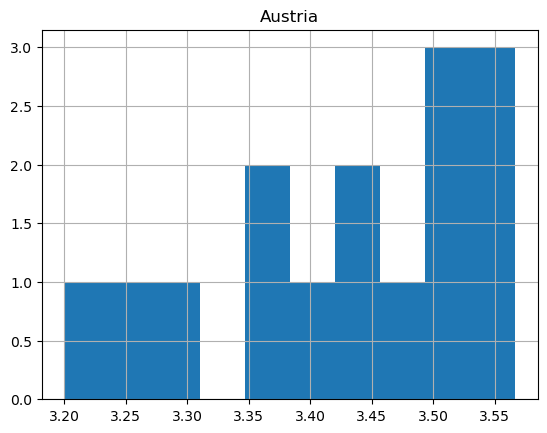

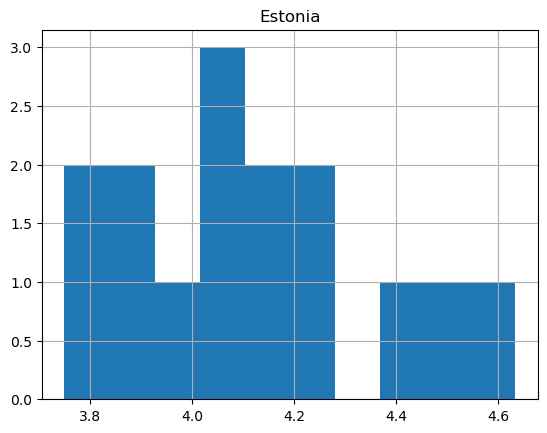

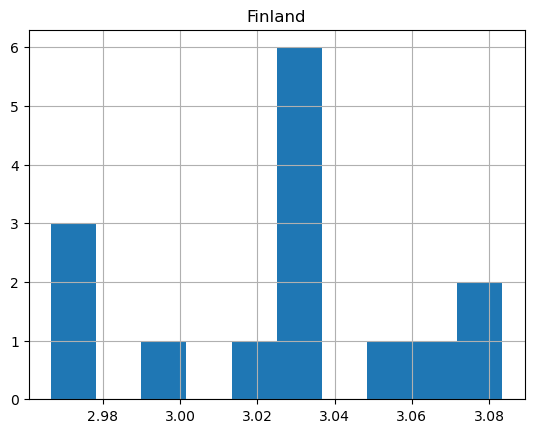

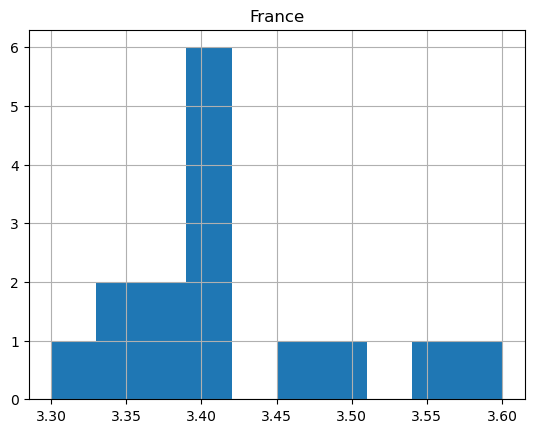

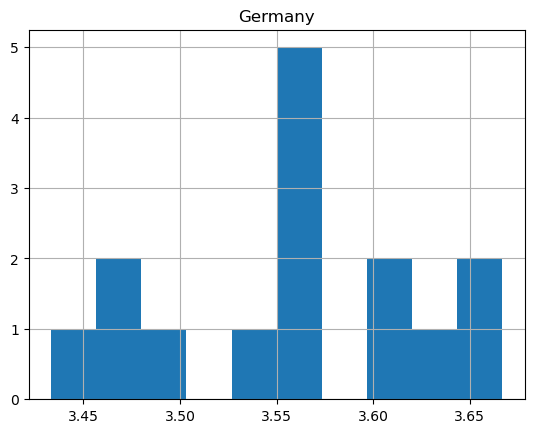

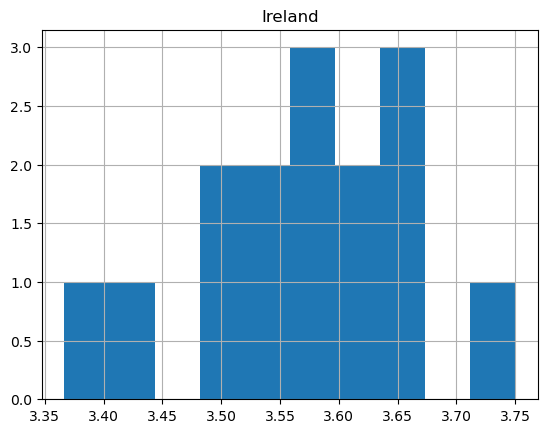

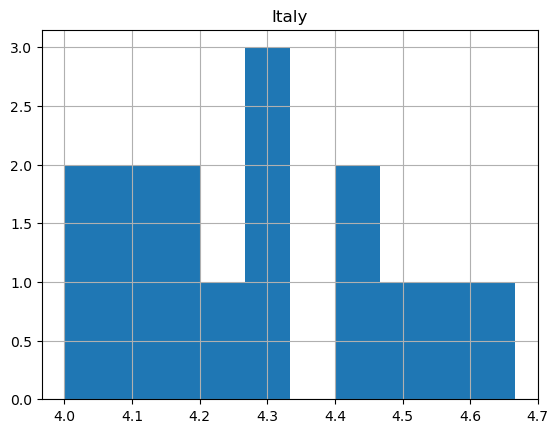

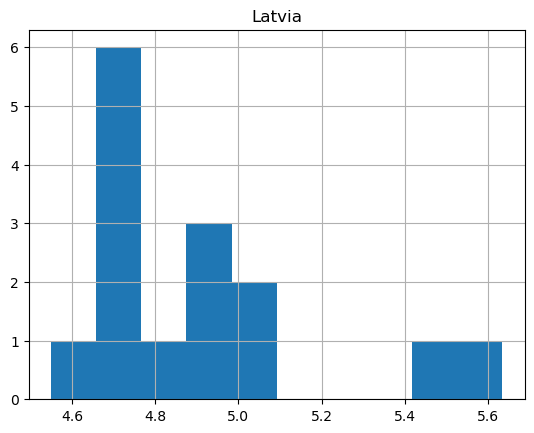

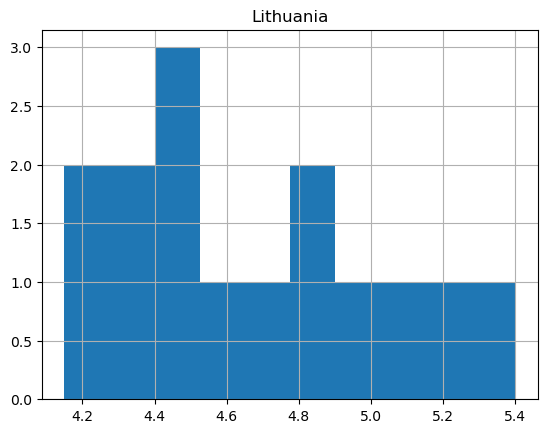

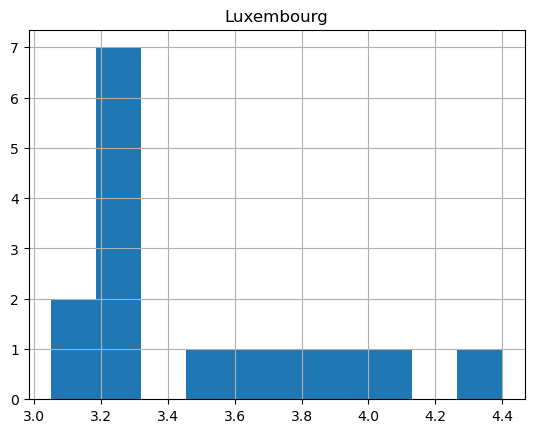

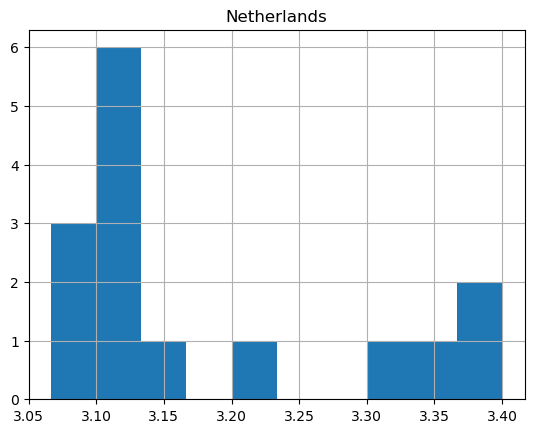

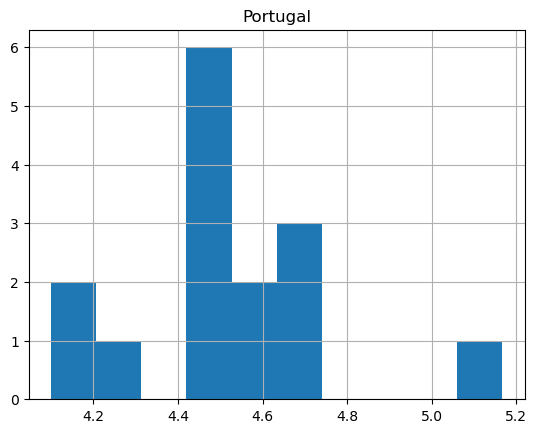

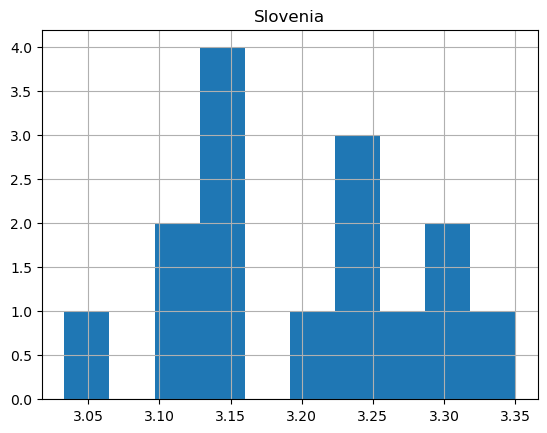

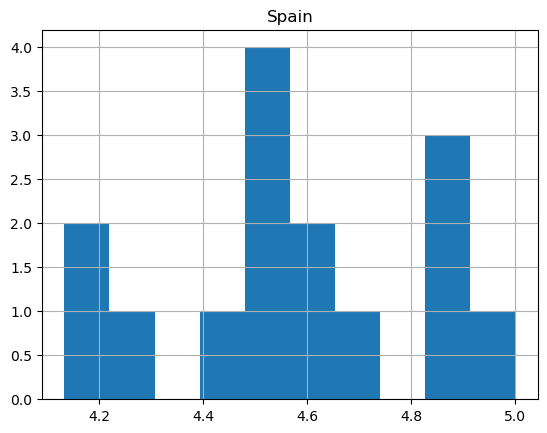

In [311]:
data_pivotedP90.hist(column='Austria')
data_pivotedP90.hist(column='Estonia')
data_pivotedP90.hist(column='Finland')
data_pivotedP90.hist(column='France')
data_pivotedP90.hist(column='Germany')
data_pivotedP90.hist(column='Ireland')
data_pivotedP90.hist(column='Italy')
data_pivotedP90.hist(column='Latvia')
data_pivotedP90.hist(column='Lithuania')
data_pivotedP90.hist(column='Luxembourg')
data_pivotedP90.hist(column='Netherlands')
data_pivotedP90.hist(column='Portugal')
data_pivotedP90.hist(column='Slovenia')
data_pivotedP90.hist(column='Spain')

array([[<Axes: title={'center': 'Spain'}>]], dtype=object)

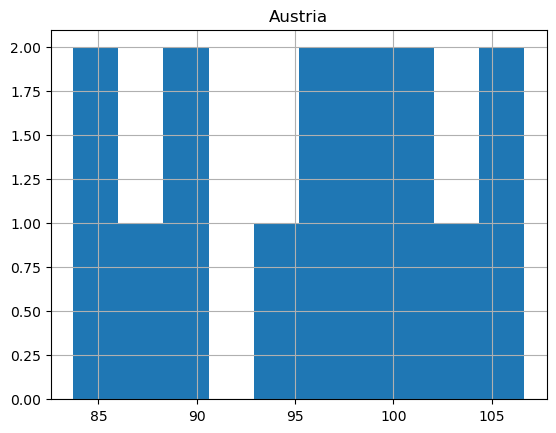

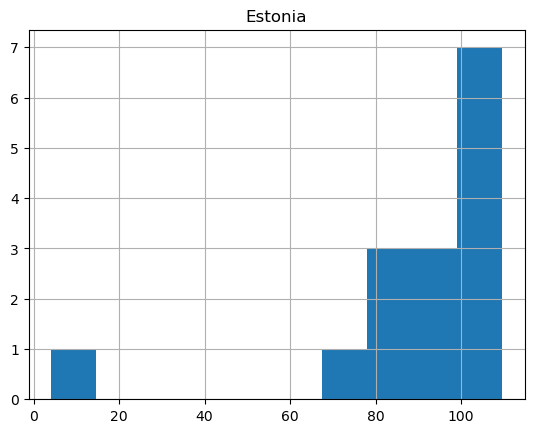

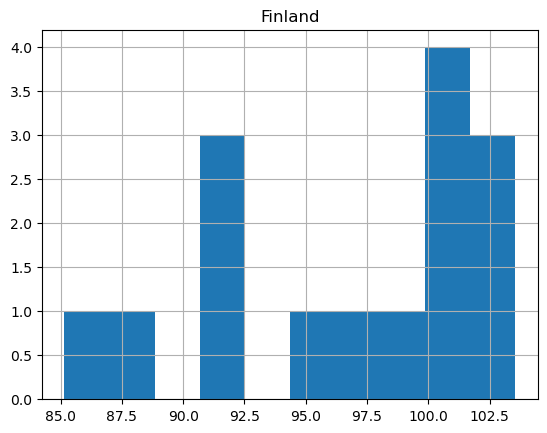

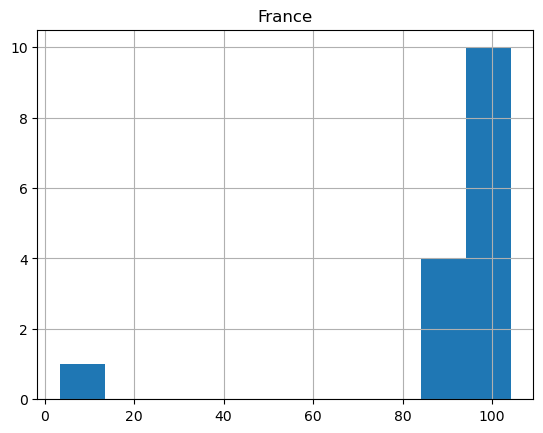

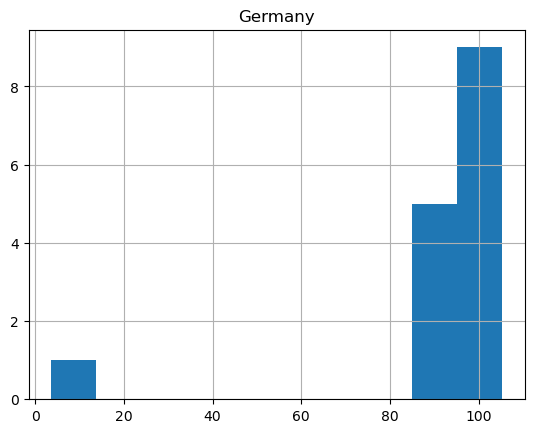

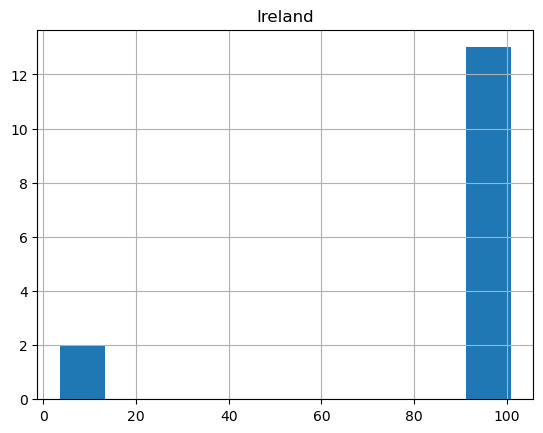

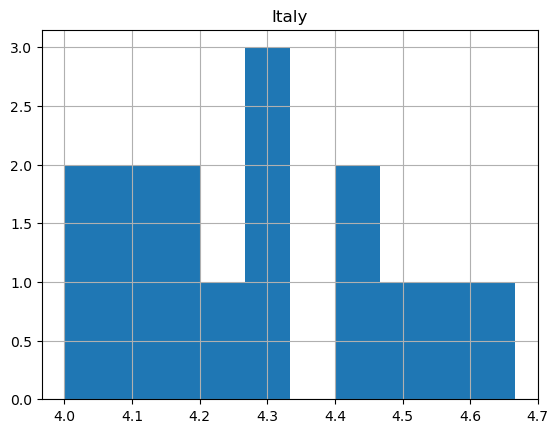

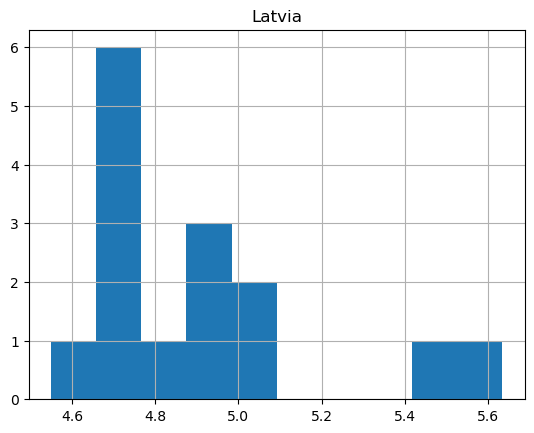

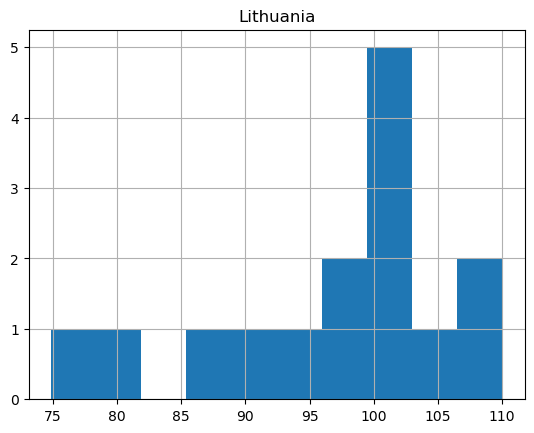

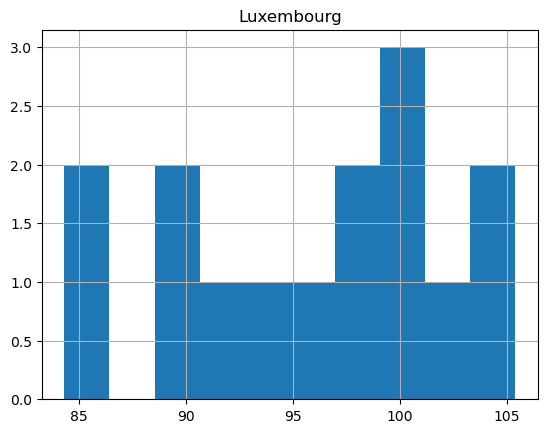

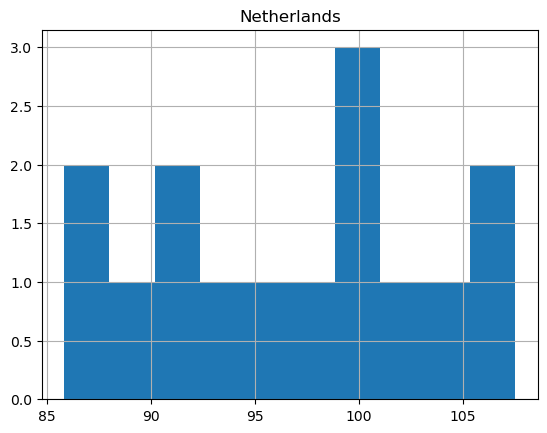

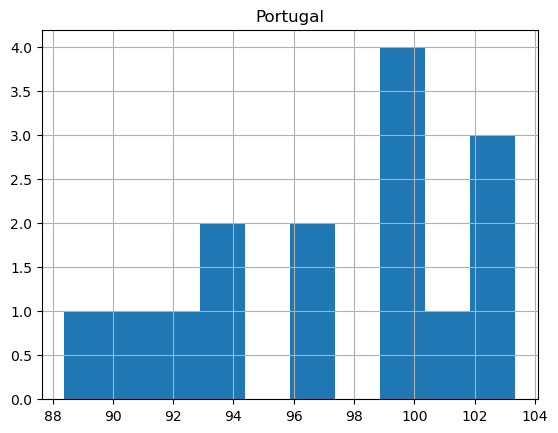

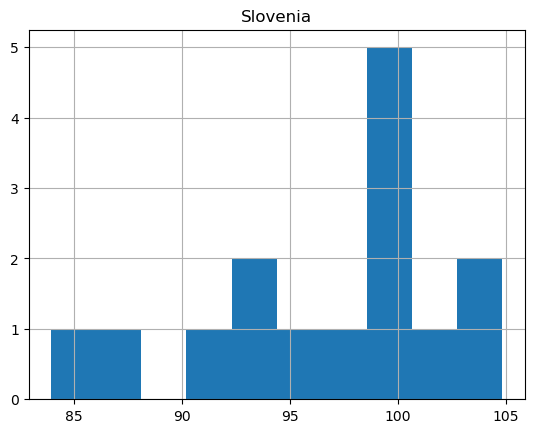

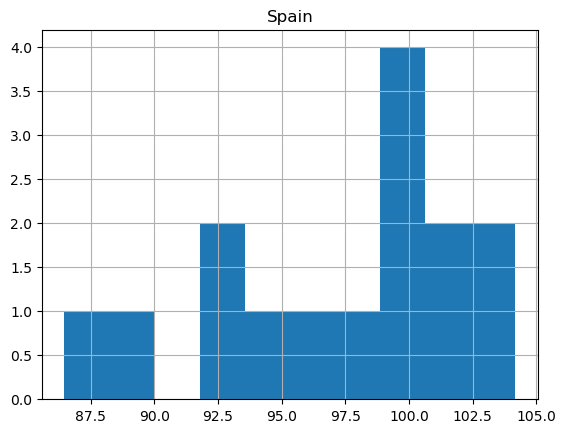

In [312]:
data_pivotedCPI.hist(column='Austria')
data_pivotedCPI.hist(column='Estonia')
data_pivotedCPI.hist(column='Finland')
data_pivotedCPI.hist(column='France')
data_pivotedCPI.hist(column='Germany')
data_pivotedCPI.hist(column='Ireland')
data_pivotedCPI.hist(column='Italy')
data_pivotedCPI.hist(column='Latvia')
data_pivotedCPI.hist(column='Lithuania')
data_pivotedCPI.hist(column='Luxembourg')
data_pivotedCPI.hist(column='Netherlands')
data_pivotedCPI.hist(column='Portugal')
data_pivotedCPI.hist(column='Slovenia')
data_pivotedCPI.hist(column='Spain')

array([[<Axes: title={'center': 'Spain'}>]], dtype=object)

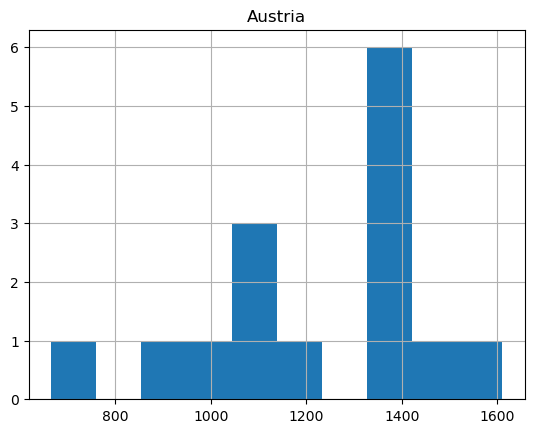

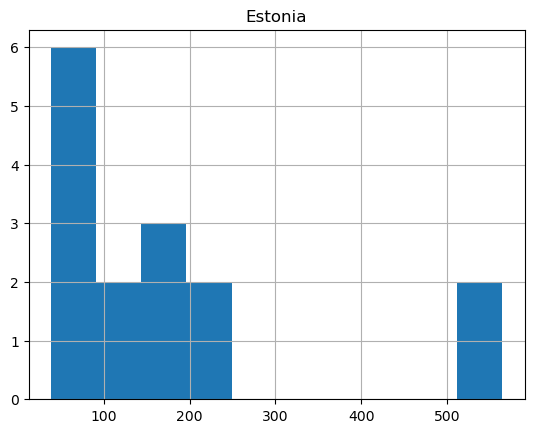

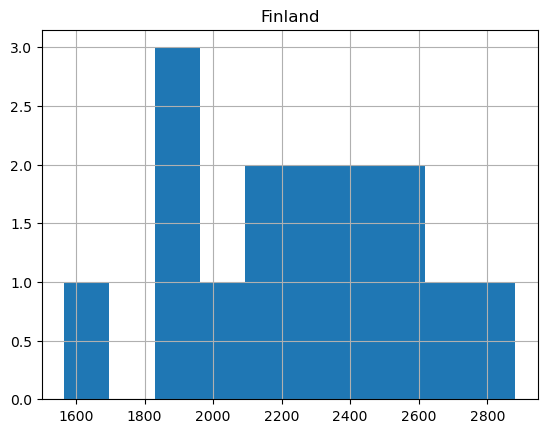

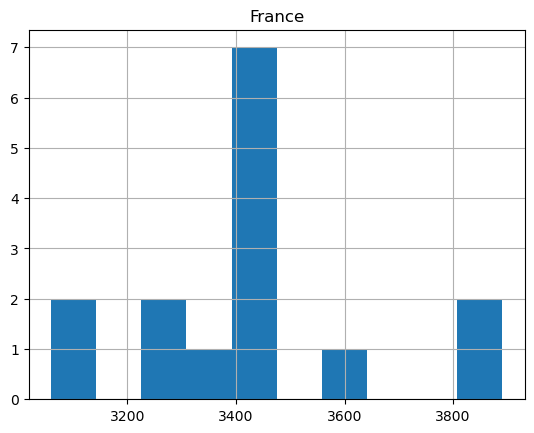

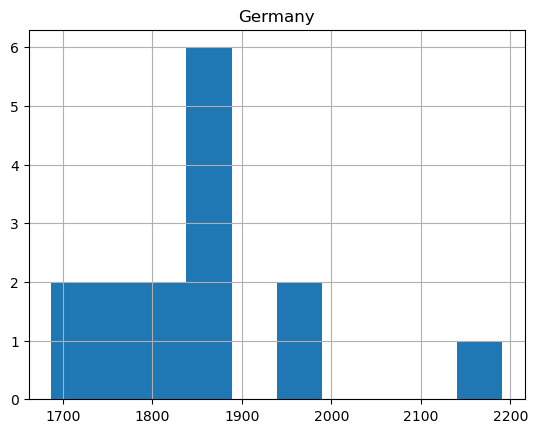

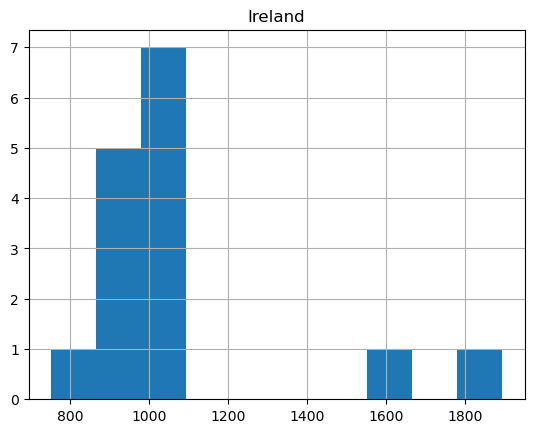

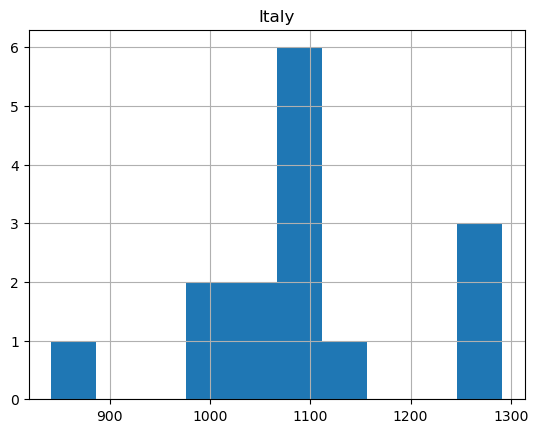

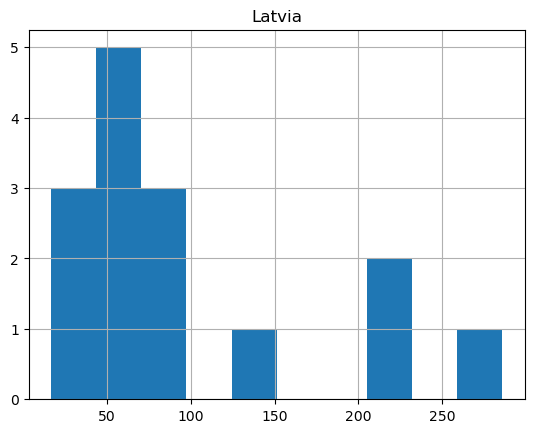

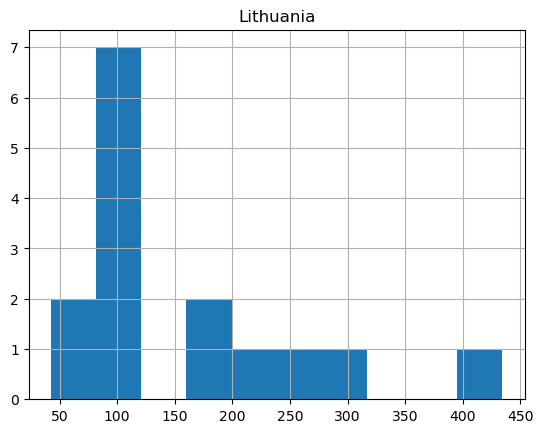

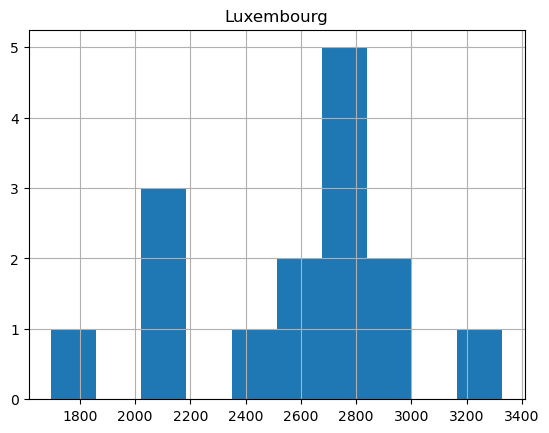

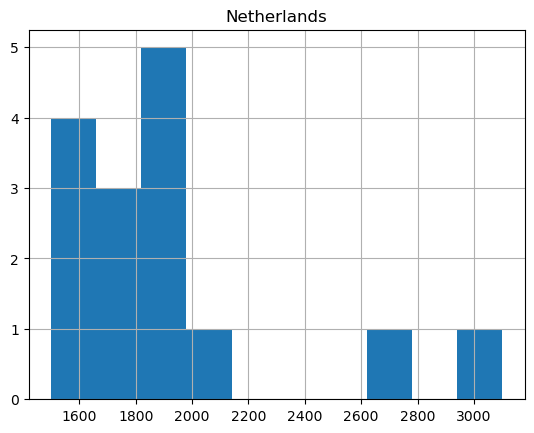

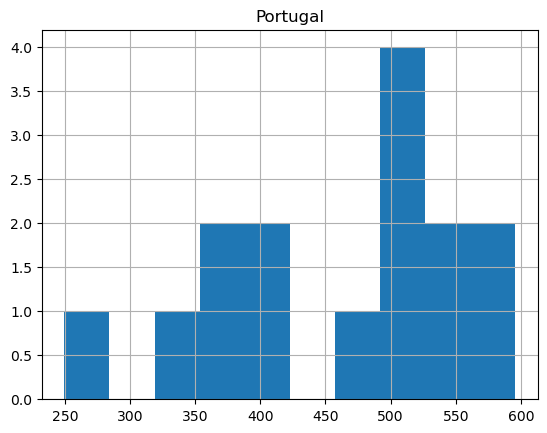

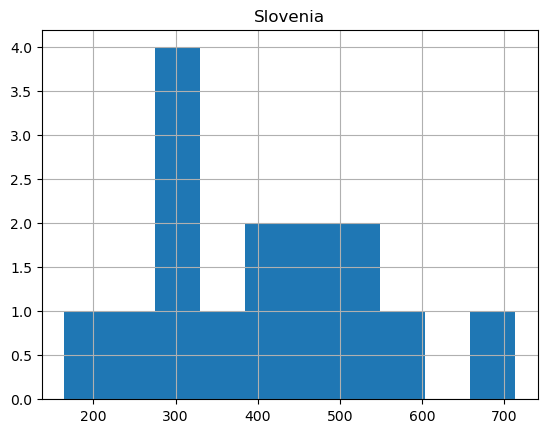

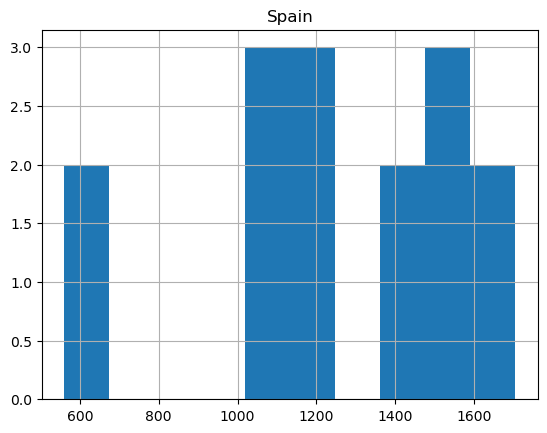

In [313]:
data_pivotedCI.hist(column='Austria')
data_pivotedCI.hist(column='Estonia')
data_pivotedCI.hist(column='Finland')
data_pivotedCI.hist(column='France')
data_pivotedCI.hist(column='Germany')
data_pivotedCI.hist(column='Ireland')
data_pivotedCI.hist(column='Italy')
data_pivotedCI.hist(column='Latvia')
data_pivotedCI.hist(column='Lithuania')
data_pivotedCI.hist(column='Luxembourg')
data_pivotedCI.hist(column='Netherlands')
data_pivotedCI.hist(column='Portugal')
data_pivotedCI.hist(column='Slovenia')
data_pivotedCI.hist(column='Spain')

array([[<Axes: title={'center': 'Spain'}>]], dtype=object)

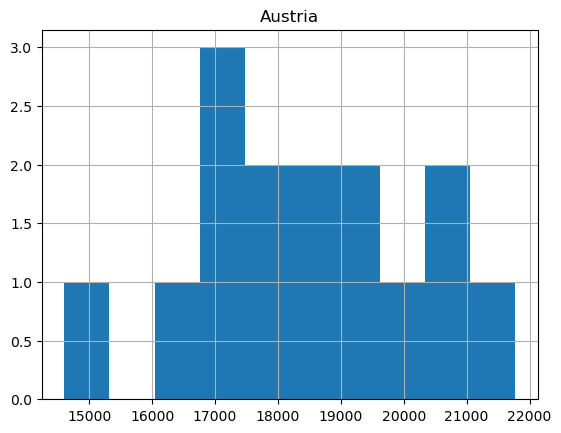

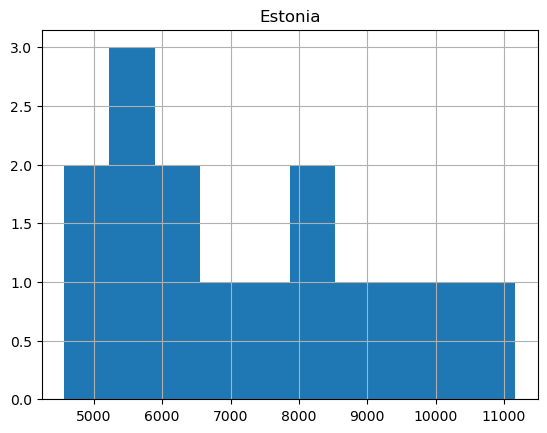

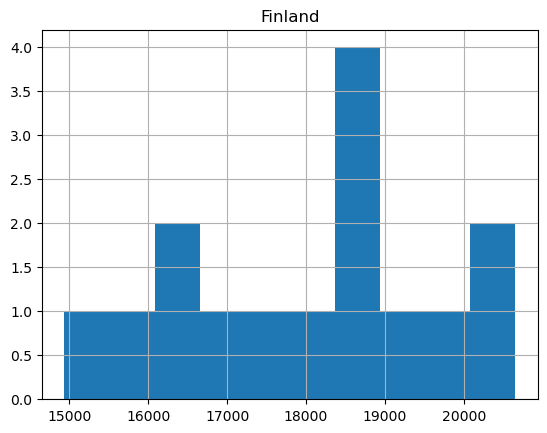

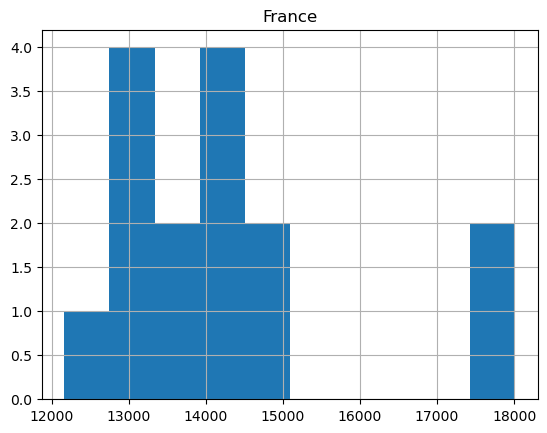

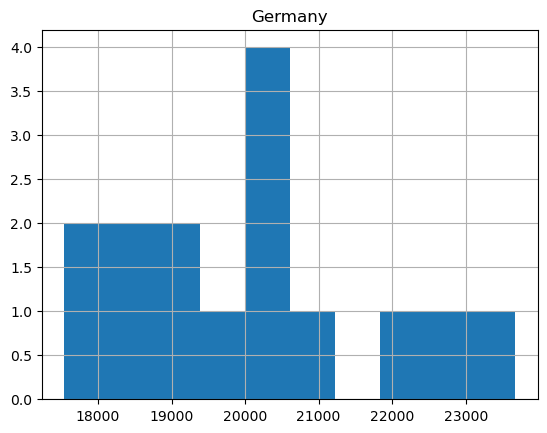

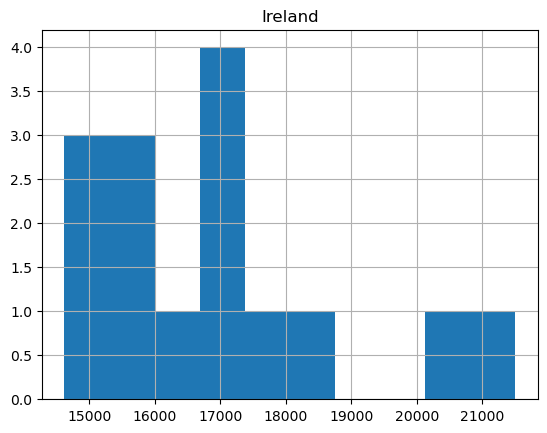

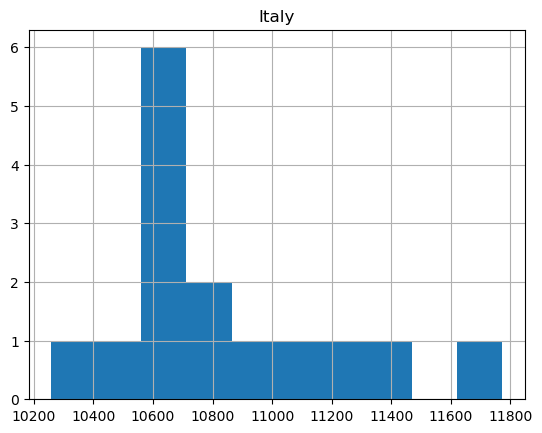

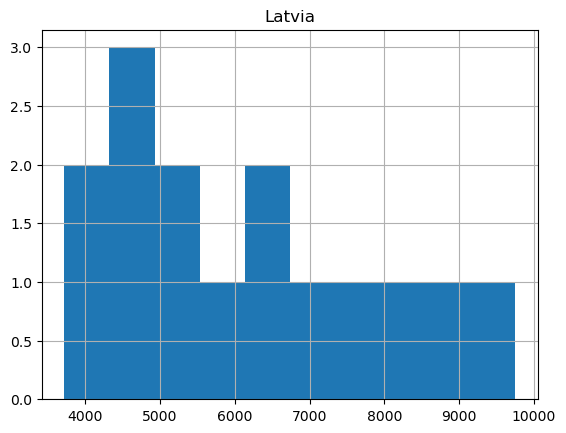

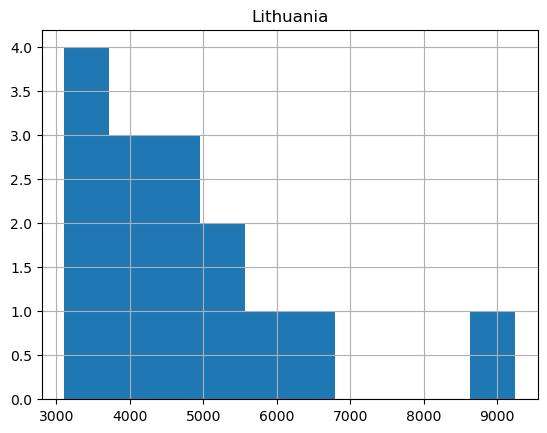

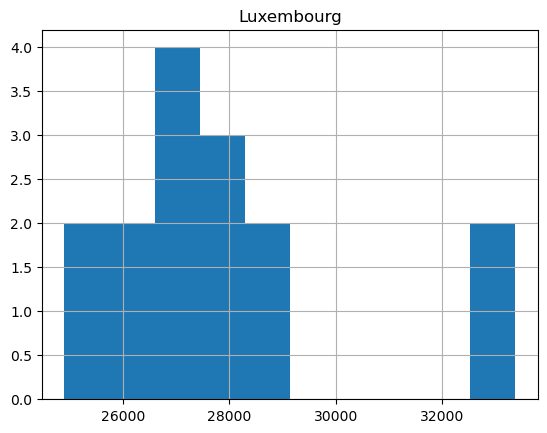

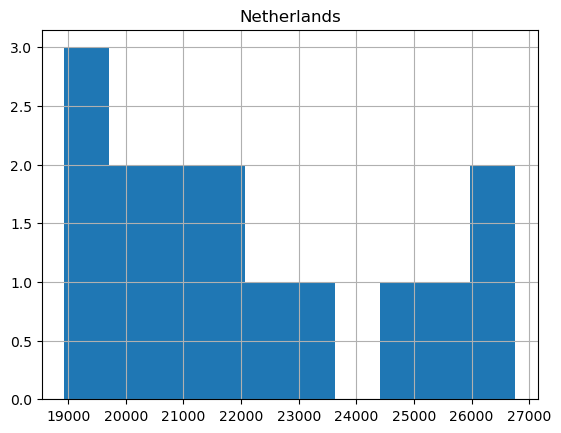

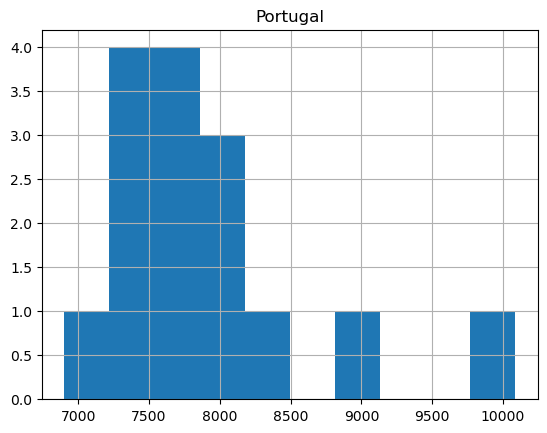

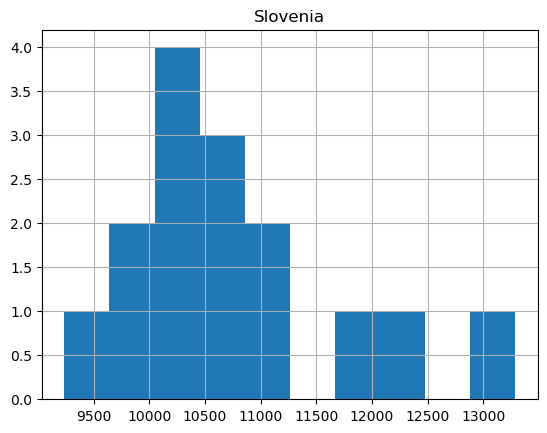

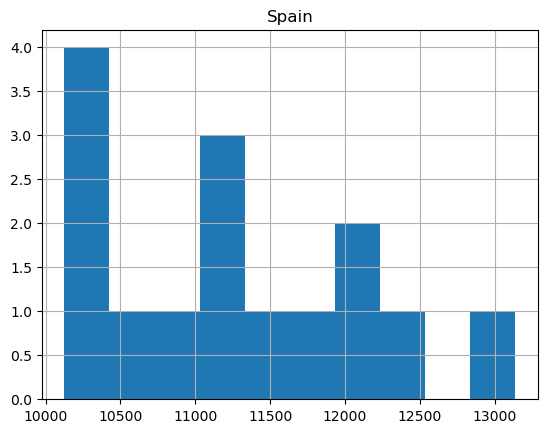

In [314]:
data_pivotedTE.hist(column='Austria')
data_pivotedTE.hist(column='Estonia')
data_pivotedTE.hist(column='Finland')
data_pivotedTE.hist(column='France')
data_pivotedTE.hist(column='Germany')
data_pivotedTE.hist(column='Ireland')
data_pivotedTE.hist(column='Italy')
data_pivotedTE.hist(column='Latvia')
data_pivotedTE.hist(column='Lithuania')
data_pivotedTE.hist(column='Luxembourg')
data_pivotedTE.hist(column='Netherlands')
data_pivotedTE.hist(column='Portugal')
data_pivotedTE.hist(column='Slovenia')
data_pivotedTE.hist(column='Spain')

array([[<Axes: title={'center': 'Spain'}>]], dtype=object)

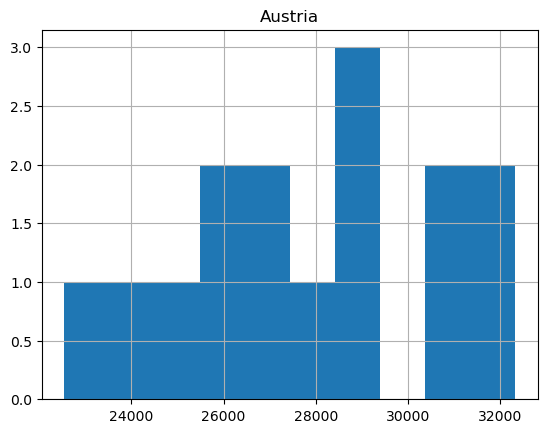

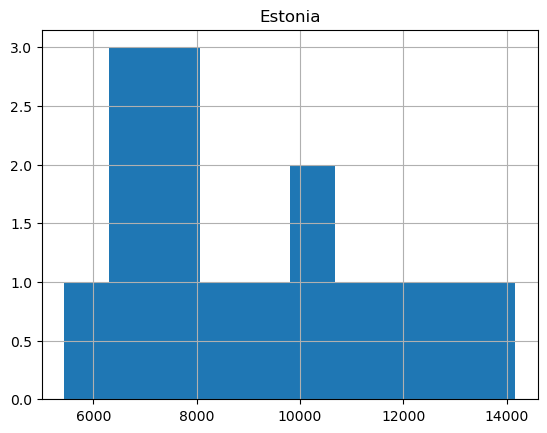

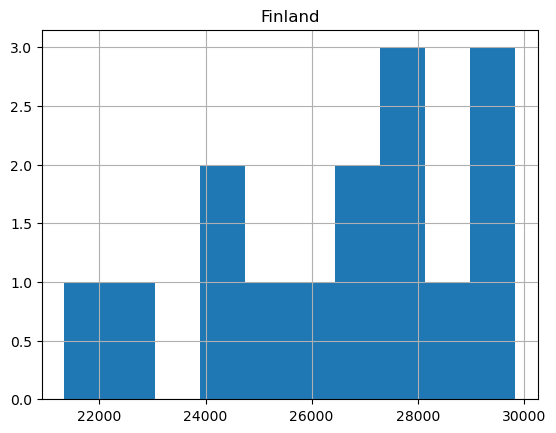

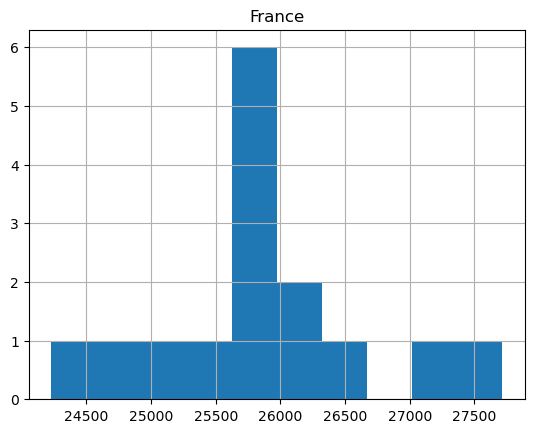

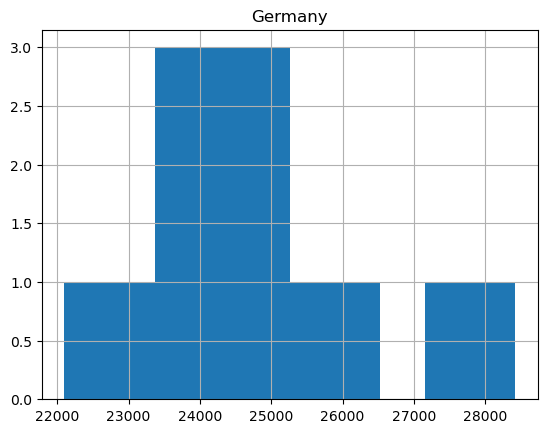

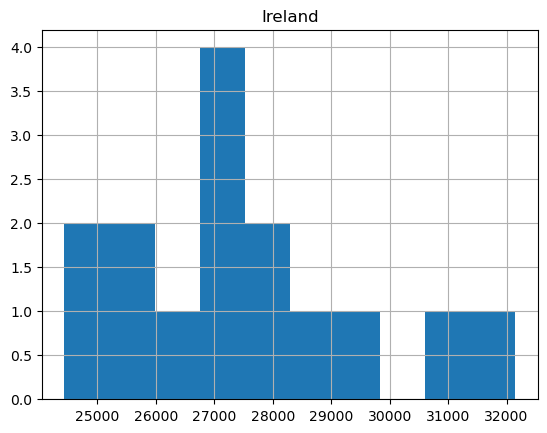

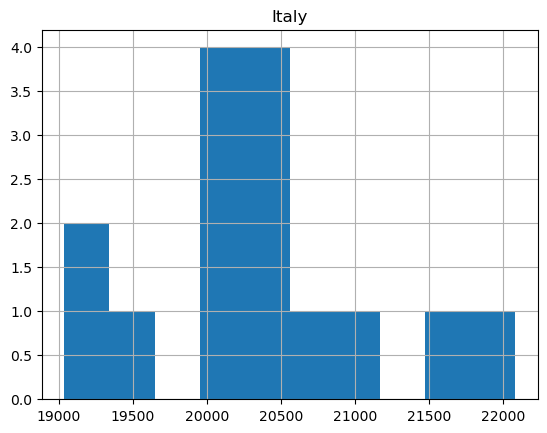

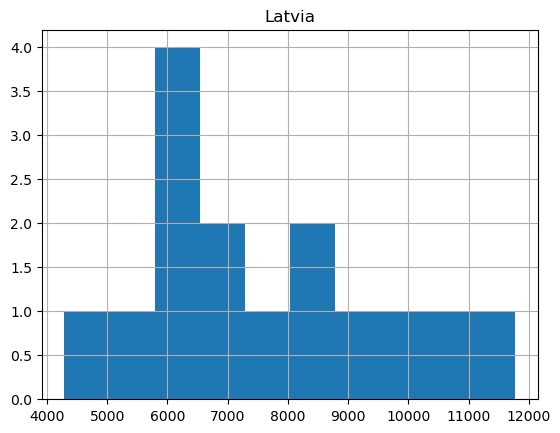

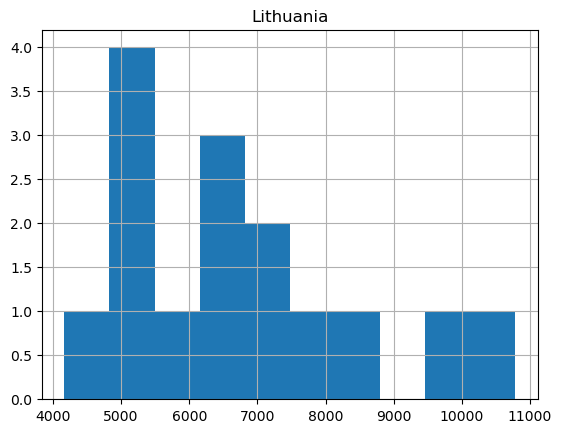

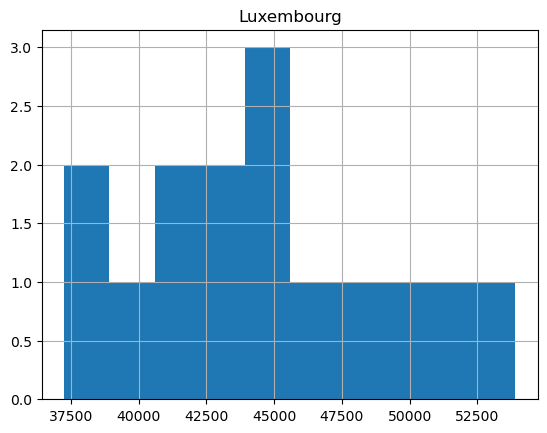

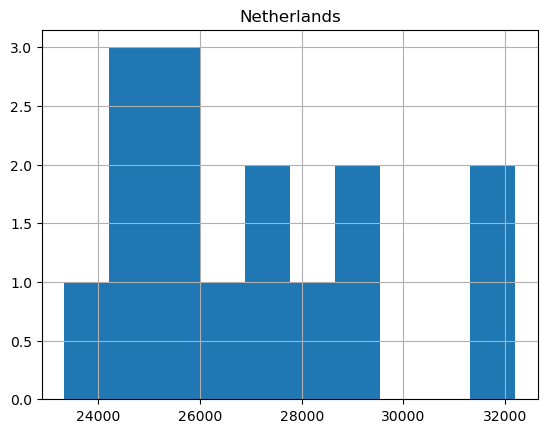

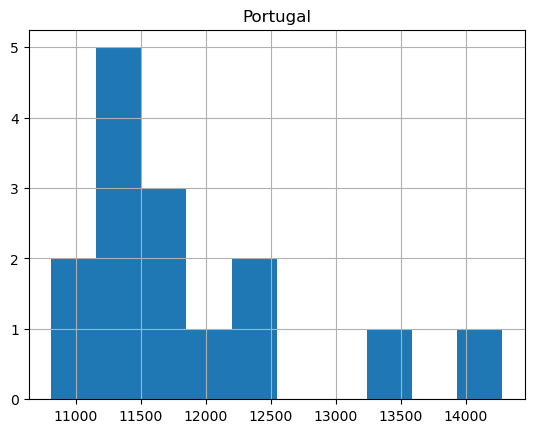

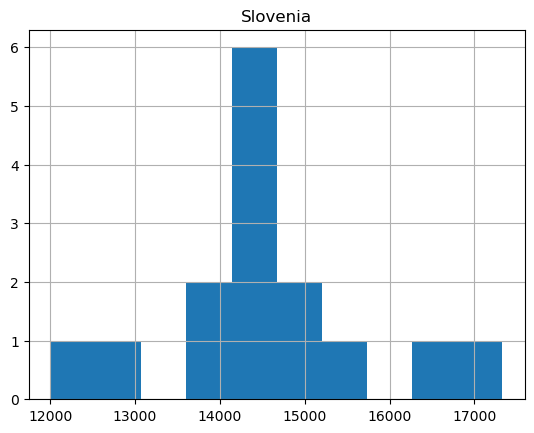

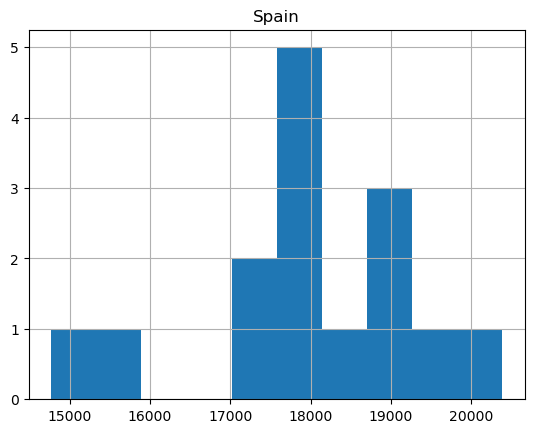

In [315]:
data_pivotedMDI.hist(column='Austria')
data_pivotedMDI.hist(column='Estonia')
data_pivotedMDI.hist(column='Finland')
data_pivotedMDI.hist(column='France')
data_pivotedMDI.hist(column='Germany')
data_pivotedMDI.hist(column='Ireland')
data_pivotedMDI.hist(column='Italy')
data_pivotedMDI.hist(column='Latvia')
data_pivotedMDI.hist(column='Lithuania')
data_pivotedMDI.hist(column='Luxembourg')
data_pivotedMDI.hist(column='Netherlands')
data_pivotedMDI.hist(column='Portugal')
data_pivotedMDI.hist(column='Slovenia')
data_pivotedMDI.hist(column='Spain')

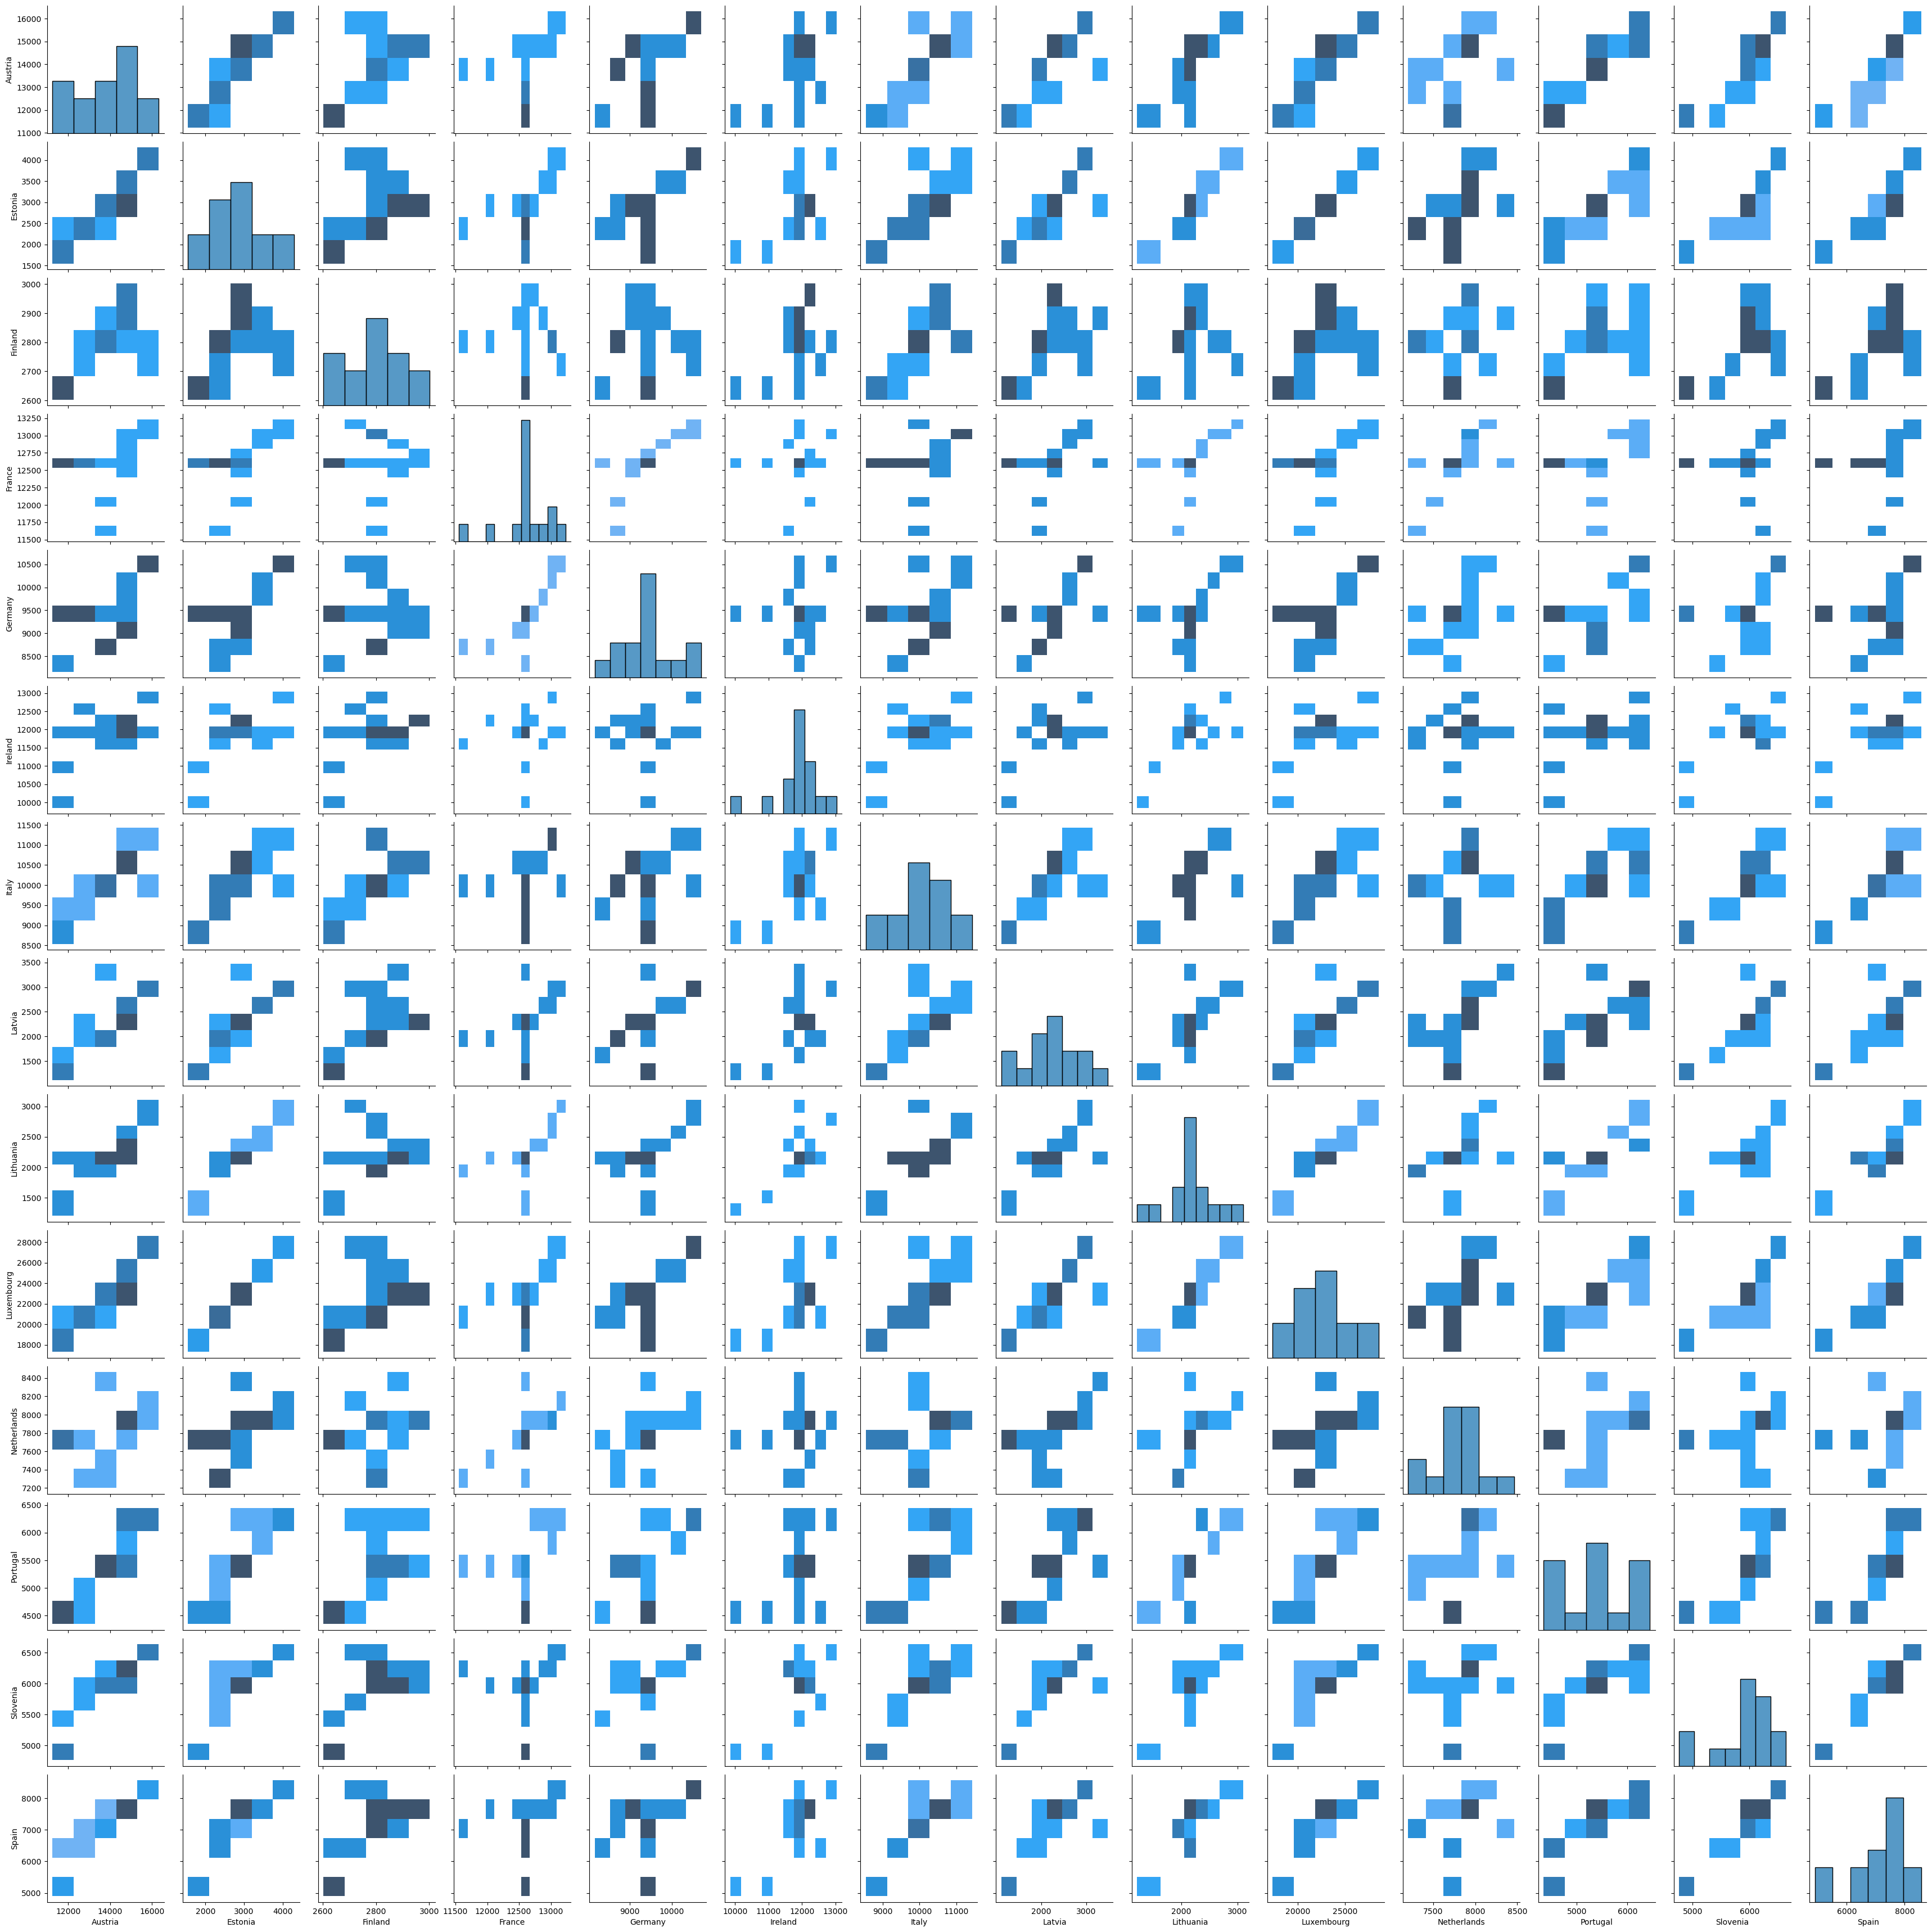

In [281]:
sns.pairplot(data_pivotedtransfer, kind="hist")

In [317]:
data_pivotedtransfer.to_csv('clean_data_pivotedtransfer.csv')
data_pivotedTaxsecu.to_csv('clean_data_pivotedtransfer.csv')
data_pivotedP90.to_csv('clean_data_pivotedtransfer.csv')
data_pivotedCPI.to_csv('clean_data_pivotedtransfer.csv')
data_pivotedCI.to_csv('clean_data_pivotedtransfer.csv')
data_pivotedTE.to_csv('clean_data_pivotedtransfer.csv')
data_pivotedMDI.to_csv('clean_data_pivotedtransfer.csv')

In [339]:
data_pivotedtransfer.to_csv('clean_data_pivotedtransfer.csv')

In [340]:
data_pivotedTaxsecu.to_csv('clean_data_pivotedTaxsecu.csv')

In [350]:
data_pivotedP90.to_csv('clean_data_pivotedP90.csv')

In [349]:
data_pivotedCPI.to_csv('clean_data_pivotedCPI.csv')

In [343]:
data_pivotedCI.to_csv('clean_data_pivotedCI.csv')

In [344]:
data_pivotedTE.to_csv('clean_data_pivotedTE.csv')

In [345]:
data_pivotedMDI.to_csv('clean_data_pivotedMDI.csv')

In [346]:
clean_data_pivotedtransfer= pd.read_csv('clean_data_pivotedtransfer.csv')
transfer='transfer'
clean_data_pivotedtransfer["measure"] = transfer
clean_data_pivotedtransfer

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain,measure
0,2006,11820.333333,1548.000000,2638.666667,12606.851852,9426.433333,9851.333333,8538.000000,1119.000000,1205.333333,17306.666667,7819.696970,4342.333333,4762.000000,4896.000000,transfer
1,2007,11240.333333,1828.000000,2603.000000,12606.851852,9426.433333,10867.333333,9060.000000,1301.000000,1562.666667,17707.666667,7819.696970,4417.666667,5028.333333,5196.666667,transfer
2,2008,12050.000000,2254.000000,2653.333333,12606.851852,8163.000000,11977.000000,9304.333333,1686.333333,2055.666667,19664.666667,7819.696970,4460.000000,5372.666667,6188.666667,transfer
3,2009,12730.666667,2516.666667,2736.666667,12606.851852,9426.433333,12564.666667,9681.666667,2119.333333,2100.000000,20379.666667,7819.696970,4735.666667,5719.000000,6683.000000,transfer
4,2010,13253.333333,2478.333333,2794.666667,12606.851852,9426.433333,12053.000000,9834.333333,2218.333333,2017.666667,20947.000000,7200.000000,4850.333333,5934.666667,6830.000000,transfer
5,2011,13408.333333,2546.000000,2798.000000,11556.666667,8785.666667,11730.333333,10005.000000,2105.333333,2020.000000,21579.000000,7350.000000,5276.666667,6166.666667,7062.333333,transfer
6,2012,13742.333333,2707.000000,2788.666667,12045.000000,8849.000000,12275.000000,10177.666667,2114.000000,2206.333333,22931.666667,7450.000000,5252.666667,6017.666667,7481.333333,transfer
7,2013,14615.000000,2869.666667,2914.666667,12403.333333,9057.000000,11843.000000,10300.333333,2202.666667,2130.333333,23721.666667,7650.000000,5539.333333,6095.000000,7668.333333,transfer
8,2014,14785.666667,2834.000000,2926.666667,12616.666667,9224.000000,12140.666667,10466.000000,2301.333333,2169.333333,23916.000000,7833.333333,5520.333333,6137.333333,7545.333333,transfer
9,2015,15004.000000,3170.000000,3002.000000,12743.333333,9304.000000,12273.666667,10643.000000,2404.333333,2285.666667,23732.333333,7933.333333,6056.666667,6067.666667,7584.666667,transfer


In [347]:
clean_data_pivotedTaxsecu= pd.read_csv('clean_data_pivotedTaxsecu.csv')
Taxsecu='Taxsecu'
clean_data_pivotedTaxsecu["measure"] = Taxsecu
clean_data_pivotedTaxsecu

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain,measure
0,2006,-6965.333333,-903.166667,-6408.000000,-4306.541667,-7391.461111,-4368.000000,-5357.666667,-867.500000,-832.500000,-9110.333333,-11197.000000,-2590.500000,-3069.500000,-2321.666667,Taxsecu
1,2007,-7652.000000,-1097.500000,-6692.000000,-4306.541667,-7391.461111,-4406.166667,-5917.333333,-1195.833333,-844.833333,-9330.000000,-11473.000000,-2578.166667,-3295.500000,-2363.333333,Taxsecu
2,2008,-8151.666667,-1187.166667,-6893.833333,-3449.333333,-6863.000000,-4232.666667,-5728.555556,-1431.666667,-964.000000,-10159.666667,-12051.000000,-2452.000000,-3535.666667,-2956.666667,Taxsecu
3,2009,-8242.666667,-1054.166667,-6599.500000,-3747.500000,-9060.500000,-4560.666667,-6090.666667,-1178.166667,-839.666667,-10045.166667,-11997.000000,-2460.333333,-3397.166667,-2941.333333,Taxsecu
4,2010,-8079.333333,-1103.166667,-6809.500000,-3911.000000,-9318.500000,-4740.166667,-6238.666667,-1096.500000,-693.666667,-10127.333333,-10760.000000,-2621.333333,-3417.333333,-3038.666667,Taxsecu
5,2011,-8415.000000,-1265.166667,-7129.333333,-4099.000000,-7446.200000,-4910.000000,-6316.333333,-1236.166667,-733.333333,-11111.666667,-10050.000000,-2884.333333,-3395.000000,-2996.666667,Taxsecu
6,2012,-8666.333333,-1343.833333,-7422.666667,-4271.666667,-6098.000000,-5504.500000,-6554.500000,-1308.833333,-801.166667,-11769.166667,-10987.500000,-2444.666667,-3296.500000,-2980.666667,Taxsecu
7,2013,-9248.000000,-1463.000000,-7328.000000,-4426.666667,-6190.333333,-5898.500000,-6492.000000,-1378.333333,-910.333333,-12167.833333,-9400.000000,-3140.666667,-3234.333333,-3013.666667,Taxsecu
8,2014,-9230.333333,-1477.333333,-7649.333333,-4500.000000,-6355.000000,-5740.666667,-6508.333333,-1509.000000,-967.666667,-12611.000000,-9716.666667,-3238.333333,-3475.666667,-3122.666667,Taxsecu
9,2015,-9800.666667,-1615.000000,-7767.333333,-4433.333333,-6719.000000,-6061.333333,-6574.333333,-1626.333333,-1061.333333,-8344.666667,-9866.666667,-3575.666667,-3476.000000,-3045.333333,Taxsecu


In [348]:
clean_data_pivotedP90= pd.read_csv('clean_data_pivotedP90.csv')
P90='P90'
clean_data_pivotedP90["measure"] = P90
clean_data_pivotedP90

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain,measure
0,2006,3.200000,4.016667,2.966667,3.417222,3.558611,3.650000,4.133333,4.966667,4.266667,3.166667,3.300000,5.166667,3.133333,4.166667,P90
1,2007,3.566667,3.916667,3.033333,3.417222,3.558611,3.516667,4.000000,5.633333,4.350000,3.050000,3.350000,4.733333,3.150000,4.133333,P90
2,2008,3.366667,3.783333,3.050000,3.400000,3.480000,3.483333,4.088889,5.466667,4.516667,3.250000,3.400000,4.583333,3.116667,4.300000,P90
3,2009,3.566667,3.750000,3.000000,3.500000,3.650000,3.583333,4.000000,4.833333,4.900000,3.266667,3.400000,4.516667,3.233333,4.466667,P90
4,2010,3.500000,3.916667,3.083333,3.600000,3.600000,3.533333,4.166667,4.666667,4.350000,3.233333,3.200000,4.450000,3.250000,4.500000,P90
5,2011,3.533333,4.050000,3.083333,3.540000,3.540000,3.750000,4.166667,4.550000,4.150000,3.283333,3.066667,4.466667,3.233333,4.666667,P90
6,2012,3.400000,4.083333,3.016667,3.466667,3.433333,3.650000,4.216667,4.716667,4.416667,3.300000,3.162500,4.466667,3.316667,4.500000,P90
7,2013,3.366667,4.633333,3.066667,3.400000,3.466667,3.616667,4.300000,4.683333,4.450000,3.316667,3.083333,4.716667,3.350000,4.900000,P90
8,2014,3.300000,4.466667,3.033333,3.333333,3.566667,3.600000,4.433333,4.666667,4.866667,3.233333,3.116667,4.533333,3.300000,5.000000,P90
9,2015,3.266667,4.400000,3.033333,3.400000,3.600000,3.533333,4.666667,4.700000,5.100000,3.800000,3.100000,4.666667,3.266667,4.833333,P90


In [351]:
clean_data_pivotedCPI= pd.read_csv('clean_data_pivotedCPI.csv')
CPI='CPI'
clean_data_pivotedCPI["measure"] =CPI
clean_data_pivotedCPI

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain,measure
0,2006,83.720980,74.107460,85.15321,89.325840,87.609020,92.441230,4.133333,4.966667,74.853780,84.325840,85.81917,88.391530,83.960000,86.461170,CPI
1,2007,85.536510,78.999540,87.29113,90.655000,89.622570,96.968190,4.000000,5.633333,79.148280,86.275830,87.20417,90.560630,87.030830,88.870670,CPI
2,2008,88.287320,87.185750,90.84034,93.205000,91.978200,100.905400,4.088889,5.466667,87.795920,89.210830,89.37250,92.904800,91.945830,92.492450,CPI
3,2009,88.734330,87.117390,90.84034,93.286670,92.265850,96.386740,4.000000,4.833333,91.705510,89.539170,90.43584,92.128560,92.717500,92.226250,CPI
4,2010,90.343550,89.706560,91.91602,94.715000,93.284290,95.497960,4.166667,4.666667,92.915310,91.575000,91.58916,93.420720,94.387500,93.886200,CPI
5,2011,93.312770,94.175650,95.05661,96.715000,95.220100,97.940030,4.166667,4.550000,96.752970,94.698330,93.73333,96.833390,96.089160,96.886890,CPI
6,2012,95.632230,97.879960,97.72611,98.605000,97.132580,99.601300,4.216667,4.716667,99.742610,97.220000,96.03500,99.518910,98.585000,99.256870,CPI
7,2013,97.545020,100.601600,99.17079,99.456670,98.594160,100.108000,4.300000,4.683333,100.787400,98.905830,98.44250,99.792010,100.329200,100.655000,CPI
8,2014,99.111400,100.494800,100.20340,99.961670,99.488210,100.290700,4.433333,4.666667,100.892000,99.527500,99.40334,99.514430,100.529200,100.502900,CPI
9,2015,100.000000,100.000000,99.99500,99.999170,100.000000,100.000000,4.666667,4.700000,99.999990,100.000000,100.00000,100.000000,100.000800,100.000000,CPI


In [352]:
clean_data_pivotedCI= pd.read_csv('clean_data_pivotedCI.csv')
CI='CI'
clean_data_pivotedCI["measure"] = CI
clean_data_pivotedCI

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain,measure
0,2006,665.333333,38.333333,1566.000000,3416.111111,1849.633333,1894.333333,841.333333,22.000000,42.666667,2358.666667,1909.090909,249.666667,164.666667,560.333333,CI
1,2007,1075.333333,59.666667,1934.000000,3416.111111,1849.633333,1624.666667,1044.333333,52.000000,116.666667,2515.666667,1909.090909,338.333333,235.333333,585.000000,CI
2,2008,915.333333,90.333333,1999.666667,3416.111111,1765.666667,1005.666667,1017.333333,74.333333,224.000000,1696.666667,1909.090909,355.333333,340.666667,1699.333333,CI
3,2009,1016.333333,73.666667,1881.000000,3416.111111,1849.633333,907.666667,981.666667,39.666667,104.333333,2112.666667,1909.090909,402.000000,289.000000,1705.333333,CI
4,2010,1114.666667,50.333333,1920.000000,3416.111111,1849.633333,752.333333,1099.333333,16.666667,98.333333,2101.333333,1500.000000,381.000000,297.333333,1498.666667,CI
5,2011,1417.000000,47.666667,2198.333333,3890.000000,1818.666667,960.000000,1288.333333,48.666667,80.333333,2861.333333,1583.333333,413.000000,327.000000,1501.333333,CI
6,2012,1083.000000,110.333333,2258.666667,3841.666667,1687.000000,931.666667,1291.333333,49.333333,85.000000,3327.666667,1733.333333,512.333333,323.333333,1487.000000,CI
7,2013,1353.666667,127.000000,2215.666667,3593.333333,1743.000000,1071.666667,1276.666667,59.666667,110.333333,2794.000000,1533.333333,516.666667,520.333333,1384.666667,CI
8,2014,1353.000000,179.666667,2317.333333,3396.666667,1727.666667,938.000000,1088.000000,68.000000,117.666667,2693.000000,2116.666667,563.333333,510.666667,1364.000000,CI
9,2015,1459.000000,163.333333,2361.666667,3316.666667,1805.666667,945.000000,1102.333333,95.333333,119.666667,2811.333333,1500.000000,516.000000,552.333333,1178.666667,CI


In [354]:
clean_data_pivotedTE= pd.read_csv('clean_data_pivotedTE.csv')
TE='TE'
clean_data_pivotedTE["measure"] = TE
clean_data_pivotedTE

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain,measure
0,2006,14605.333333,4571.000000,14938.000000,14291.461111,20009.030556,16534.833333,10414.666667,3720.500000,3387.666667,24891.666667,24502.500000,7291.000000,9236.833333,10376.333333,TE
1,2007,16533.666667,5513.666667,15759.333333,14291.461111,20009.030556,17085.833333,10612.666667,5527.666667,4032.000000,25715.333333,25422.000000,7619.000000,10068.666667,10969.000000,TE
2,2008,17155.000000,6056.000000,16646.666667,12163.000000,18538.200000,15732.166667,10258.333333,6257.666667,4461.666667,26599.166667,26395.000000,7556.833333,10923.000000,12531.333333,TE
3,2009,17410.666667,5320.166667,16320.000000,17612.000000,23039.000000,14719.833333,10631.833333,4726.333333,3640.500000,26398.333333,26759.000000,7651.000000,10345.000000,12149.666667,TE
4,2010,17003.000000,5173.333333,16738.666667,18015.000000,23672.500000,14852.833333,10663.666667,4232.666667,3109.000000,26375.333333,21860.000000,7775.166667,10398.000000,11533.666667,TE
5,2011,17492.666667,5726.166667,17486.000000,15029.200000,19787.000000,14617.166667,10644.000000,4646.500000,3699.166667,26891.500000,18933.333333,7509.166667,10238.500000,11222.666667,TE
6,2012,18017.333333,6310.333333,18152.333333,12881.666667,17544.000000,15364.833333,10711.666667,4902.166667,3924.666667,26961.833333,21087.500000,6901.833333,10036.000000,10400.333333,TE
7,2013,18943.000000,7096.166667,18392.000000,12930.000000,17725.666667,15708.833333,10595.666667,5466.666667,4247.333333,27917.333333,19050.000000,7230.000000,9930.000000,10125.666667,TE
8,2014,18879.333333,8020.333333,18556.666667,13116.666667,18202.666667,16899.666667,10887.000000,6126.333333,4638.333333,28642.000000,19400.000000,7371.666667,10534.666667,10310.000000,TE
9,2015,19133.000000,8373.333333,18762.000000,13206.666667,18791.333333,17831.000000,11017.333333,6716.333333,4991.000000,26669.000000,19866.666667,7913.000000,10516.666667,10631.000000,TE


In [355]:
clean_data_pivotedMDI= pd.read_csv('clean_data_pivotedMDI.csv')
MDI='MDI'
clean_data_pivotedMDI["measure"] = MDI
clean_data_pivotedMDI

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain,measure
0,2006,22550.000000,5440.333333,21340.333333,25867.097222,24673.900000,27500.833333,19037.000000,4288.500000,4168.500000,37256.333333,23331.000000,10812.333333,12011.166667,14769.333333,MDI
1,2007,23782.666667,6430.666667,22741.333333,25867.097222,24673.900000,28582.333333,19623.000000,6027.333333,5319.833333,38430.166667,25040.500000,11263.500000,13023.166667,15668.000000,MDI
2,2008,24774.333333,7345.166667,23952.666667,24228.000000,22098.800000,27545.166667,19285.444444,6894.500000,6231.333333,40022.000000,25419.500000,11427.333333,14266.500000,18899.666667,MDI
3,2009,25957.000000,6982.500000,24445.666667,24650.500000,23516.500000,26054.333333,20167.833333,5956.833333,5430.500000,40797.833333,25672.500000,11586.333333,13940.500000,18857.333333,MDI
4,2010,26321.333333,6743.333333,25053.166667,25187.000000,24031.500000,24936.500000,20172.500000,5654.166667,4938.500000,41105.333333,24960.000000,11572.833333,14176.500000,18085.000000,MDI
5,2011,26973.666667,7221.500000,26102.500000,25573.000000,23173.000000,24436.666667,20393.666667,5931.166667,5471.166667,42273.666667,24916.666667,11300.166667,14236.166667,17992.000000,MDI
6,2012,26850.000000,7977.000000,27029.833333,25766.666667,23537.333333,25242.333333,20088.833333,6106.666667,6042.333333,44181.500000,25125.000000,11217.500000,13872.000000,17605.666667,MDI
7,2013,28667.333333,8880.333333,27224.333333,25750.000000,23832.666667,25365.333333,20088.833333,6731.833333,6340.000000,43871.333333,26133.333333,11048.666667,14154.500000,17417.000000,MDI
8,2014,28513.666667,9881.000000,27393.000000,25836.666667,24186.000000,27018.000000,20268.666667,7475.000000,6877.333333,44390.333333,27116.666667,11290.333333,14680.333333,17374.666667,MDI
9,2015,28722.666667,10318.333333,27653.666667,26030.000000,24541.666667,27748.333333,20760.000000,8082.333333,7399.000000,46749.000000,27200.000000,11965.333333,14593.000000,17768.000000,MDI
